In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import math
import statistics as stat

In [2]:
import matplotlib as plt

In [3]:
import pickle

In [4]:
año_anterior=2020

# histórico

In [5]:
historico= pd.read_csv('CE-EBC\Historico-materias.csv', skiprows=[1])

In [6]:
historico.isnull().sum()

PIDM                        0
CURSO                       0
CODIGO ESTATUS MATERIA      0
MODALIDAD-MATERIA          33
ESTATUS MATERIA             0
ESQUEMA-PAGO              737
PERIODO-COMPRA              0
PLAN                        0
PROGRAMA                    0
Materias Historicas         0
Terminacion Periodo         0
dtype: int64

In [7]:
historico.dropna(axis=0, inplace=True)

In [8]:
def formato(x):
    try:
        return str(int(x)).strip()
    except:
        return x
        

In [9]:
#corrijo formato
historico['PIDM']=historico['PIDM'].apply(lambda x: formato(x))
historico['CURSO']=historico['CURSO'].apply(lambda x: formato(x))
historico['PERIODO-COMPRA']=historico['PERIODO-COMPRA'].apply(lambda x:formato(x))
historico['PLAN']=historico['PLAN'].apply(lambda x:formato(x))

In [10]:
historico

,PIDM,CURSO,CODIGO ESTATUS MATERIA,MODALIDAD-MATERIA,ESTATUS MATERIA,ESQUEMA-PAGO,PERIODO-COMPRA,PLAN,PROGRAMA,Materias Historicas,Terminacion Periodo
0,85,23110,RE,SP,Inscrito,CONTA,201649,2013,LEADMI,1,49
1,85,23111,RE,SP,Inscrito,CONTA,201648,2013,LEADMI,1,48
2,85,23112,RE,SP,Inscrito,CONTA,201649,2013,LEADMI,1,49
3,85,23113,RE,VR,Inscrito,CONTA,201650,2013,LEADMI,1,50
4,85,23114,RW,SP,**Inscrito por Web**,CONTA,201726,2013,LEADMI,1,26
...,...,...,...,...,...,...,...,...,...,...,...
125808,1006173,28101,RE,SP,Inscrito,CREDA,202126,2017,LECONI,1,26
125809,1006173,28102,RE,SP,Inscrito,CREDA,202126,2017,LECONI,1,26
125810,1006213,28102,RE,SP,Inscrito,CREDA,202126,2017,LECONT,1,26
125811,1006213,28202,RE,SP,Inscrito,CREDA,202126,2017,LECONT,1,26


In [11]:
historico['PLAN'].value_counts()

2013    80474
2017    40092
2009     4468
2007        5
2020        4
2010        1
Name: PLAN, dtype: int64

In [12]:
historico[['ESTATUS MATERIA','CODIGO ESTATUS MATERIA']].value_counts()

ESTATUS MATERIA              CODIGO ESTATUS MATERIA
Inscrito                     RE                        90776
**Inscrito por Web**         RW                        24931
Curso Eliminado              DD                         6308
Registrado Periodo Anterior  RA                         1261
Registrado IDEA              RI                          892
Baja Curso Extemporanea      BX                          541
Baja Curso                   BC                          129
Baja                         BA                           89
Baja Extemporanea            BE                           57
Curso Restablecido           RC                           40
Baja Definitiva              BD                           20
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E9482CC0>],
      dtype=object)

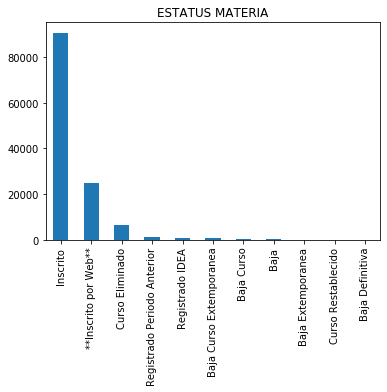

In [13]:
historico['ESTATUS MATERIA'].value_counts().plot(kind='bar', subplots=True)

In [14]:
historico['CODIGO ESTATUS MATERIA'].value_counts()

RE    90776
RW    24931
DD     6308
RA     1261
RI      892
BX      541
BC      129
BA       89
BE       57
RC       40
BD       20
Name: CODIGO ESTATUS MATERIA, dtype: int64

In [15]:
historico_sin_bajas=historico[(historico['CODIGO ESTATUS MATERIA']=='RE')|(historico['CODIGO ESTATUS MATERIA']=='RW')].reset_index(drop=True)

In [16]:
historico_sin_bajas

,PIDM,CURSO,CODIGO ESTATUS MATERIA,MODALIDAD-MATERIA,ESTATUS MATERIA,ESQUEMA-PAGO,PERIODO-COMPRA,PLAN,PROGRAMA,Materias Historicas,Terminacion Periodo
0,85,23110,RE,SP,Inscrito,CONTA,201649,2013,LEADMI,1,49
1,85,23111,RE,SP,Inscrito,CONTA,201648,2013,LEADMI,1,48
2,85,23112,RE,SP,Inscrito,CONTA,201649,2013,LEADMI,1,49
3,85,23113,RE,VR,Inscrito,CONTA,201650,2013,LEADMI,1,50
4,85,23114,RW,SP,**Inscrito por Web**,CONTA,201726,2013,LEADMI,1,26
...,...,...,...,...,...,...,...,...,...,...,...
115702,1006173,28101,RE,SP,Inscrito,CREDA,202126,2017,LECONI,1,26
115703,1006173,28102,RE,SP,Inscrito,CREDA,202126,2017,LECONI,1,26
115704,1006213,28102,RE,SP,Inscrito,CREDA,202126,2017,LECONT,1,26
115705,1006213,28202,RE,SP,Inscrito,CREDA,202126,2017,LECONT,1,26


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E8F29668>],
      dtype=object)

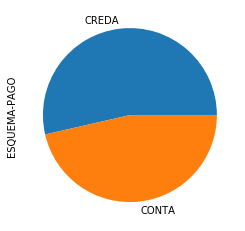

In [17]:
historico['ESQUEMA-PAGO'].value_counts().plot(kind='pie', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E8F68BA8>],
      dtype=object)

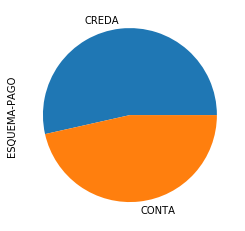

In [18]:
historico_sin_bajas['ESQUEMA-PAGO'].value_counts().plot(kind='pie', subplots=True)

El esquema de pago no afecta en la materia

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E8FB0898>],
      dtype=object)

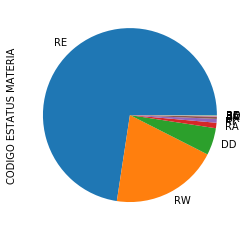

In [19]:
historico['CODIGO ESTATUS MATERIA'].value_counts().plot(kind='pie', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E900EF28>],
      dtype=object)

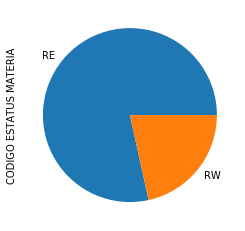

In [20]:
historico_sin_bajas['CODIGO ESTATUS MATERIA'].value_counts().plot(kind='pie', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E8E38860>],
      dtype=object)

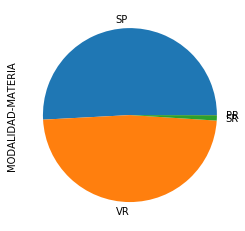

In [21]:
historico_sin_bajas['MODALIDAD-MATERIA'].value_counts().plot(kind='pie',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E90A3C18>],
      dtype=object)

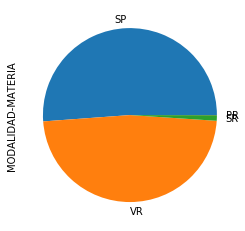

In [22]:
historico['MODALIDAD-MATERIA'].value_counts().plot(kind='pie',subplots=True)

La modalidad no afecta si se da de baja la materia  o no 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E90FC0B8>],
      dtype=object)

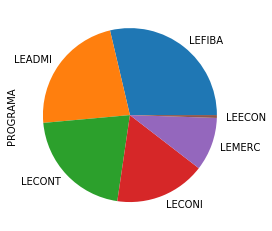

In [23]:
historico['PROGRAMA'].value_counts().plot(kind='pie',subplots=True)

El programa no afecta 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E9143EF0>],
      dtype=object)

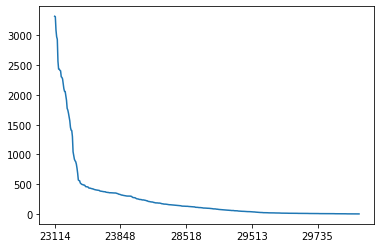

In [24]:
historico['CURSO'].value_counts().plot(kind='line',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E9C457F0>],
      dtype=object)

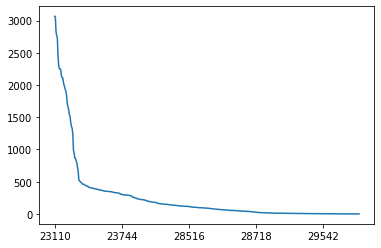

In [25]:
historico_sin_bajas['CURSO'].value_counts().plot(kind='line',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E9CA25F8>],
      dtype=object)

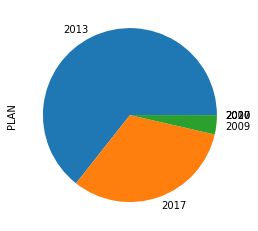

In [26]:
historico['PLAN'].value_counts().plot(kind='pie',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000260E9CFA518>],
      dtype=object)

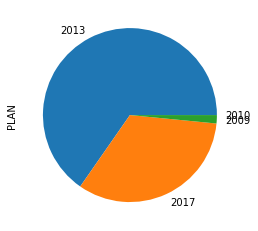

In [27]:
historico_sin_bajas['PLAN'].value_counts().plot(kind='pie',subplots=True)

El plan no afecta en la deserción 

In [28]:
historico.columns

Index(['PIDM', 'CURSO', 'CODIGO ESTATUS MATERIA', 'MODALIDAD-MATERIA',
       'ESTATUS MATERIA', 'ESQUEMA-PAGO', 'PERIODO-COMPRA', 'PLAN', 'PROGRAMA',
       'Materias Historicas', 'Terminacion Periodo'],
      dtype='object')

In [29]:
historico[['CODIGO ESTATUS MATERIA','ESTATUS MATERIA']]

,CODIGO ESTATUS MATERIA,ESTATUS MATERIA
0,RE,Inscrito
1,RE,Inscrito
2,RE,Inscrito
3,RE,Inscrito
4,RW,**Inscrito por Web**
...,...,...
125808,RE,Inscrito
125809,RE,Inscrito
125810,RE,Inscrito
125811,RE,Inscrito


In [30]:
historico_2=historico_sin_bajas[['PIDM','CURSO', 'CODIGO ESTATUS MATERIA', 'PERIODO-COMPRA','MODALIDAD-MATERIA']]

In [31]:
historico_2['id']=historico_2['PIDM']+'-'+historico_2['CURSO']

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
historico_2

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id
0,85,23110,RE,201649,SP,85-23110
1,85,23111,RE,201648,SP,85-23111
2,85,23112,RE,201649,SP,85-23112
3,85,23113,RE,201650,VR,85-23113
4,85,23114,RW,201726,SP,85-23114
...,...,...,...,...,...,...
115702,1006173,28101,RE,202126,SP,1006173-28101
115703,1006173,28102,RE,202126,SP,1006173-28102
115704,1006213,28102,RE,202126,SP,1006213-28102
115705,1006213,28202,RE,202126,SP,1006213-28202


In [33]:
historico_con_bajas=historico[['PIDM','CURSO', 'CODIGO ESTATUS MATERIA', 'PERIODO-COMPRA','MODALIDAD-MATERIA']]
historico_con_bajas['id']=historico_con_bajas['PIDM']+'-'+historico_con_bajas['CURSO']

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Población

In [34]:
población= pd.read_csv('CE-EBC\Poblacion.csv', skiprows=[1])

In [35]:
población.dropna(axis=0, inplace=True)

In [36]:
población['PIDM']=población['PIDM'].apply(lambda x: formato(x))
población['PERIODO-INICIO-CURRICULA']=población['PERIODO-INICIO-CURRICULA'].apply(lambda x: formato(x))
población['PERIODO-ULTIMO-CURSADO']=población['PERIODO-ULTIMO-CURSADO'].apply(lambda x: formato(x))
población['PERIODO-TIPOALUM-HISTORICO']=población['PERIODO-TIPOALUM-HISTORICO'].apply(lambda x: formato(x))

In [37]:
población

,PIDM,MATRICULA,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,CAMPUS,NOMBRE ALUMNO,ESTATUS-INSCRIPCION-ALUMNO,PLAN-CURRICULA,PROGRAMA,TIPO-ALUMNO-ACTUAL,TIPO-ALUMNO-HISTORICO,TOTAL MATERIAS BANNER,TOTAL MATERIAS CURSADAS BANNER,TERMINACION PERIODO
0,85,M00000137,201648,201925,201649,CMX,BLANCA ESTELA AYALA*DELGADO,EL,2013,LEADMI,C,C,42,42,49
1,85,M00000137,201648,201925,201650,CMX,BLANCA ESTELA AYALA*DELGADO,EL,2013,LEADMI,C,C,42,42,50
2,85,M00000137,201648,201925,201712,CMX,BLANCA ESTELA AYALA*DELGADO,EL,2013,LEADMI,C,C,42,42,12
3,85,M00000137,201648,201925,201725,CMX,BLANCA ESTELA AYALA*DELGADO,EL,2013,LEADMI,C,C,42,42,25
4,85,M00000137,201648,201925,201726,CMX,BLANCA ESTELA AYALA*DELGADO,EL,2013,LEADMI,C,C,42,42,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60481,1006159,M01006076,202126,202126,202126,TOL,ROBERTO VEGA*GONZALEZ,EL,2017,LECONT,N,N,42,0,26
60482,1006171,M01006088,202126,202126,202126,TLA,JOSUE MORENO*PADILLA,EL,2017,LEFIBA,N,N,42,0,26
60483,1006173,M01006090,202126,202126,202126,GDL,MARIHAN ALESSANDRA SEVILLA*ROMERO,EL,2017,LECONI,N,N,42,0,26
60484,1006213,M01006130,202126,202126,202126,CMX,LUIS ALBERTO GALINDO*GRANADOS,EL,2017,LECONT,N,N,42,0,26


In [38]:
población.columns

Index(['PIDM', 'MATRICULA', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO', 'CAMPUS',
       'NOMBRE ALUMNO', 'ESTATUS-INSCRIPCION-ALUMNO', 'PLAN-CURRICULA',
       'PROGRAMA', 'TIPO-ALUMNO-ACTUAL', 'TIPO-ALUMNO-HISTORICO',
       'TOTAL MATERIAS BANNER', 'TOTAL MATERIAS CURSADAS BANNER',
       'TERMINACION PERIODO'],
      dtype='object')

In [39]:
población[['MATRICULA', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO']].sort_values('PERIODO-TIPOALUM-HISTORICO')

,MATRICULA,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO
1537,M00125353,200948,201726,200948
954,M00023928,200948,200948,200948
1664,M00125744,200948,202126,200948
740,M00024862,201026,202126,200948
825,M00024117,200948,202025,200948
...,...,...,...,...
626,M00004101,200312,202126,202126
49855,M00989498,201912,202126,202126
693,M00024207,201448,202126,202126
49905,M00989522,201912,202126,202126


In [40]:
población['PIDM']=población['PIDM'].apply(lambda x: formato(x))

In [41]:
población.isnull().sum()

PIDM                              0
MATRICULA                         0
PERIODO-INICIO-CURRICULA          0
PERIODO-ULTIMO-CURSADO            0
PERIODO-TIPOALUM-HISTORICO        0
CAMPUS                            0
NOMBRE ALUMNO                     0
ESTATUS-INSCRIPCION-ALUMNO        0
PLAN-CURRICULA                    0
PROGRAMA                          0
TIPO-ALUMNO-ACTUAL                0
TIPO-ALUMNO-HISTORICO             0
TOTAL MATERIAS BANNER             0
TOTAL MATERIAS CURSADAS BANNER    0
TERMINACION PERIODO               0
dtype: int64

In [42]:
#estas columnas estan relacionadas
población[['PIDM','MATRICULA']].value_counts()

PIDM    MATRICULA
284012  M00283940    72
615281  M00615204    42
15050   M00026163    42
238487  M00238429    41
131423  M00131413    38
                     ..
693798  M00693719     1
211423  M00211374     1
989882  M00989801     1
694086  M00694007     1
754632  M00754553     1
Length: 7335, dtype: int64

In [43]:
población['ESTATUS-INSCRIPCION-ALUMNO'].value_counts()

EL    60148
BD       32
BE       26
BA       11
Name: ESTATUS-INSCRIPCION-ALUMNO, dtype: int64

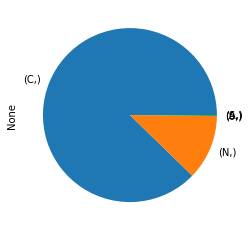

In [44]:
población[['TIPO-ALUMNO-HISTORICO']].value_counts().plot(kind='pie') #la mayoria son C

In [45]:
población['TOTAL MATERIAS BANNER'].value_counts()

42    60212
84        5
Name: TOTAL MATERIAS BANNER, dtype: int64

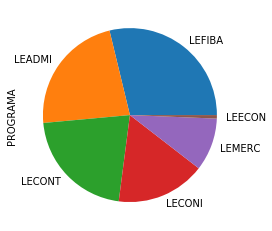

In [46]:
población['PROGRAMA'].value_counts().plot(kind='pie')

In [47]:
población['ESTATUS-INSCRIPCION-ALUMNO'].value_counts()

EL    60148
BD       32
BE       26
BA       11
Name: ESTATUS-INSCRIPCION-ALUMNO, dtype: int64

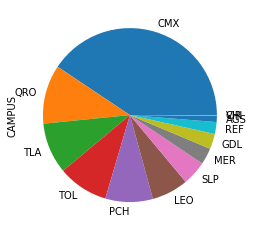

In [48]:
población['CAMPUS'].value_counts().plot(kind='pie')

In [49]:
población_sin_graduados= población[['PIDM','MATRICULA','ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO','NOMBRE ALUMNO', 'TOTAL MATERIAS CURSADAS BANNER',
                        'CAMPUS']][población['TOTAL MATERIAS CURSADAS BANNER']<42]

In [50]:
población_sin_graduados

,PIDM,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS
118,290,M00000036,EL,201025,201848,201025,MONICA MEDINA*GOMEZ,5,QRO
119,290,M00000036,EL,201025,201848,201026,MONICA MEDINA*GOMEZ,5,QRO
120,290,M00000036,EL,201025,201848,201027,MONICA MEDINA*GOMEZ,5,QRO
121,290,M00000036,EL,201025,201848,201827,MONICA MEDINA*GOMEZ,5,QRO
122,290,M00000036,EL,201025,201848,201848,MONICA MEDINA*GOMEZ,5,QRO
...,...,...,...,...,...,...,...,...,...
60481,1006159,M01006076,EL,202126,202126,202126,ROBERTO VEGA*GONZALEZ,0,TOL
60482,1006171,M01006088,EL,202126,202126,202126,JOSUE MORENO*PADILLA,0,TLA
60483,1006173,M01006090,EL,202126,202126,202126,MARIHAN ALESSANDRA SEVILLA*ROMERO,0,GDL
60484,1006213,M01006130,EL,202126,202126,202126,LUIS ALBERTO GALINDO*GRANADOS,0,CMX


In [51]:
población_con_graduados= población[['PIDM','MATRICULA','ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO','NOMBRE ALUMNO', 'TOTAL MATERIAS CURSADAS BANNER',
                        'CAMPUS', 'PROGRAMA']][población['TOTAL MATERIAS CURSADAS BANNER']<=42]

In [52]:
población_con_graduados

,PIDM,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA
0,85,M00000137,EL,201648,201925,201649,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
1,85,M00000137,EL,201648,201925,201650,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
2,85,M00000137,EL,201648,201925,201712,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
3,85,M00000137,EL,201648,201925,201725,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
4,85,M00000137,EL,201648,201925,201726,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
...,...,...,...,...,...,...,...,...,...,...
60481,1006159,M01006076,EL,202126,202126,202126,ROBERTO VEGA*GONZALEZ,0,TOL,LECONT
60482,1006171,M01006088,EL,202126,202126,202126,JOSUE MORENO*PADILLA,0,TLA,LEFIBA
60483,1006173,M01006090,EL,202126,202126,202126,MARIHAN ALESSANDRA SEVILLA*ROMERO,0,GDL,LECONI
60484,1006213,M01006130,EL,202126,202126,202126,LUIS ALBERTO GALINDO*GRANADOS,0,CMX,LECONT


# kardex

In [53]:
kardex=pd.read_csv('CE-EBC\kardex.csv',skiprows=[1])

In [54]:
kardex['PIDM']=kardex['PIDM'].apply(lambda x: formato(x))
kardex['CURSO']=kardex['CURSO'].apply(lambda x: formato(x))
kardex['PERIODO-MATERIA']=kardex['PERIODO-MATERIA'].apply(lambda x: formato(x))
kardex['PLAN']=kardex['PLAN'].apply(lambda x: formato(x))


In [55]:
kardex[['Materia-Cursadas','MATERIAS-EN-CURSO']]=kardex[['Materia-Cursadas','MATERIAS-EN-CURSO']].fillna(0)

In [56]:
kardex.isnull().sum()

PIDM                          0
semestre                      0
CURSO                         0
MATERIAS DEL CURSO            0
MODALIDA-MATERIA           2491
NRC-MATERIAS TERMINADAS    2268
PERIODO-MATERIA               0
CAMPUS-MATERIAS               0
PLAN                          0
programa                      0
CALIFICACION                  0
Materia-Cursadas              0
MATERIAS-EN-CURSO             0
total materias                0
Terminacion Periodo           0
dtype: int64

In [57]:
kardex['CALIFICACION']=np.where(kardex['MATERIAS-EN-CURSO']==1,0,kardex['CALIFICACION'])

In [58]:
len(kardex)

104245

In [59]:
kardex['id']=kardex['PIDM']+'-'+kardex['CURSO']

In [60]:
kardex_2=kardex[(kardex['Materia-Cursadas']!=0)|(kardex['MATERIAS-EN-CURSO']!=0)]

In [61]:
kardex_2

,PIDM,semestre,CURSO,MATERIAS DEL CURSO,MODALIDA-MATERIA,NRC-MATERIAS TERMINADAS,PERIODO-MATERIA,CAMPUS-MATERIAS,PLAN,programa,CALIFICACION,Materia-Cursadas,MATERIAS-EN-CURSO,total materias,Terminacion Periodo,id
0,85,1,23111,Taller de Informacion Financie,SP,3294,201648,Reforma 01,2013,LEADMI,10,1.0,0.0,1,48,85-23111
1,85,1,23112,Matematicas para Negocios,SP,3325,201649,Reforma 01,2013,LEADMI,8,1.0,0.0,1,49,85-23112
2,85,1,23113,Principios de Derecho,VR,3183,201650,EBC en Linea 08,2013,LEADMI,8,1.0,0.0,1,50,85-23113
3,85,1,23114,Mercadotecnia,SP,3073,201726,Ciudad de Mexico 19,2013,LEADMI,10,1.0,0.0,1,26,85-23114
4,85,2,23210,Dinamica Empresarial,SP,3199,201712,Ciudad de Mexico 19,2013,LEADMI,8,1.0,0.0,1,12,85-23210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104240,1005520,3,28305,Estadistica para Negocios,NaN,NaN,202126,Toluca 07,2017,LEFIBA,0,0.0,1.0,1,26,1005520-28305
104241,1005537,1,28101,Informacion Financiera,NaN,NaN,202126,VIR,2017,LEMERC,0,0.0,1.0,1,26,1005537-28101
104242,1005537,1,28102,Fundamentos de administracion,NaN,NaN,202126,VIR,2017,LEMERC,0,0.0,1.0,1,26,1005537-28102
104243,1005537,1,28103,Economia Empresarial,SP,3024,202125,Ciudad de Mexico 19,2017,LEMERC,8,1.0,0.0,1,25,1005537-28103


In [62]:
kardex_2.isnull().sum()

PIDM                          0
semestre                      0
CURSO                         0
MATERIAS DEL CURSO            0
MODALIDA-MATERIA           2491
NRC-MATERIAS TERMINADAS    2268
PERIODO-MATERIA               0
CAMPUS-MATERIAS               0
PLAN                          0
programa                      0
CALIFICACION                  0
Materia-Cursadas              0
MATERIAS-EN-CURSO             0
total materias                0
Terminacion Periodo           0
id                            0
dtype: int64

In [63]:
kardex_materias_terminadas=kardex_2[['id','semestre','MODALIDA-MATERIA','Materia-Cursadas','MATERIAS-EN-CURSO','MATERIAS DEL CURSO', 'CALIFICACION', 'CAMPUS-MATERIAS','PLAN']]

In [64]:
#incluye materias que no se terminaron
kardex_todas_materias=kardex[['id','semestre','MODALIDA-MATERIA','Materia-Cursadas','MATERIAS-EN-CURSO','MATERIAS DEL CURSO', 'CALIFICACION', 'CAMPUS-MATERIAS','PLAN']]

# junto tres tablas

In [65]:
df1=pd.merge(historico_2,kardex_materias_terminadas, on='id', how="inner")
df1

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id,semestre,MODALIDA-MATERIA,Materia-Cursadas,MATERIAS-EN-CURSO,MATERIAS DEL CURSO,CALIFICACION,CAMPUS-MATERIAS,PLAN
0,85,23111,RE,201648,SP,85-23111,1,SP,1.0,0.0,Taller de Informacion Financie,10,Reforma 01,2013
1,85,23112,RE,201649,SP,85-23112,1,SP,1.0,0.0,Matematicas para Negocios,8,Reforma 01,2013
2,85,23113,RE,201650,VR,85-23113,1,VR,1.0,0.0,Principios de Derecho,8,EBC en Linea 08,2013
3,85,23114,RW,201726,SP,85-23114,1,SP,1.0,0.0,Mercadotecnia,10,Ciudad de Mexico 19,2013
4,85,23210,RE,201712,SP,85-23210,2,SP,1.0,0.0,Dinamica Empresarial,8,Ciudad de Mexico 19,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110867,1005520,28305,RE,202126,SP,1005520-28305,3,NaN,0.0,1.0,Estadistica para Negocios,0,Toluca 07,2017
110868,1005537,28101,RE,202126,VR,1005537-28101,1,NaN,0.0,1.0,Informacion Financiera,0,VIR,2017
110869,1005537,28102,RE,202126,VR,1005537-28102,1,NaN,0.0,1.0,Fundamentos de administracion,0,VIR,2017
110870,1005537,28103,RE,202125,SP,1005537-28103,1,SP,1.0,0.0,Economia Empresarial,8,Ciudad de Mexico 19,2017


In [66]:
estatus=pd.read_csv(r"CE-EBC\Estatus_alumno.txt", delimiter="\t" )
estatus

,MATRICULA,Estatus Alumno
0,AL911691,PASIVO
1,M00000036,PASIVO
2,M00000040,PASIVO
3,M00000137,PASIVO
4,M00000139,PASIVO
...,...,...
7373,M01006076,ACTIVO
7374,M01006088,ACTIVO
7375,M01006090,ACTIVO
7376,M01006130,ACTIVO


In [67]:
alumnos=población_con_graduados.drop_duplicates(subset=['PIDM'], keep='last').reset_index(drop=True)
alumnos

,PIDM,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA
0,85,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI
1,87,M00000139,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,42,CMX,LEADMI
2,173,M00000188,EL,201426,201850,201850,ELISA SARAI CASASOLA*EVARISTO,42,TOL,LEADMI
3,184,M00021101,EL,201526,201849,201849,SILVIA VICTORIA*MEDINA,42,CMX,LECONT
4,225,M00021202,EL,201526,202026,202026,LAURA IVONNE SILVA*DE LA ROSA,42,CMX,LECONT
...,...,...,...,...,...,...,...,...,...,...
7330,1006159,M01006076,EL,202126,202126,202126,ROBERTO VEGA*GONZALEZ,0,TOL,LECONT
7331,1006171,M01006088,EL,202126,202126,202126,JOSUE MORENO*PADILLA,0,TLA,LEFIBA
7332,1006173,M01006090,EL,202126,202126,202126,MARIHAN ALESSANDRA SEVILLA*ROMERO,0,GDL,LECONI
7333,1006213,M01006130,EL,202126,202126,202126,LUIS ALBERTO GALINDO*GRANADOS,0,CMX,LECONT


In [68]:
alumnos_2=pd.merge(alumnos,estatus, on='MATRICULA', how="inner")
alumnos_2

,PIDM,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,Estatus Alumno
0,85,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
1,87,M00000139,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,42,CMX,LEADMI,PASIVO
2,173,M00000188,EL,201426,201850,201850,ELISA SARAI CASASOLA*EVARISTO,42,TOL,LEADMI,PASIVO
3,184,M00021101,EL,201526,201849,201849,SILVIA VICTORIA*MEDINA,42,CMX,LECONT,PASIVO
4,225,M00021202,EL,201526,202026,202026,LAURA IVONNE SILVA*DE LA ROSA,42,CMX,LECONT,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...
7330,1006159,M01006076,EL,202126,202126,202126,ROBERTO VEGA*GONZALEZ,0,TOL,LECONT,ACTIVO
7331,1006171,M01006088,EL,202126,202126,202126,JOSUE MORENO*PADILLA,0,TLA,LEFIBA,ACTIVO
7332,1006173,M01006090,EL,202126,202126,202126,MARIHAN ALESSANDRA SEVILLA*ROMERO,0,GDL,LECONI,ACTIVO
7333,1006213,M01006130,EL,202126,202126,202126,LUIS ALBERTO GALINDO*GRANADOS,0,CMX,LECONT,ACTIVO


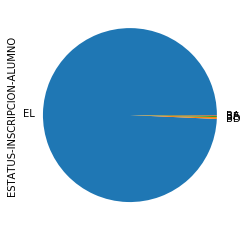

In [69]:
alumnos_2['ESTATUS-INSCRIPCION-ALUMNO'].value_counts().plot(kind='pie') #todos son EL

In [70]:
alumnos_2['ESTATUS-INSCRIPCION-ALUMNO'].value_counts()

EL    7283
BD      25
BE      20
BA       7
Name: ESTATUS-INSCRIPCION-ALUMNO, dtype: int64

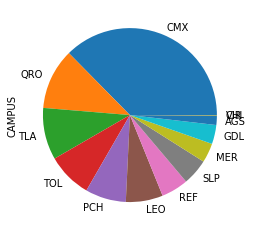

In [71]:
alumnos_2['CAMPUS'].value_counts().plot(kind='pie')

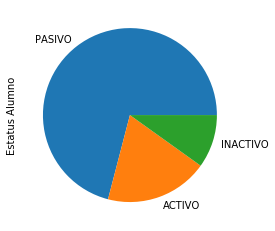

In [72]:
alumnos_2['Estatus Alumno'].value_counts().plot(kind='pie')
#3/4 de los alumnos son pasivos

In [73]:
materias=pd.merge(df1,alumnos_2, on='PIDM', how="inner")
materias

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id,semestre,MODALIDA-MATERIA,Materia-Cursadas,MATERIAS-EN-CURSO,...,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,Estatus Alumno
0,85,23111,RE,201648,SP,85-23111,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
1,85,23112,RE,201649,SP,85-23112,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
2,85,23113,RE,201650,VR,85-23113,1,VR,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
3,85,23114,RW,201726,SP,85-23114,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
4,85,23210,RE,201712,SP,85-23210,2,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110865,1005520,28305,RE,202126,SP,1005520-28305,3,NaN,0.0,1.0,...,M01005437,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,2,CMX,LEFIBA,ACTIVO
110866,1005537,28101,RE,202126,VR,1005537-28101,1,NaN,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
110867,1005537,28102,RE,202126,VR,1005537-28102,1,NaN,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
110868,1005537,28103,RE,202125,SP,1005537-28103,1,SP,1.0,0.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO


In [74]:
materias.isnull().sum()

PIDM                                 0
CURSO                                0
CODIGO ESTATUS MATERIA               0
PERIODO-COMPRA                       0
MODALIDAD-MATERIA                    0
id                                   0
semestre                             0
MODALIDA-MATERIA                  2262
Materia-Cursadas                     0
MATERIAS-EN-CURSO                    0
MATERIAS DEL CURSO                   0
CALIFICACION                         0
CAMPUS-MATERIAS                      0
PLAN                                 0
MATRICULA                            0
ESTATUS-INSCRIPCION-ALUMNO           0
PERIODO-INICIO-CURRICULA             0
PERIODO-ULTIMO-CURSADO               0
PERIODO-TIPOALUM-HISTORICO           0
NOMBRE ALUMNO                        0
TOTAL MATERIAS CURSADAS BANNER       0
CAMPUS                               0
PROGRAMA                             0
Estatus Alumno                       0
dtype: int64

In [75]:
materias[['MODALIDA-MATERIA','CAMPUS-MATERIAS']]=materias[['MODALIDA-MATERIA','CAMPUS-MATERIAS']].fillna('no disponible')

In [76]:
materias

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id,semestre,MODALIDA-MATERIA,Materia-Cursadas,MATERIAS-EN-CURSO,...,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,Estatus Alumno
0,85,23111,RE,201648,SP,85-23111,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
1,85,23112,RE,201649,SP,85-23112,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
2,85,23113,RE,201650,VR,85-23113,1,VR,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
3,85,23114,RW,201726,SP,85-23114,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
4,85,23210,RE,201712,SP,85-23210,2,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110865,1005520,28305,RE,202126,SP,1005520-28305,3,no disponible,0.0,1.0,...,M01005437,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,2,CMX,LEFIBA,ACTIVO
110866,1005537,28101,RE,202126,VR,1005537-28101,1,no disponible,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
110867,1005537,28102,RE,202126,VR,1005537-28102,1,no disponible,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
110868,1005537,28103,RE,202125,SP,1005537-28103,1,SP,1.0,0.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO


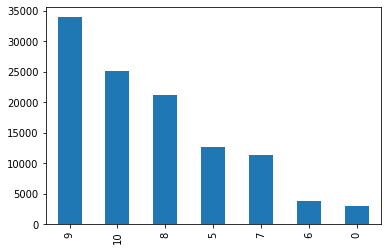

In [77]:
materias['CALIFICACION'].value_counts().plot(kind='bar')

In [78]:
materias['semestre'].value_counts()

1    24229
2    18377
3    15651
5    12024
4    11986
6    10158
8     9349
7     9096
Name: semestre, dtype: int64

In [79]:
materias['CURSO'].value_counts()

23114    2897
23110    2837
23112    2649
23111    2642
23113    2562
         ... 
23864      10
23761      10
23863      10
23571      10
23460       8
Name: CURSO, Length: 316, dtype: int64

In [80]:
tabla=materias.groupby(['MATRICULA',]).agg({'CALIFICACION':'mean', 'semestre':'max', 'PIDM':'count'})
tabla

,CALIFICACION,semestre,PIDM
MATRICULA,,,
AL911691,6.750000,3,8
M00000036,10.000000,2,2
M00000040,8.066667,4,15
M00000137,9.121951,8,41
M00000139,9.523810,8,42
...,...,...,...
M01005421,3.333333,2,3
M01005422,5.000000,2,2
M01005428,3.250000,2,4


In [81]:
tabla['MATRICULA']=tabla.index

In [82]:
tabla_2=tabla.rename(columns={'CALIFICACION':'promedio','semestre':'ultimo semestre','PIDM':'materias pagadas'})

In [83]:
tabla_3=tabla_2.reset_index(drop=True)
tabla_3

,promedio,ultimo semestre,materias pagadas,MATRICULA
0,6.750000,3,8,AL911691
1,10.000000,2,2,M00000036
2,8.066667,4,15,M00000040
3,9.121951,8,41,M00000137
4,9.523810,8,42,M00000139
...,...,...,...,...
7127,3.333333,2,3,M01005421
7128,5.000000,2,2,M01005422
7129,3.250000,2,4,M01005428
7130,4.750000,3,4,M01005437


In [84]:
tabla_4=pd.merge(tabla_3,alumnos_2, on='MATRICULA', how="inner")
tabla_4

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,Estatus Alumno
0,6.750000,3,8,AL911691,131379,EL,201025,201925,201925,JOSE ROBERTO LIMON*GARCIA,5,CMX,LEFIBA,PASIVO
1,10.000000,2,2,M00000036,290,EL,201025,201848,201912,MONICA MEDINA*GOMEZ,5,QRO,LEADMI,PASIVO
2,8.066667,4,15,M00000040,299,EL,201348,202025,202025,BELEN MOYSEN*HUERTA,11,CMX,LEADMI,PASIVO
3,9.121951,8,41,M00000137,85,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
4,9.523810,8,42,M00000139,87,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,42,CMX,LEADMI,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,3.333333,2,3,M01005421,1005504,EL,202125,202126,202126,ADILENE MARISOL VALDEZ*BACA,0,CMX,LECONI,ACTIVO
7128,5.000000,2,2,M01005422,1005505,EL,202125,202125,202125,SEUNGHYUN KIM*LEE,0,CMX,LECONT,INACTIVO
7129,3.250000,2,4,M01005428,1005511,EL,202125,202126,202126,JESUS ISRAEL LOZANO*ARELLANO,1,GDL,LEFIBA,ACTIVO
7130,4.750000,3,4,M01005437,1005520,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,2,CMX,LEFIBA,ACTIVO


In [85]:
codigo_estatus=[]
for i in tabla_4['Estatus Alumno']:
    if i =='ACTIVO':
        codigo_estatus.append(1)
    elif i=='INACTIVO':
        codigo_estatus.append(2)
    else:
        codigo_estatus.append(0)

In [86]:
tabla_4['codigo_estatus']=codigo_estatus

In [87]:
tabla_4['codigo_estatus'].value_counts()

0    5089
1    1319
2     724
Name: codigo_estatus, dtype: int64

In [88]:
tabla_4['estatus_alumno']=tabla_4['Estatus Alumno']

In [89]:
tabla_5=pd.get_dummies(tabla_4, columns=['Estatus Alumno'])
tabla_5

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,codigo_estatus,estatus_alumno,Estatus Alumno_ACTIVO,Estatus Alumno_INACTIVO,Estatus Alumno_PASIVO
0,6.750000,3,8,AL911691,131379,EL,201025,201925,201925,JOSE ROBERTO LIMON*GARCIA,5,CMX,LEFIBA,0,PASIVO,0,0,1
1,10.000000,2,2,M00000036,290,EL,201025,201848,201912,MONICA MEDINA*GOMEZ,5,QRO,LEADMI,0,PASIVO,0,0,1
2,8.066667,4,15,M00000040,299,EL,201348,202025,202025,BELEN MOYSEN*HUERTA,11,CMX,LEADMI,0,PASIVO,0,0,1
3,9.121951,8,41,M00000137,85,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,0,PASIVO,0,0,1
4,9.523810,8,42,M00000139,87,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,42,CMX,LEADMI,0,PASIVO,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,3.333333,2,3,M01005421,1005504,EL,202125,202126,202126,ADILENE MARISOL VALDEZ*BACA,0,CMX,LECONI,1,ACTIVO,1,0,0
7128,5.000000,2,2,M01005422,1005505,EL,202125,202125,202125,SEUNGHYUN KIM*LEE,0,CMX,LECONT,2,INACTIVO,0,1,0
7129,3.250000,2,4,M01005428,1005511,EL,202125,202126,202126,JESUS ISRAEL LOZANO*ARELLANO,1,GDL,LEFIBA,1,ACTIVO,1,0,0
7130,4.750000,3,4,M01005437,1005520,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,2,CMX,LEFIBA,1,ACTIVO,1,0,0


In [90]:
tabla_5.dtypes

promedio                          float64
ultimo semestre                     int64
materias pagadas                    int64
MATRICULA                          object
PIDM                               object
ESTATUS-INSCRIPCION-ALUMNO         object
PERIODO-INICIO-CURRICULA           object
PERIODO-ULTIMO-CURSADO             object
PERIODO-TIPOALUM-HISTORICO         object
NOMBRE ALUMNO                      object
TOTAL MATERIAS CURSADAS BANNER      int64
CAMPUS                             object
PROGRAMA                           object
codigo_estatus                      int64
estatus_alumno                     object
Estatus Alumno_ACTIVO               uint8
Estatus Alumno_INACTIVO             uint8
Estatus Alumno_PASIVO               uint8
dtype: object

In [91]:
tabla_5['terminó último periodo']=np.where(tabla_5['PERIODO-ULTIMO-CURSADO']==tabla_5['PERIODO-TIPOALUM-HISTORICO'],1,0)

In [92]:
def año_inicial(x):
    z=re.findall(r'^\d{4}', x)
    return int(z[0])

In [93]:
def periodo_inicial(x):
    z=re.findall(r'\d{2}$', x)
    return int(z[0])

In [94]:
tabla_5['año inicial']= tabla_5['PERIODO-INICIO-CURRICULA'].apply(año_inicial)
tabla_5['periodo inicial']=tabla_5['PERIODO-INICIO-CURRICULA'].apply(periodo_inicial)
tabla_5['año final']= tabla_5['PERIODO-ULTIMO-CURSADO'].apply(año_inicial)
tabla_5['periodo final']=tabla_5['PERIODO-ULTIMO-CURSADO'].apply(periodo_inicial)

In [95]:
tabla_5

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,...,codigo_estatus,estatus_alumno,Estatus Alumno_ACTIVO,Estatus Alumno_INACTIVO,Estatus Alumno_PASIVO,terminó último periodo,año inicial,periodo inicial,año final,periodo final
0,6.750000,3,8,AL911691,131379,EL,201025,201925,201925,JOSE ROBERTO LIMON*GARCIA,...,0,PASIVO,0,0,1,1,2010,25,2019,25
1,10.000000,2,2,M00000036,290,EL,201025,201848,201912,MONICA MEDINA*GOMEZ,...,0,PASIVO,0,0,1,0,2010,25,2018,48
2,8.066667,4,15,M00000040,299,EL,201348,202025,202025,BELEN MOYSEN*HUERTA,...,0,PASIVO,0,0,1,1,2013,48,2020,25
3,9.121951,8,41,M00000137,85,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,...,0,PASIVO,0,0,1,1,2016,48,2019,25
4,9.523810,8,42,M00000139,87,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,...,0,PASIVO,0,0,1,0,2015,27,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,3.333333,2,3,M01005421,1005504,EL,202125,202126,202126,ADILENE MARISOL VALDEZ*BACA,...,1,ACTIVO,1,0,0,1,2021,25,2021,26
7128,5.000000,2,2,M01005422,1005505,EL,202125,202125,202125,SEUNGHYUN KIM*LEE,...,2,INACTIVO,0,1,0,1,2021,25,2021,25
7129,3.250000,2,4,M01005428,1005511,EL,202125,202126,202126,JESUS ISRAEL LOZANO*ARELLANO,...,1,ACTIVO,1,0,0,1,2021,25,2021,26
7130,4.750000,3,4,M01005437,1005520,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,...,1,ACTIVO,1,0,0,1,2021,25,2021,26


In [96]:
tabla_6=tabla_5[['Estatus Alumno_ACTIVO','promedio', 'ultimo semestre', 'TOTAL MATERIAS CURSADAS BANNER', 'materias pagadas',
                 'terminó último periodo', 'año inicial','periodo inicial','año final', 'periodo final','codigo_estatus']]

In [97]:
tabla_6

,Estatus Alumno_ACTIVO,promedio,ultimo semestre,TOTAL MATERIAS CURSADAS BANNER,materias pagadas,terminó último periodo,año inicial,periodo inicial,año final,periodo final,codigo_estatus
0,0,6.750000,3,5,8,1,2010,25,2019,25,0
1,0,10.000000,2,5,2,0,2010,25,2018,48,0
2,0,8.066667,4,11,15,1,2013,48,2020,25,0
3,0,9.121951,8,42,41,1,2016,48,2019,25,0
4,0,9.523810,8,42,42,0,2015,27,2018,12,0
...,...,...,...,...,...,...,...,...,...,...,...
7127,1,3.333333,2,0,3,1,2021,25,2021,26,1
7128,0,5.000000,2,0,2,1,2021,25,2021,25,2
7129,1,3.250000,2,1,4,1,2021,25,2021,26,1
7130,1,4.750000,3,2,4,1,2021,25,2021,26,1


In [98]:
tabla_6.columns

Index(['Estatus Alumno_ACTIVO', 'promedio', 'ultimo semestre',
       'TOTAL MATERIAS CURSADAS BANNER', 'materias pagadas',
       'terminó último periodo', 'año inicial', 'periodo inicial', 'año final',
       'periodo final', 'codigo_estatus'],
      dtype='object')

# Modelo nuevos alumnos

In [99]:
tabla_5.groupby('año inicial').agg({'MATRICULA':'count'})

,MATRICULA
año inicial,
2002,1
2003,1
2005,1
2006,3
2008,3
2009,12
2010,29
2011,38
2012,46


In [100]:
nuevos_alumnos=tabla_5.groupby('año inicial').agg({'MATRICULA':'count'})

In [101]:
nuevos_alumnos['año_inicial']=nuevos_alumnos.index

In [102]:
nuevos_alumnos

,MATRICULA,año_inicial
año inicial,,
2002,1,2002
2003,1,2003
2005,1,2005
2006,3,2006
2008,3,2008
2009,12,2009
2010,29,2010
2011,38,2011
2012,46,2012


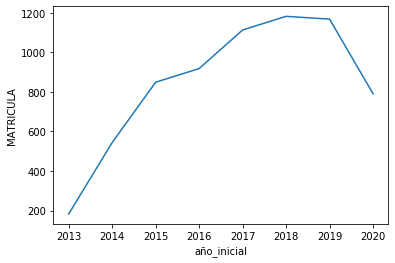

In [103]:
sns.lineplot(nuevos_alumnos['año_inicial'][9:-1],nuevos_alumnos['MATRICULA'][9:-1])

In [104]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [105]:
y_nuevos_alumnos=nuevos_alumnos[['MATRICULA']][9:-1]
x_nuevos_alumnos=nuevos_alumnos[['año_inicial']][9:-1]

In [106]:
poly_nuevos=make_pipeline(PolynomialFeatures(2),LinReg())

In [107]:
poly_nuevos.fit(x_nuevos_alumnos,y_nuevos_alumnos)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [108]:
nuevos_alumnos_2021=int(poly_nuevos.predict([[2021]]))
nuevos_alumnos_2021

613

In [109]:
lista_campus_matricula=list(tabla_5['CAMPUS'].value_counts().index)
lista_campus_matricula

['CMX',
 'QRO',
 'TLA',
 'TOL',
 'PCH',
 'LEO',
 'SLP',
 'REF',
 'MER',
 'GDL',
 'AGS',
 'VIR',
 'CHI']

In [110]:
predicciones_nuevos_alumnos=[]
nuevos_alumnos_campus=[]
for i in lista_campus_matricula:
    df=tabla_5[tabla_5['CAMPUS']==i]
    grupo_alumnos=df.groupby('año inicial').agg({'MATRICULA':'count'})
    grupo_alumnos['año_inicial']=grupo_alumnos.index
    
    #filtro año
    grupo_alumnos_2=grupo_alumnos[grupo_alumnos['año_inicial']>2012]
    nuevos_alumnos_campus.append(grupo_alumnos_2)
  
    y_grupo_alumnos=grupo_alumnos_2[['MATRICULA']][:-1]
    x_grupo_alumnos=grupo_alumnos_2[['año_inicial']][:-1]
    poly_nuevos=make_pipeline(PolynomialFeatures(2),LinReg())
    poly_nuevos.fit(x_grupo_alumnos,y_grupo_alumnos)
    
    nuevos_alumnos_2021=int(poly_nuevos.predict([[2021]]))
    
    if nuevos_alumnos_2021>0:
        predicciones_nuevos_alumnos.append([i,nuevos_alumnos_2021])
    else:
        predicciones_nuevos_alumnos.append([i,0])

In [111]:
nuevos_historico=pd.pivot_table(tabla_5, columns= 'año inicial', index='CAMPUS', values='MATRICULA', aggfunc='count').fillna(0)

In [112]:
nuevos_historico['campus']=nuevos_historico.index
nuevos_historico

año inicial,2002,2003,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,campus
CAMPUS,,,,,,,,,,,,,,,,,,,
AGS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,62.0,44.0,9.0,AGS
CHI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,CHI
CMX,1.0,1.0,1.0,2.0,0.0,7.0,14.0,20.0,17.0,43.0,164.0,289.0,378.0,445.0,474.0,440.0,292.0,91.0,CMX
GDL,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,85.0,86.0,58.0,18.0,GDL
LEO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,13.0,43.0,54.0,50.0,93.0,87.0,95.0,40.0,14.0,LEO
MER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,79.0,44.0,54.0,50.0,19.0,MER
PCH,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,49.0,102.0,103.0,108.0,89.0,67.0,21.0,PCH
QRO,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,36.0,82.0,121.0,116.0,123.0,129.0,101.0,77.0,17.0,QRO
REF,0.0,0.0,0.0,1.0,1.0,0.0,3.0,6.0,7.0,36.0,116.0,129.0,46.0,0.0,0.0,0.0,0.0,0.0,REF


In [113]:
nuevos_alumnos_campus=pd.DataFrame(predicciones_nuevos_alumnos, columns=['campus','pronostico_alumnos_2021'])
nuevos_alumnos_campus

,campus,pronostico_alumnos_2021
0,CMX,207
1,QRO,33
2,TLA,34
3,TOL,41
4,PCH,15
5,LEO,34
6,SLP,8
7,REF,0
8,MER,60
9,GDL,19


In [114]:
tabla_nuevos_alumnos=pd.merge(nuevos_alumnos_campus,nuevos_historico, on='campus', how="inner")
tabla_nuevos_alumnos

,campus,pronostico_alumnos_2021,2002,2003,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CMX,207,1.0,1.0,1.0,2.0,0.0,7.0,14.0,20.0,17.0,43.0,164.0,289.0,378.0,445.0,474.0,440.0,292.0,91.0
1,QRO,33,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,36.0,82.0,121.0,116.0,123.0,129.0,101.0,77.0,17.0
2,TLA,34,0.0,0.0,0.0,0.0,0.0,1.0,7.0,5.0,8.0,26.0,61.0,96.0,90.0,104.0,96.0,94.0,64.0,28.0
3,TOL,41,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,27.0,69.0,76.0,73.0,88.0,89.0,94.0,55.0,16.0
4,PCH,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,49.0,102.0,103.0,108.0,89.0,67.0,21.0
5,LEO,34,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,13.0,43.0,54.0,50.0,93.0,87.0,95.0,40.0,14.0
6,SLP,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,31.0,58.0,77.0,67.0,53.0,44.0,17.0
7,REF,0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,6.0,7.0,36.0,116.0,129.0,46.0,0.0,0.0,0.0,0.0,0.0
8,MER,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,79.0,44.0,54.0,50.0,19.0
9,GDL,19,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,85.0,86.0,58.0,18.0


In [115]:
#exporto
tabla_nuevos_alumnos.to_csv('out\\nuevos_alumnos.csv', sep=',')

# Alumnos nuevos POR CARRERA O PROGRAMA

In [116]:
historico_carrera=pd.pivot_table(tabla_5, columns= ['año inicial','PERIODO-INICIO-CURRICULA'], index=['CAMPUS','PROGRAMA'], values='MATRICULA', aggfunc='count').fillna(0)

In [117]:
historico_carrera

año inicial                2002   2003   2005   2006   2008   2009         \
PERIODO-INICIO-CURRICULA 200212 200312 200512 200612 200812 200948 200949   
CAMPUS PROGRAMA                                                             
AGS    LEADMI               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONI               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...                         ...    ...    ...    ...    ...    ...    ...   
TOL    LEECON               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
VIR    LECONI               0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT               0.0    0.0    0.0    0.0    0.0    0.0    0.0   

año inicial                2010                ...   2020                \
PERIODO-INICIO-CURRICULA 201012 201025 201026  ... 202012 202025 202026   
CAMPUS PROGRAMA                                ...                        
AGS    LEADMI               0.0    0.0    0.0  ...    2.0    0.0    2.0   
       LECONI               0.0    0.0    0.0  ...    3.0    2.0    3.0   
       LECONT               0.0    0.0    0.0  ...    0.0    1.0    0.0   
       LEFIBA               0.0    0.0    0.0  ...    2.0    1.0    2.0   
       LEMERC               0.0    0.0    0.0  ...    0.0    0.0    0.0   
...                         ...    ...    ...  ...    ...    ...    ...   
TOL    LEECON               0.0    0.0    0.0  ...    0.0    0.0    0.0   
       LEFIBA               0.0    0.0    0.0  ...    6.0    0.0    3.0   
       LEMERC               0.0    0.0    0.0  ...    3.0    2.0    0.0   
VIR    LECONI               0.0    0.0    0.0  ...    0.0    0.0    0.0   
       LECONT               0.0    0.0    0.0  ...    0.0    0.0    0.0   

año inicial                                            2021                
PERIODO-INICIO-CURRICULA 202027 202048 202049 202050 202112 202125 202126  
CAMPUS PROGRAMA                                                            
AGS    LEADMI               2.0    4.0    0.0    1.0    1.0    1.0    0.0  
       LECONI               1.0    1.0    0.0    0.0    1.0    1.0    0.0  
       LECONT               0.0    3.0    3.0    2.0    0.0    1.0    0.0  
       LEFIBA               0.0    2.0    2.0    3.0    1.0    2.0    0.0  
       LEMERC               1.0    0.0    1.0    0.0    0.0    1.0    0.0  
...                         ...    ...    ...    ...    ...    ...    ...  
TOL    LEECON               0.0    0.0    0.0    0.0    0.0    0.0    0.0  
       LEFIBA               0.0    4.0    6.0    1.0    2.0    2.0    0.0  
       LEMERC               1.0    1.0    2.0    0.0    1.0    2.0    0.0  
VIR    LECONI               0.0    0.0    0.0    0.0    0.0    0.0    0.0  
       LECONT               0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[65 rows x 87 columns]

In [118]:
#probabilidad
historico_prob=pd.DataFrame(index=historico_carrera[2020].index, columns=historico_carrera[2020].columns)

In [119]:
historico_carrera[2020].sum()

PERIODO-INICIO-CURRICULA
202012    166.0
202025    145.0
202026     74.0
202027     91.0
202048    110.0
202049    122.0
202050     83.0
dtype: float64

In [120]:
#valor total
suma_lista=[]
for i in historico_carrera[2020].columns:
    x=historico_carrera[2020][i].sum()
    suma_lista.append(x)

In [121]:
suma_2020=sum(suma_lista)
suma_2020

791.0

In [122]:
for i in historico_carrera[2020].columns:
    indice=i
    lista_auxiliar=[]
    for j in range(len(historico_carrera)):
        x=float(historico_carrera[2020][indice][j]/suma_2020)
        lista_auxiliar.append(x)
    historico_prob[indice]=lista_auxiliar

In [123]:
historico_prob

PERIODO-INICIO-CURRICULA    202012    202025    202026    202027    202048  \
CAMPUS PROGRAMA                                                              
AGS    LEADMI             0.002528  0.000000  0.002528  0.002528  0.005057   
       LECONI             0.003793  0.002528  0.003793  0.001264  0.001264   
       LECONT             0.000000  0.001264  0.000000  0.000000  0.003793   
       LEFIBA             0.002528  0.001264  0.002528  0.000000  0.002528   
       LEMERC             0.000000  0.000000  0.000000  0.001264  0.000000   
...                            ...       ...       ...       ...       ...   
TOL    LEECON             0.000000  0.000000  0.000000  0.000000  0.000000   
       LEFIBA             0.007585  0.000000  0.003793  0.000000  0.005057   
       LEMERC             0.003793  0.002528  0.000000  0.001264  0.001264   
VIR    LECONI             0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONT             0.000000  0.000000  0.000000  0.000000  0.000000   

PERIODO-INICIO-CURRICULA    202049    202050  
CAMPUS PROGRAMA                               
AGS    LEADMI             0.000000  0.001264  
       LECONI             0.000000  0.000000  
       LECONT             0.003793  0.002528  
       LEFIBA             0.002528  0.003793  
       LEMERC             0.001264  0.000000  
...                            ...       ...  
TOL    LEECON             0.000000  0.000000  
       LEFIBA             0.007585  0.001264  
       LEMERC             0.002528  0.000000  
VIR    LECONI             0.000000  0.000000  
       LECONT             0.000000  0.000000  

[65 rows x 7 columns]

In [124]:
#funcion corrige periodo
def periodo(x):
    return x.replace('2020','2021')

In [125]:
pronostico_alumnos_campus_carrera=pd.DataFrame(index=historico_carrera[2020].index, columns=historico_carrera[2020].columns)

In [126]:
pronostico_alumnos_campus_carrera

PERIODO-INICIO-CURRICULA 202012 202025 202026 202027 202048 202049 202050
CAMPUS PROGRAMA                                                          
AGS    LEADMI               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LECONI               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LECONT               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LEFIBA               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LEMERC               NaN    NaN    NaN    NaN    NaN    NaN    NaN
...                         ...    ...    ...    ...    ...    ...    ...
TOL    LEECON               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LEFIBA               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LEMERC               NaN    NaN    NaN    NaN    NaN    NaN    NaN
VIR    LECONI               NaN    NaN    NaN    NaN    NaN    NaN    NaN
       LECONT               NaN    NaN    NaN    NaN    NaN    NaN    NaN

[65 rows x 7 columns]

In [127]:
tabla_nuevos_alumnos['pronostico_alumnos_2021'].sum()

510

In [128]:
for i in pronostico_alumnos_campus_carrera:
    indice=i
    pronostico_alumnos_campus_carrera[indice]=round(tabla_nuevos_alumnos['pronostico_alumnos_2021'].sum()*historico_prob[i])

In [129]:
pronostico_alumnos_campus_carrera

PERIODO-INICIO-CURRICULA  202012  202025  202026  202027  202048  202049  \
CAMPUS PROGRAMA                                                            
AGS    LEADMI                1.0     0.0     1.0     1.0     3.0     0.0   
       LECONI                2.0     1.0     2.0     1.0     1.0     0.0   
       LECONT                0.0     1.0     0.0     0.0     2.0     2.0   
       LEFIBA                1.0     1.0     1.0     0.0     1.0     1.0   
       LEMERC                0.0     0.0     0.0     1.0     0.0     1.0   
...                          ...     ...     ...     ...     ...     ...   
TOL    LEECON                0.0     0.0     0.0     0.0     0.0     0.0   
       LEFIBA                4.0     0.0     2.0     0.0     3.0     4.0   
       LEMERC                2.0     1.0     0.0     1.0     1.0     1.0   
VIR    LECONI                0.0     0.0     0.0     0.0     0.0     0.0   
       LECONT                0.0     0.0     0.0     0.0     0.0     0.0   

PERIODO-INICIO-CURRICULA  202050  
CAMPUS PROGRAMA                   
AGS    LEADMI                1.0  
       LECONI                0.0  
       LECONT                1.0  
       LEFIBA                2.0  
       LEMERC                0.0  
...                          ...  
TOL    LEECON                0.0  
       LEFIBA                1.0  
       LEMERC                0.0  
VIR    LECONI                0.0  
       LECONT                0.0  

[65 rows x 7 columns]

In [130]:
nuevos_nombres=[]
for i in pronostico_alumnos_campus_carrera.columns:
    nuevos_nombres.append(periodo(i))

In [131]:
renombro=dict(zip(pronostico_alumnos_campus_carrera.columns, nuevos_nombres))

In [132]:
pronostico_alumnos_campus_carrera.rename(columns=renombro, inplace=True)

In [133]:
#exporto,
pronostico_alumnos_campus_carrera.to_csv('out\\nuevos_alumnos_2021_campus_carrera_periodo.csv', sep=',')

In [134]:
#exporto
historico_carrera.to_csv('out\\historico_carrera.csv', sep=',')

# modelo egresados

In [135]:
tabla_5_egresados=tabla_5[tabla_5['TOTAL MATERIAS CURSADAS BANNER']==42]
tabla_5_egresados

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,...,codigo_estatus,estatus_alumno,Estatus Alumno_ACTIVO,Estatus Alumno_INACTIVO,Estatus Alumno_PASIVO,terminó último periodo,año inicial,periodo inicial,año final,periodo final
3,9.121951,8,41,M00000137,85,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,...,0,PASIVO,0,0,1,1,2016,48,2019,25
4,9.523810,8,42,M00000139,87,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,...,0,PASIVO,0,0,1,0,2015,27,2018,12
5,8.235294,8,51,M00000188,173,EL,201426,201850,201850,ELISA SARAI CASASOLA*EVARISTO,...,0,PASIVO,0,0,1,1,2014,26,2018,50
10,9.030303,8,33,M00000898,1738,EL,201525,201825,201825,PAMELA RAMIREZ*AYON,...,0,PASIVO,0,0,1,1,2015,25,2018,25
14,9.500000,8,44,M00001108,2109,EL,201148,201848,201848,DORIS DODIER*JIMENEZ,...,0,PASIVO,0,0,1,1,2011,48,2018,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,9.185185,8,27,M00997191,997274,EL,201949,202050,202050,JOANA PATRICIA ZARCO*LUJAN,...,2,INACTIVO,0,1,0,1,2019,49,2020,50
6089,9.909091,8,33,M00997533,997616,EL,201950,202112,202112,ISAAC BRICE?O*DOMINGUEZ,...,2,INACTIVO,0,1,0,1,2019,50,2021,12
6090,8.972222,8,36,M00997542,997625,EL,201950,202125,202125,JAIME HACAVITZ QUIROZ*GAMI?O,...,2,INACTIVO,0,1,0,1,2019,50,2021,25
6213,9.533333,8,30,M00998620,998703,EL,202012,202112,202112,CARLOS ARTURO ESPARZA*LOZANO,...,2,INACTIVO,0,1,0,1,2020,12,2021,12


In [136]:
egresados_historico=pd.pivot_table(tabla_5_egresados, columns= 'año final', index='CAMPUS', values='MATRICULA', aggfunc='count').fillna(0)

In [137]:
egresados_historico

año final,2016,2017,2018,2019,2020,2021
CAMPUS,,,,,,
CMX,7.0,63.0,117.0,119.0,132.0,33.0
GDL,0.0,0.0,0.0,0.0,0.0,4.0
LEO,2.0,8.0,14.0,16.0,21.0,3.0
MER,0.0,0.0,0.0,8.0,9.0,2.0
PCH,0.0,1.0,17.0,29.0,33.0,9.0
QRO,5.0,12.0,20.0,25.0,44.0,7.0
REF,8.0,0.0,0.0,2.0,0.0,0.0
SLP,0.0,1.0,15.0,8.0,10.0,1.0
TLA,1.0,17.0,19.0,46.0,24.0,6.0


In [138]:
egresado_t=egresados_historico.T
egresado_t['año']=egresado_t.index
egresado_t

CAMPUS,CMX,GDL,LEO,MER,PCH,QRO,REF,SLP,TLA,TOL,VIR,año
año final,,,,,,,,,,,,
2016,7.0,0.0,2.0,0.0,0.0,5.0,8.0,0.0,1.0,5.0,0.0,2016
2017,63.0,0.0,8.0,0.0,1.0,12.0,0.0,1.0,17.0,16.0,1.0,2017
2018,117.0,0.0,14.0,0.0,17.0,20.0,0.0,15.0,19.0,33.0,3.0,2018
2019,119.0,0.0,16.0,8.0,29.0,25.0,2.0,8.0,46.0,37.0,0.0,2019
2020,132.0,0.0,21.0,9.0,33.0,44.0,0.0,10.0,24.0,33.0,0.0,2020
2021,33.0,4.0,3.0,2.0,9.0,7.0,0.0,1.0,6.0,1.0,0.0,2021


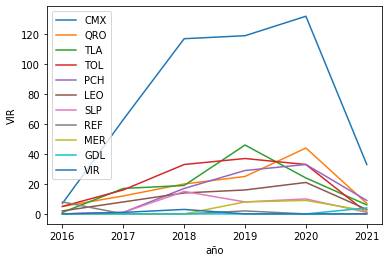

In [139]:
for i in lista_campus_matricula:
    indice=i
    try:
        sns.lineplot(egresado_t['año'],egresado_t[indice], label=i)
    except:
        pass

In [140]:
predicciones_graduados=[]
df=tabla_5[tabla_5['TOTAL MATERIAS CURSADAS BANNER']==42]
for i in lista_campus_matricula:
    df_2=df[df['CAMPUS']==i]
    grupo_alumnos=df_2.groupby('año final').agg({'MATRICULA':'count'})
    grupo_alumnos['año_final']=grupo_alumnos.index
    
    y_grupo_alumnos=grupo_alumnos[['MATRICULA']][:-1]
    x_grupo_alumnos=grupo_alumnos[['año_final']][:-1]
    
    try:
        poly_nuevos=make_pipeline(PolynomialFeatures(2),LinReg())
        poly_nuevos.fit(x_grupo_alumnos,y_grupo_alumnos)
        
        nuevos_graduado_2021=int(poly_nuevos.predict([[2021]]))
        
    except:
        nuevos_graduado_2021=0
    
    if nuevos_graduado_2021>0:
        predicciones_graduados.append([i,nuevos_graduado_2021])
    else:
        predicciones_graduados.append([i,0])

In [141]:
nuevos_egresados=pd.DataFrame(predicciones_graduados, columns=['campus','pronostico_graduados_2021'])
nuevos_egresados

,campus,pronostico_graduados_2021
0,CMX,110
1,QRO,58
2,TLA,18
3,TOL,26
4,PCH,31
5,LEO,22
6,SLP,0
7,REF,8
8,MER,10
9,GDL,0


In [142]:
egresados_historico['campus']=egresados_historico.index
egresados_historico

año final,2016,2017,2018,2019,2020,2021,campus
CAMPUS,,,,,,,
CMX,7.0,63.0,117.0,119.0,132.0,33.0,CMX
GDL,0.0,0.0,0.0,0.0,0.0,4.0,GDL
LEO,2.0,8.0,14.0,16.0,21.0,3.0,LEO
MER,0.0,0.0,0.0,8.0,9.0,2.0,MER
PCH,0.0,1.0,17.0,29.0,33.0,9.0,PCH
QRO,5.0,12.0,20.0,25.0,44.0,7.0,QRO
REF,8.0,0.0,0.0,2.0,0.0,0.0,REF
SLP,0.0,1.0,15.0,8.0,10.0,1.0,SLP
TLA,1.0,17.0,19.0,46.0,24.0,6.0,TLA


In [143]:
tabla_egresados=pd.merge(nuevos_egresados,egresados_historico, on='campus', how="inner")
tabla_egresados

,campus,pronostico_graduados_2021,2016,2017,2018,2019,2020,2021
0,CMX,110,7.0,63.0,117.0,119.0,132.0,33.0
1,QRO,58,5.0,12.0,20.0,25.0,44.0,7.0
2,TLA,18,1.0,17.0,19.0,46.0,24.0,6.0
3,TOL,26,5.0,16.0,33.0,37.0,33.0,1.0
4,PCH,31,0.0,1.0,17.0,29.0,33.0,9.0
5,LEO,22,2.0,8.0,14.0,16.0,21.0,3.0
6,SLP,0,0.0,1.0,15.0,8.0,10.0,1.0
7,REF,8,8.0,0.0,0.0,2.0,0.0,0.0
8,MER,10,0.0,0.0,0.0,8.0,9.0,2.0
9,GDL,0,0.0,0.0,0.0,0.0,0.0,4.0


In [144]:
historico_egresados=pd.pivot_table(tabla_5_egresados, columns= ['año final','PERIODO-ULTIMO-CURSADO'], index=['CAMPUS','PROGRAMA'], values='MATRICULA', aggfunc='count').fillna(0)
historico_egresados

año final                2016                        2017                \
PERIODO-ULTIMO-CURSADO 201627 201648 201649 201650 201712 201725 201726   
CAMPUS PROGRAMA                                                           
CMX    LEADMI             0.0    2.0    0.0    0.0    2.0    1.0    0.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    1.0    1.0   
       LECONT             0.0    1.0    1.0    1.0    0.0    4.0    3.0   
       LEECON             0.0    0.0    1.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    1.0    1.0    1.0    6.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    1.0    1.0   
GDL    LEFIBA             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
LEO    LEADMI             1.0    0.0    0.0    0.0    0.0    0.0    1.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    0.0    0.0    1.0    0.0   
       LEMERC             0.0    0.0    1.0    0.0    0.0    0.0    0.0   
MER    LEADMI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
PCH    LEADMI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
QRO    LEADMI             0.0    2.0    0.0    0.0    0.0    2.0    0.0   
       LECONI             0.0    0.0    0.0    2.0    0.0    0.0    3.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    1.0    0.0   
       LEECON             0.0    0.0    0.0    0.0    0.0    1.0    0.0   
       LEFIBA             0.0    0.0    0.0    1.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
REF    LEADMI             0.0    1.0    0.0    0.0    0.0    0.0    0.0   
       LECONI             0.0    2.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    1.0    3.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    1.0    0.0    0.0    0.0    0.0   
SLP    LEADMI             0.0    0.0    0.0    0.0    1.0    0.0    0.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
TLA    LEADMI             0.0    0.0    0.0    1.0    1.0    5.0    1.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONT             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEECON             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
TOL    LEADMI             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LECONI             0.0    0.0    0.0    0.0    0.0    1.0    2.0   
       LECONT             0.0    0.0    0.0    2.0    0.0    0.0    0.0   
       LEECON             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
       LEFIBA             0.0    0.0    0.0    3.0    1.0    1.0    1.0   
       LEMERC             0.0    0.0    0.0    0.0    0.0    0.0    0.0   
VIR    LECONI            

In [145]:
#exporto
historico_egresados.to_csv('out\historico_egresados.csv', sep=',')


In [146]:
#probabilidad
historico_egresado_prob=pd.DataFrame(index=historico_egresados[2020].index, columns=historico_egresados[2020].columns)

In [147]:
#valor total
suma_lista_e=[]
for i in historico_egresados[2020].columns:
    x=historico_egresados[2020][i].sum()
    suma_lista_e.append(x)

In [148]:
suma_egresados_2020=sum(suma_lista_e)
suma_egresados_2020

306.0

In [149]:
for i in historico_egresados[2020].columns:
    indice=i
    lista_auxiliar_2=[]
    for j in range(len(historico_egresados)):
        x=float(historico_egresados[2020][indice][j]/suma_egresados_2020)
        lista_auxiliar_2.append(x)
    historico_egresado_prob[indice]=lista_auxiliar_2

In [150]:
historico_egresado_prob

PERIODO-ULTIMO-CURSADO    202012    202025    202026    202027    202048  \
CAMPUS PROGRAMA                                                            
CMX    LEADMI           0.013072  0.003268  0.003268  0.003268  0.000000   
       LECONI           0.000000  0.000000  0.006536  0.016340  0.022876   
       LECONT           0.016340  0.022876  0.016340  0.003268  0.016340   
       LEECON           0.006536  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.013072  0.019608  0.000000  0.019608  0.003268   
       LEMERC           0.000000  0.000000  0.013072  0.000000  0.003268   
GDL    LEFIBA           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEMERC           0.000000  0.000000  0.000000  0.000000  0.000000   
LEO    LEADMI           0.000000  0.003268  0.003268  0.006536  0.000000   
       LECONI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONT           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.000000  0.003268  0.000000  0.003268  0.003268   
       LEMERC           0.000000  0.000000  0.003268  0.006536  0.000000   
MER    LEADMI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONT           0.000000  0.006536  0.000000  0.003268  0.003268   
       LEFIBA           0.000000  0.000000  0.000000  0.003268  0.000000   
       LEMERC           0.000000  0.000000  0.000000  0.003268  0.000000   
PCH    LEADMI           0.006536  0.003268  0.000000  0.003268  0.000000   
       LECONI           0.000000  0.013072  0.006536  0.003268  0.000000   
       LECONT           0.006536  0.000000  0.003268  0.000000  0.000000   
       LEFIBA           0.000000  0.000000  0.009804  0.006536  0.000000   
       LEMERC           0.006536  0.000000  0.009804  0.000000  0.000000   
QRO    LEADMI           0.006536  0.006536  0.000000  0.000000  0.003268   
       LECONI           0.000000  0.000000  0.003268  0.009804  0.000000   
       LECONT           0.000000  0.016340  0.000000  0.000000  0.003268   
       LEECON           0.006536  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.000000  0.006536  0.000000  0.009804  0.000000   
       LEMERC           0.000000  0.000000  0.006536  0.003268  0.003268   
REF    LEADMI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONT           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEMERC           0.000000  0.000000  0.000000  0.000000  0.000000   
SLP    LEADMI           0.000000  0.000000  0.000000  0.000000  0.000000   
       LECONI           0.000000  0.000000  0.000000  0.003268  0.000000   
       LECONT           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.000000  0.003268  0.003268  0.009804  0.000000   
       LEMERC           0.000000  0.000000  0.000000  0.000000  0.000000   
TLA    LEADMI           0.000000  0.000000  0.000000  0.000000  0.003268   
       LECONI           0.000000  0.006536  0.003268  0.000000  0.000000   
       LECONT           0.000000  0.003268  0.003268  0.000000  0.003268   
       LEECON           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.000000  0.009804  0.000000  0.003268  0.003268   
       LEMERC           0.000000  0.000000  0.000000  0.000000  0.000000   
TOL    LEADMI           0.006536  0.006536  0.003268  0.003268  0.000000   
       LECONI           0.000000  0.000000  0.006536  0.003268  0.003268   
       LECONT           0.009804  0.000000  0.000000  0.003268  0.003268   
       LEECON           0.000000  0.000000  0.000000  0.000000  0.000000   
       LEFIBA           0.000000  0.000000  0.000000  0.026144  0.006536   
       LEMERC           0.000000  0.000000  0.000000  0.000000  0.000000   
VIR    LECONI           0.000000  0.000000  0.00

In [151]:
pronostico_egresados_campus_carrera=pd.DataFrame(index=historico_egresados[2020].index, columns=historico_egresados[2020].columns)

In [152]:
for i in pronostico_egresados_campus_carrera:
    indice=i
    pronostico_egresados_campus_carrera[indice]=round(tabla_egresados['pronostico_graduados_2021'].sum()*historico_egresado_prob[i])

In [153]:
pronostico_egresados_campus_carrera

PERIODO-ULTIMO-CURSADO  202012  202025  202026  202027  202048  202049  202050
CAMPUS PROGRAMA                                                               
CMX    LEADMI              4.0     1.0     1.0     1.0     0.0     3.0     6.0
       LECONI              0.0     0.0     2.0     5.0     6.0     2.0     6.0
       LECONT              5.0     6.0     5.0     1.0     5.0     2.0    11.0
       LEECON              2.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEFIBA              4.0     6.0     0.0     6.0     1.0     7.0    13.0
       LEMERC              0.0     0.0     4.0     0.0     1.0     3.0     6.0
GDL    LEFIBA              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEMERC              0.0     0.0     0.0     0.0     0.0     0.0     0.0
LEO    LEADMI              0.0     1.0     1.0     2.0     0.0     1.0     2.0
       LECONI              0.0     0.0     0.0     0.0     0.0     3.0     0.0
       LECONT              0.0     0.0     0.0     0.0     0.0     0.0     4.0
       LEFIBA              0.0     1.0     0.0     1.0     1.0     0.0     1.0
       LEMERC              0.0     0.0     1.0     2.0     0.0     0.0     0.0
MER    LEADMI              0.0     0.0     0.0     0.0     0.0     1.0     0.0
       LECONI              0.0     0.0     0.0     0.0     0.0     1.0     0.0
       LECONT              0.0     2.0     0.0     1.0     1.0     0.0     0.0
       LEFIBA              0.0     0.0     0.0     1.0     0.0     0.0     0.0
       LEMERC              0.0     0.0     0.0     1.0     0.0     0.0     1.0
PCH    LEADMI              2.0     1.0     0.0     1.0     0.0     1.0     1.0
       LECONI              0.0     4.0     2.0     1.0     0.0     1.0     1.0
       LECONT              2.0     0.0     1.0     0.0     0.0     0.0     1.0
       LEFIBA              0.0     0.0     3.0     2.0     0.0     1.0     3.0
       LEMERC              2.0     0.0     3.0     0.0     0.0     0.0     0.0
QRO    LEADMI              2.0     2.0     0.0     0.0     1.0     3.0     5.0
       LECONI              0.0     0.0     1.0     3.0     0.0     1.0     1.0
       LECONT              0.0     5.0     0.0     0.0     1.0     1.0     1.0
       LEECON              2.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEFIBA              0.0     2.0     0.0     3.0     0.0     1.0     4.0
       LEMERC              0.0     0.0     2.0     1.0     1.0     0.0     1.0
REF    LEADMI              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LECONI              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LECONT              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEMERC              0.0     0.0     0.0     0.0     0.0     0.0     0.0
SLP    LEADMI              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LECONI              0.0     0.0     0.0     1.0     0.0     1.0     1.0
       LECONT              0.0     0.0     0.0     0.0     0.0     1.0     1.0
       LEFIBA              0.0     1.0     1.0     3.0     0.0     0.0     0.0
       LEMERC              0.0     0.0     0.0     0.0     0.0     0.0     0.0
TLA    LEADMI              0.0     0.0     0.0     0.0     1.0     0.0     5.0
       LECONI              0.0     2.0     1.0     0.0     0.0     0.0     2.0
       LECONT              0.0     1.0     1.0     0.0     1.0     0.0     3.0
       LEECON              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEFIBA              0.0     3.0     0.0     1.0     1.0     1.0     1.0
       LEMERC              0.0     0.0     0.0     0.0     0.0     0.0     0.0
TOL    LEADMI              2.0     2.0     1.0     1.0     0.0     1.0     1.0
       LECONI              0.0     0.0     2.0     1.0     1.0     1.0     0.0
       LECONT              3.0     0.0     0.0     1.0     1.0     0.0     1.0
       LEECON              0.0     0.0     0.0     0.0     0.0     0.0     0.0
       LEFIBA              0.0     0.0     0.0    

In [154]:
pronostico_egresados_campus_carrera.sum().sum()

298.0

In [155]:
#exporto
pronostico_egresados_campus_carrera.to_csv('out\pronostico_egresados_campus_carrera.csv', sep=',')

# clusters Alumnos

In [156]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [157]:
Y=tabla_6['Estatus Alumno_ACTIVO']
X=tabla_6.drop(['Estatus Alumno_ACTIVO'], axis=1)

In [158]:
X

,promedio,ultimo semestre,TOTAL MATERIAS CURSADAS BANNER,materias pagadas,terminó último periodo,año inicial,periodo inicial,año final,periodo final,codigo_estatus
0,6.750000,3,5,8,1,2010,25,2019,25,0
1,10.000000,2,5,2,0,2010,25,2018,48,0
2,8.066667,4,11,15,1,2013,48,2020,25,0
3,9.121951,8,42,41,1,2016,48,2019,25,0
4,9.523810,8,42,42,0,2015,27,2018,12,0
...,...,...,...,...,...,...,...,...,...,...
7127,3.333333,2,0,3,1,2021,25,2021,26,1
7128,5.000000,2,0,2,1,2021,25,2021,25,2
7129,3.250000,2,1,4,1,2021,25,2021,26,1
7130,4.750000,3,2,4,1,2021,25,2021,26,1


In [159]:
%%time
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

y_pred2_k=kmeans.predict(X)

print(silhouette_score(X,y_pred2_k))

0.42783618802249285
Wall time: 5.29 s


In [160]:
tabla_6['cluster_2']=y_pred2_k
tabla_5['cluster_2']=y_pred2_k

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
pd.crosstab(tabla_6['Estatus Alumno_ACTIVO'],tabla_6['cluster_2'], margins=True)

cluster_2,0,1,2,3,All
Estatus Alumno_ACTIVO,,,,,
0,1902,1685,1334,892,5813
1,491,0,465,363,1319
All,2393,1685,1799,1255,7132


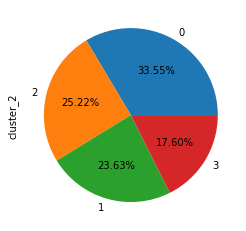

In [162]:
tabla_6['cluster_2'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [163]:
maximo_b=tabla_6['cluster_2'].value_counts().index[0]
medio_b=tabla_6['cluster_2'].value_counts().index[1]
medio_b2=tabla_6['cluster_2'].value_counts().index[2]
minimo_b=tabla_6['cluster_2'].value_counts().index[3]

In [164]:
tabla_6['grupo_2']=np.where(tabla_6['cluster_2']==maximo_b,'riesgo_desertar',tabla_5['cluster_2'])
tabla_6['grupo_2']=np.where(tabla_6['cluster_2']==medio_b,'proximo_graduarse',tabla_6['grupo_2'])
tabla_6['grupo_2']=np.where(tabla_6['cluster_2']==medio_b2,'desertor',tabla_6['grupo_2'])
tabla_6['grupo_2']=np.where(tabla_6['cluster_2']==minimo_b,'constante',tabla_6['grupo_2'])

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [165]:
tabla_5['grupo']=tabla_6['grupo_2']

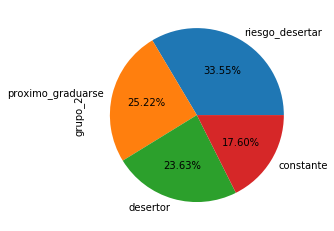

In [166]:
tabla_6['grupo_2'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [167]:
pd.crosstab(tabla_5['Estatus Alumno_ACTIVO'],tabla_5['grupo'], margins=True)

grupo,constante,desertor,proximo_graduarse,riesgo_desertar,All
Estatus Alumno_ACTIVO,,,,,
0,892,1685,1334,1902,5813
1,363,0,465,491,1319
All,1255,1685,1799,2393,7132


In [168]:
pd.crosstab(tabla_5['Estatus Alumno_INACTIVO'],tabla_6['grupo_2'], margins=True)

grupo_2,constante,desertor,proximo_graduarse,riesgo_desertar,All
Estatus Alumno_INACTIVO,,,,,
0,1094,1594,1549,2171,6408
1,161,91,250,222,724
All,1255,1685,1799,2393,7132


In [169]:
pd.crosstab(tabla_5['Estatus Alumno_PASIVO'],tabla_6['grupo_2'], margins=True)

grupo_2,constante,desertor,proximo_graduarse,riesgo_desertar,All
Estatus Alumno_PASIVO,,,,,
0,524,91,715,713,2043
1,731,1594,1084,1680,5089
All,1255,1685,1799,2393,7132


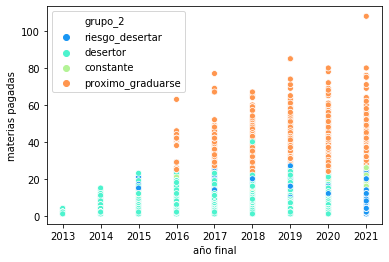

In [170]:
sns.scatterplot(tabla_6['año final'],tabla_6['materias pagadas'], hue=tabla_6['grupo_2'], palette='rainbow')

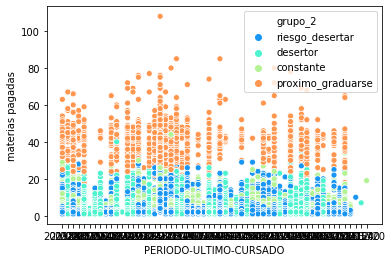

In [171]:
sns.scatterplot(tabla_5['PERIODO-ULTIMO-CURSADO'],tabla_6['materias pagadas'], hue=tabla_6['grupo_2'], palette='rainbow')

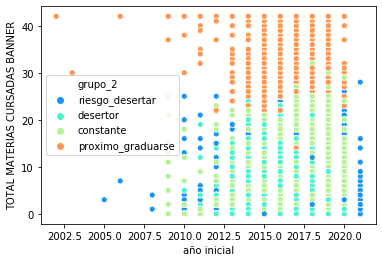

In [172]:
sns.scatterplot(tabla_5['año inicial'],tabla_5['TOTAL MATERIAS CURSADAS BANNER'], hue=tabla_6['grupo_2'], palette='rainbow')

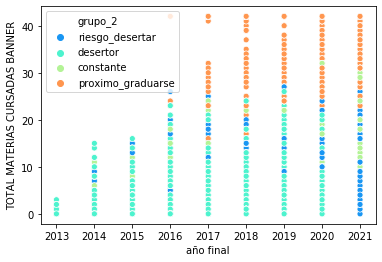

In [173]:
sns.scatterplot(tabla_5['año final'],tabla_5['TOTAL MATERIAS CURSADAS BANNER'], hue=tabla_6['grupo_2'], palette='rainbow')

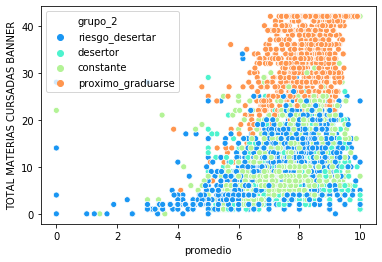

In [174]:
sns.scatterplot(tabla_6['promedio'],tabla_6['TOTAL MATERIAS CURSADAS BANNER'], hue=tabla_6['grupo_2'], palette='rainbow')

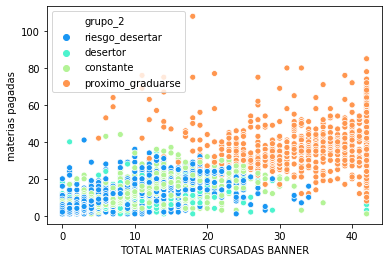

In [175]:
sns.scatterplot(tabla_6['TOTAL MATERIAS CURSADAS BANNER'],tabla_6['materias pagadas'], hue=tabla_6['grupo_2'], palette='rainbow')

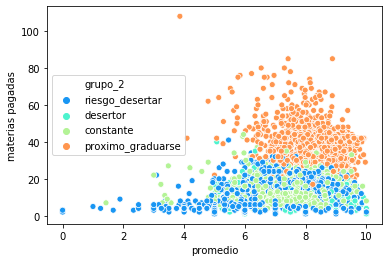

In [176]:
sns.scatterplot(tabla_6['promedio'],tabla_6['materias pagadas'], hue=tabla_6['grupo_2'], palette='rainbow')

In [177]:
tabla_5.columns

Index(['promedio', 'ultimo semestre', 'materias pagadas', 'MATRICULA', 'PIDM',
       'ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO', 'NOMBRE ALUMNO',
       'TOTAL MATERIAS CURSADAS BANNER', 'CAMPUS', 'PROGRAMA',
       'codigo_estatus', 'estatus_alumno', 'Estatus Alumno_ACTIVO',
       'Estatus Alumno_INACTIVO', 'Estatus Alumno_PASIVO',
       'terminó último periodo', 'año inicial', 'periodo inicial', 'año final',
       'periodo final', 'cluster_2', 'grupo'],
      dtype='object')

In [178]:
#agrego matricula
tabla_6['MATRICULA']=tabla_5['MATRICULA']

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
#exporto
tabla_5.to_csv('out\\alumnos_cluster.csv', sep=',')

# modelos registros

In [180]:
df2=pd.merge(historico_con_bajas,kardex_todas_materias, on='id', how="inner")
df2

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id,semestre,MODALIDA-MATERIA,Materia-Cursadas,MATERIAS-EN-CURSO,MATERIAS DEL CURSO,CALIFICACION,CAMPUS-MATERIAS,PLAN
0,85,23111,RE,201648,SP,85-23111,1,SP,1.0,0.0,Taller de Informacion Financie,10,Reforma 01,2013
1,85,23112,RE,201649,SP,85-23112,1,SP,1.0,0.0,Matematicas para Negocios,8,Reforma 01,2013
2,85,23113,RE,201650,VR,85-23113,1,VR,1.0,0.0,Principios de Derecho,8,EBC en Linea 08,2013
3,85,23114,RW,201726,SP,85-23114,1,SP,1.0,0.0,Mercadotecnia,10,Ciudad de Mexico 19,2013
4,85,23210,DD,201712,SP,85-23210,2,SP,1.0,0.0,Dinamica Empresarial,8,Ciudad de Mexico 19,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115606,1005537,28101,RE,202126,VR,1005537-28101,1,NaN,0.0,1.0,Informacion Financiera,0,VIR,2017
115607,1005537,28102,DD,202126,VR,1005537-28102,1,NaN,0.0,1.0,Fundamentos de administracion,0,VIR,2017
115608,1005537,28102,RE,202126,VR,1005537-28102,1,NaN,0.0,1.0,Fundamentos de administracion,0,VIR,2017
115609,1005537,28103,RE,202125,SP,1005537-28103,1,SP,1.0,0.0,Economia Empresarial,8,Ciudad de Mexico 19,2017


In [181]:
materias_registradas=pd.merge(df2,(pd.merge(alumnos,estatus, on='MATRICULA', how="inner")), on='PIDM', how="inner")

In [182]:
materias_registradas

,PIDM,CURSO,CODIGO ESTATUS MATERIA,PERIODO-COMPRA,MODALIDAD-MATERIA,id,semestre,MODALIDA-MATERIA,Materia-Cursadas,MATERIAS-EN-CURSO,...,MATRICULA,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,TOTAL MATERIAS CURSADAS BANNER,CAMPUS,PROGRAMA,Estatus Alumno
0,85,23111,RE,201648,SP,85-23111,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
1,85,23112,RE,201649,SP,85-23112,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
2,85,23113,RE,201650,VR,85-23113,1,VR,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
3,85,23114,RW,201726,SP,85-23114,1,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
4,85,23210,DD,201712,SP,85-23210,2,SP,1.0,0.0,...,M00000137,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,42,CMX,LEADMI,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115553,1005537,28101,RE,202126,VR,1005537-28101,1,NaN,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
115554,1005537,28102,DD,202126,VR,1005537-28102,1,NaN,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
115555,1005537,28102,RE,202126,VR,1005537-28102,1,NaN,0.0,1.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO
115556,1005537,28103,RE,202125,SP,1005537-28103,1,SP,1.0,0.0,...,M01005454,EL,202125,202126,202126,RAUL DIAZ*DURAN,2,PCH,LEMERC,ACTIVO


In [183]:
materias_registradas.columns

Index(['PIDM', 'CURSO', 'CODIGO ESTATUS MATERIA', 'PERIODO-COMPRA',
       'MODALIDAD-MATERIA', 'id', 'semestre', 'MODALIDA-MATERIA',
       'Materia-Cursadas', 'MATERIAS-EN-CURSO', 'MATERIAS DEL CURSO',
       'CALIFICACION', 'CAMPUS-MATERIAS', 'PLAN', 'MATRICULA',
       'ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO', 'NOMBRE ALUMNO',
       'TOTAL MATERIAS CURSADAS BANNER', 'CAMPUS', 'PROGRAMA',
       'Estatus Alumno'],
      dtype='object')

In [184]:
materias_registradas[['CURSO']].value_counts()

CURSO
23114    3086
23110    3018
23112    2824
23111    2790
23113    2689
         ... 
23571      11
23864      10
23761      10
23863      10
23460       9
Length: 316, dtype: int64

In [185]:
materias_2=materias_registradas[['id','CURSO', 'PERIODO-COMPRA','CODIGO ESTATUS MATERIA','MATERIAS DEL CURSO','MODALIDAD-MATERIA','semestre','CALIFICACION', 'CAMPUS-MATERIAS', 'PLAN',
            'CAMPUS','PERIODO-INICIO-CURRICULA','PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO','MATERIAS-EN-CURSO','TOTAL MATERIAS CURSADAS BANNER','PROGRAMA','Estatus Alumno']]

In [186]:
materias_2

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,CAMPUS,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,MATERIAS-EN-CURSO,TOTAL MATERIAS CURSADAS BANNER,PROGRAMA,Estatus Alumno
0,85-23111,23111,201648,RE,Taller de Informacion Financie,SP,1,10,Reforma 01,2013,CMX,201648,201925,201925,0.0,42,LEADMI,PASIVO
1,85-23112,23112,201649,RE,Matematicas para Negocios,SP,1,8,Reforma 01,2013,CMX,201648,201925,201925,0.0,42,LEADMI,PASIVO
2,85-23113,23113,201650,RE,Principios de Derecho,VR,1,8,EBC en Linea 08,2013,CMX,201648,201925,201925,0.0,42,LEADMI,PASIVO
3,85-23114,23114,201726,RW,Mercadotecnia,SP,1,10,Ciudad de Mexico 19,2013,CMX,201648,201925,201925,0.0,42,LEADMI,PASIVO
4,85-23210,23210,201712,DD,Dinamica Empresarial,SP,2,8,Ciudad de Mexico 19,2013,CMX,201648,201925,201925,0.0,42,LEADMI,PASIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115553,1005537-28101,28101,202126,RE,Informacion Financiera,VR,1,0,VIR,2017,PCH,202125,202126,202126,1.0,2,LEMERC,ACTIVO
115554,1005537-28102,28102,202126,DD,Fundamentos de administracion,VR,1,0,VIR,2017,PCH,202125,202126,202126,1.0,2,LEMERC,ACTIVO
115555,1005537-28102,28102,202126,RE,Fundamentos de administracion,VR,1,0,VIR,2017,PCH,202125,202126,202126,1.0,2,LEMERC,ACTIVO
115556,1005537-28103,28103,202125,RE,Economia Empresarial,SP,1,8,Ciudad de Mexico 19,2017,PCH,202125,202126,202126,0.0,2,LEMERC,ACTIVO


In [187]:
materias_2.dtypes

id                                 object
CURSO                              object
PERIODO-COMPRA                     object
CODIGO ESTATUS MATERIA             object
MATERIAS DEL CURSO                 object
MODALIDAD-MATERIA                  object
semestre                            int64
CALIFICACION                        int64
CAMPUS-MATERIAS                    object
PLAN                               object
CAMPUS                             object
PERIODO-INICIO-CURRICULA           object
PERIODO-ULTIMO-CURSADO             object
PERIODO-TIPOALUM-HISTORICO         object
MATERIAS-EN-CURSO                 float64
TOTAL MATERIAS CURSADAS BANNER      int64
PROGRAMA                           object
Estatus Alumno                     object
dtype: object

In [188]:
materias_2['terminó último periodo']=np.where(materias_2['PERIODO-ULTIMO-CURSADO']==materias_2['PERIODO-TIPOALUM-HISTORICO'],1,0)

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
materias_2.isnull().sum()

id                                0
CURSO                             0
PERIODO-COMPRA                    0
CODIGO ESTATUS MATERIA            0
MATERIAS DEL CURSO                0
MODALIDAD-MATERIA                 0
semestre                          0
CALIFICACION                      0
CAMPUS-MATERIAS                   0
PLAN                              0
CAMPUS                            0
PERIODO-INICIO-CURRICULA          0
PERIODO-ULTIMO-CURSADO            0
PERIODO-TIPOALUM-HISTORICO        0
MATERIAS-EN-CURSO                 0
TOTAL MATERIAS CURSADAS BANNER    0
PROGRAMA                          0
Estatus Alumno                    0
terminó último periodo            0
dtype: int64

In [190]:
materias_3=materias_2.fillna(0)


In [191]:
materias_3.isnull().sum()

id                                0
CURSO                             0
PERIODO-COMPRA                    0
CODIGO ESTATUS MATERIA            0
MATERIAS DEL CURSO                0
MODALIDAD-MATERIA                 0
semestre                          0
CALIFICACION                      0
CAMPUS-MATERIAS                   0
PLAN                              0
CAMPUS                            0
PERIODO-INICIO-CURRICULA          0
PERIODO-ULTIMO-CURSADO            0
PERIODO-TIPOALUM-HISTORICO        0
MATERIAS-EN-CURSO                 0
TOTAL MATERIAS CURSADAS BANNER    0
PROGRAMA                          0
Estatus Alumno                    0
terminó último periodo            0
dtype: int64

In [192]:
materias_3['materia inscrita']=np.where((materias_3['CODIGO ESTATUS MATERIA']=='RE')|(materias_3['CODIGO ESTATUS MATERIA']=='RW'),1,0)

In [193]:
materias_3['materia_baja']=np.where((materias_3['CODIGO ESTATUS MATERIA'].str.startswith('B')),1,0)

In [194]:
materias_3['materia terminada']=np.where((materias_3['CALIFICACION']!=0),1,0)

In [195]:
materias_3['CODIGO ESTATUS MATERIA'].value_counts()

RE    86987
RW    23883
DD     4138
BX      406
BC       50
RC       39
BE       29
BA       22
BD        4
Name: CODIGO ESTATUS MATERIA, dtype: int64

In [196]:
materias_3

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,MATERIAS-EN-CURSO,TOTAL MATERIAS CURSADAS BANNER,PROGRAMA,Estatus Alumno,terminó último periodo,materia inscrita,materia_baja,materia terminada
0,85-23111,23111,201648,RE,Taller de Informacion Financie,SP,1,10,Reforma 01,2013,...,201925,201925,0.0,42,LEADMI,PASIVO,1,1,0,1
1,85-23112,23112,201649,RE,Matematicas para Negocios,SP,1,8,Reforma 01,2013,...,201925,201925,0.0,42,LEADMI,PASIVO,1,1,0,1
2,85-23113,23113,201650,RE,Principios de Derecho,VR,1,8,EBC en Linea 08,2013,...,201925,201925,0.0,42,LEADMI,PASIVO,1,1,0,1
3,85-23114,23114,201726,RW,Mercadotecnia,SP,1,10,Ciudad de Mexico 19,2013,...,201925,201925,0.0,42,LEADMI,PASIVO,1,1,0,1
4,85-23210,23210,201712,DD,Dinamica Empresarial,SP,2,8,Ciudad de Mexico 19,2013,...,201925,201925,0.0,42,LEADMI,PASIVO,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115553,1005537-28101,28101,202126,RE,Informacion Financiera,VR,1,0,VIR,2017,...,202126,202126,1.0,2,LEMERC,ACTIVO,1,1,0,0
115554,1005537-28102,28102,202126,DD,Fundamentos de administracion,VR,1,0,VIR,2017,...,202126,202126,1.0,2,LEMERC,ACTIVO,1,0,0,0
115555,1005537-28102,28102,202126,RE,Fundamentos de administracion,VR,1,0,VIR,2017,...,202126,202126,1.0,2,LEMERC,ACTIVO,1,1,0,0
115556,1005537-28103,28103,202125,RE,Economia Empresarial,SP,1,8,Ciudad de Mexico 19,2017,...,202126,202126,0.0,2,LEMERC,ACTIVO,1,1,0,1


In [197]:
def campus(x):
    if x=='VIR':
        return 8
    else:
        try:
            z=re.findall(r'\d{2}$', x)
            return int(z[0])
        except:
            return x

In [198]:
materias_3['codigo_campus']=materias_3['CAMPUS-MATERIAS'].apply(campus)

In [199]:
materias_3['año compra']=materias_3['PERIODO-COMPRA'].apply(año_inicial)
materias_3['periodo compra']=materias_3['PERIODO-COMPRA'].apply(periodo_inicial)
materias_3['año inicial']=materias_3['PERIODO-INICIO-CURRICULA'].apply(año_inicial)
materias_3['periodo inicial']=materias_3['PERIODO-INICIO-CURRICULA'].apply(periodo_inicial)
materias_3['año final']=materias_3['PERIODO-ULTIMO-CURSADO'].apply(año_inicial)
materias_3['periodo final']=materias_3['PERIODO-ULTIMO-CURSADO'].apply(periodo_inicial)

In [200]:
def materias_sin_plan(x):
    z=re.findall(r'\d{3}$', x)
    return int(z[0])
    

In [201]:
materias_3['codigo_materias']=materias_3['CURSO'].apply(materias_sin_plan)

In [202]:
materias_3

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,materia_baja,materia terminada,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias
0,85-23111,23111,201648,RE,Taller de Informacion Financie,SP,1,10,Reforma 01,2013,...,0,1,1,2016,48,2016,48,2019,25,111
1,85-23112,23112,201649,RE,Matematicas para Negocios,SP,1,8,Reforma 01,2013,...,0,1,1,2016,49,2016,48,2019,25,112
2,85-23113,23113,201650,RE,Principios de Derecho,VR,1,8,EBC en Linea 08,2013,...,0,1,8,2016,50,2016,48,2019,25,113
3,85-23114,23114,201726,RW,Mercadotecnia,SP,1,10,Ciudad de Mexico 19,2013,...,0,1,19,2017,26,2016,48,2019,25,114
4,85-23210,23210,201712,DD,Dinamica Empresarial,SP,2,8,Ciudad de Mexico 19,2013,...,0,1,19,2017,12,2016,48,2019,25,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115553,1005537-28101,28101,202126,RE,Informacion Financiera,VR,1,0,VIR,2017,...,0,0,8,2021,26,2021,25,2021,26,101
115554,1005537-28102,28102,202126,DD,Fundamentos de administracion,VR,1,0,VIR,2017,...,0,0,8,2021,26,2021,25,2021,26,102
115555,1005537-28102,28102,202126,RE,Fundamentos de administracion,VR,1,0,VIR,2017,...,0,0,8,2021,26,2021,25,2021,26,102
115556,1005537-28103,28103,202125,RE,Economia Empresarial,SP,1,8,Ciudad de Mexico 19,2017,...,0,1,19,2021,25,2021,25,2021,26,103


In [203]:
materias_3.columns

Index(['id', 'CURSO', 'PERIODO-COMPRA', 'CODIGO ESTATUS MATERIA',
       'MATERIAS DEL CURSO', 'MODALIDAD-MATERIA', 'semestre', 'CALIFICACION',
       'CAMPUS-MATERIAS', 'PLAN', 'CAMPUS', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO',
       'MATERIAS-EN-CURSO', 'TOTAL MATERIAS CURSADAS BANNER', 'PROGRAMA',
       'Estatus Alumno', 'terminó último periodo', 'materia inscrita',
       'materia_baja', 'materia terminada', 'codigo_campus', 'año compra',
       'periodo compra', 'año inicial', 'periodo inicial', 'año final',
       'periodo final', 'codigo_materias'],
      dtype='object')

In [204]:
materias_3['PLAN']=materias_3['PLAN'].apply(lambda x: int(x))

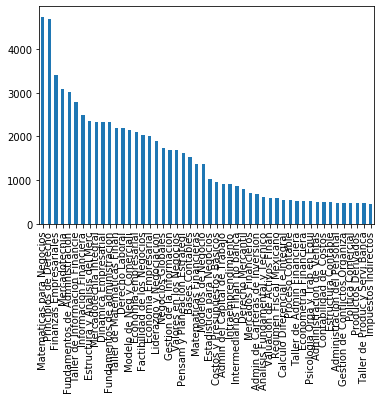

In [205]:
#materias mas importantes
materias_3['MATERIAS DEL CURSO'].value_counts().head(50).plot(kind='bar')

In [206]:
lista_campus_matricula=list(materias_3['CAMPUS'].value_counts().index)
lista_campus_matricula

['CMX',
 'QRO',
 'PCH',
 'TOL',
 'TLA',
 'LEO',
 'SLP',
 'MER',
 'GDL',
 'REF',
 'AGS',
 'VIR',
 'CHI']

In [207]:
lista_campus=list(materias_3['CAMPUS-MATERIAS'].value_counts().index)
lista_campus

['EBC en Linea 08',
 'Ciudad de Mexico 19',
 'Reforma 01',
 'Pachuca 16',
 'Toluca 07',
 'Tlalnepantla 05',
 'Queretaro 11',
 'Leon 14',
 'VIR',
 'San Luis Potosi 15',
 'Merida 17',
 'Guadalajara 18',
 'Aguascalientes 20']

In [208]:
materias_final=materias_3

In [209]:
materias_4=pd.get_dummies(materias_3, columns=['MODALIDAD-MATERIA','PROGRAMA','periodo compra','MATERIAS DEL CURSO','CAMPUS-MATERIAS','CAMPUS'])

In [210]:
materias_4.columns

Index(['id', 'CURSO', 'PERIODO-COMPRA', 'CODIGO ESTATUS MATERIA', 'semestre',
       'CALIFICACION', 'PLAN', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO',
       ...
       'CAMPUS_GDL', 'CAMPUS_LEO', 'CAMPUS_MER', 'CAMPUS_PCH', 'CAMPUS_QRO',
       'CAMPUS_REF', 'CAMPUS_SLP', 'CAMPUS_TLA', 'CAMPUS_TOL', 'CAMPUS_VIR'],
      dtype='object', length=346)

In [211]:
campus_m_groupby=[]
for i in lista_campus_matricula:
    campus_m_groupby.append('CAMPUS_'+str(i))

In [212]:
campus_m_dict=dict(zip(campus_m_groupby,['sum']*len(campus_m_groupby)))

In [213]:
campus_groupby=[]
for i in lista_campus:
    campus_groupby.append('CAMPUS-MATERIAS_'+str(i))

In [214]:
campus_dict=dict(zip(campus_groupby,['sum']*len(campus_groupby)))

In [215]:
grupo_1=materias_4.groupby(['año compra']).agg({'id':'count','materia_baja':'sum','materia terminada':'sum',
                                           'MODALIDAD-MATERIA_PR':'sum', 'MODALIDAD-MATERIA_SP':'sum',
       'MODALIDAD-MATERIA_VR':'sum',})

In [216]:
grupo_campus=materias_4.groupby(['año compra']).agg(campus_dict)

In [217]:
grupo_campus_m=materias_4.groupby(['año compra']).agg(campus_m_dict)

In [218]:
grupo_por_año=pd.concat([grupo_1,grupo_campus,grupo_campus_m], axis=1)
grupo_por_año

,id,materia_baja,materia terminada,MODALIDAD-MATERIA_PR,MODALIDAD-MATERIA_SP,MODALIDAD-MATERIA_VR,CAMPUS-MATERIAS_EBC en Linea 08,CAMPUS-MATERIAS_Ciudad de Mexico 19,CAMPUS-MATERIAS_Reforma 01,CAMPUS-MATERIAS_Pachuca 16,...,CAMPUS_TOL,CAMPUS_TLA,CAMPUS_LEO,CAMPUS_SLP,CAMPUS_MER,CAMPUS_GDL,CAMPUS_REF,CAMPUS_AGS,CAMPUS_VIR,CAMPUS_CHI
año compra,,,,,,,,,,,,,,,,,,,,,
2013,317,6,317,0,227.0,90.0,92.0,0.0,78.0,0.0,...,46.0,47.0,25.0,0.0,0.0,0.0,69.0,0.0,0,1
2014,3504,64,3504,1,2290.0,1213.0,1193.0,19.0,1230.0,0.0,...,431.0,428.0,258.0,15.0,0.0,0.0,688.0,0.0,6,2
2015,8139,74,8138,0,4882.0,3257.0,3281.0,71.0,2713.0,186.0,...,877.0,935.0,609.0,111.0,0.0,0.0,1036.0,0.0,56,0
2016,13304,59,13303,0,7794.0,5478.0,5496.0,292.0,3622.0,898.0,...,1518.0,1371.0,826.0,452.0,24.0,0.0,481.0,0.0,67,0
2017,18071,106,18051,10,10093.0,7732.0,8051.0,4698.0,19.0,1461.0,...,1794.0,1712.0,1230.0,816.0,459.0,0.0,29.0,0.0,55,0
2018,20826,84,20770,0,11250.0,9217.0,9646.0,5116.0,2.0,1438.0,...,1880.0,2000.0,1436.0,991.0,729.0,533.0,28.0,9.0,23,3
2019,22326,52,22235,0,11209.0,10835.0,11150.0,5166.0,0.0,1432.0,...,2103.0,1872.0,1384.0,1025.0,941.0,864.0,18.0,405.0,0,0
2020,20750,49,20507,0,7828.0,12594.0,12728.0,3462.0,0.0,1158.0,...,1677.0,1581.0,1348.0,1026.0,973.0,1202.0,0.0,624.0,0,0
2021,8321,17,5634,0,2995.0,5326.0,3528.0,1159.0,0.0,424.0,...,593.0,681.0,555.0,435.0,455.0,499.0,0.0,309.0,0,0


In [219]:
grupo_por_año['año_compra']=grupo_por_año.index
grupo_por_año['año_compra']=grupo_por_año['año_compra'].apply(lambda x: int(x))
grupo_por_año.reset_index(drop=True, inplace=True)

In [220]:
#cambio de nombre
grupo_por_año.rename(columns={'id':'registros'}, inplace=True)

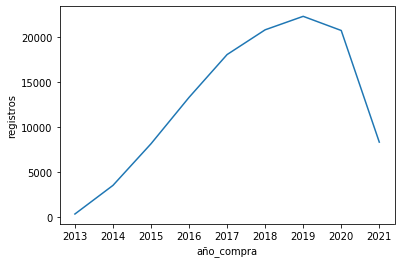

In [221]:
sns.lineplot(grupo_por_año['año_compra'],grupo_por_año['registros'])

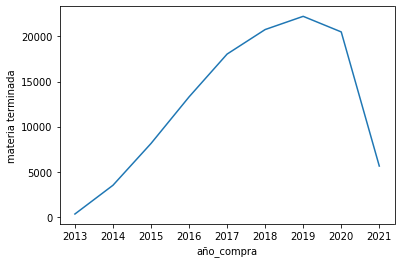

In [222]:
sns.lineplot(grupo_por_año['año_compra'],grupo_por_año['materia terminada'])

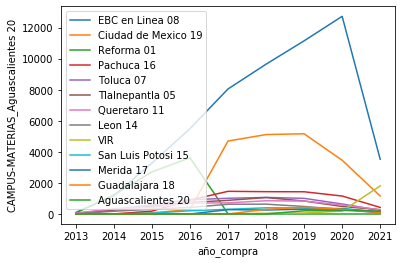

In [223]:
#campus materia
for i in lista_campus:
    indice='CAMPUS-MATERIAS_'+i
    sns.lineplot(grupo_por_año['año_compra'],grupo_por_año[indice], label=i)

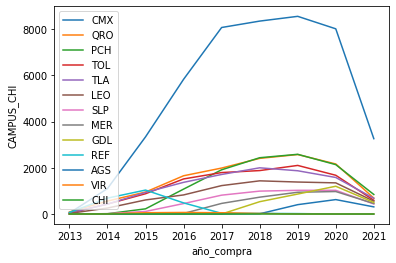

In [224]:
#campus matricula
for i in lista_campus_matricula:
    indice='CAMPUS_'+i
    sns.lineplot(grupo_por_año['año_compra'],grupo_por_año[indice], label=i)

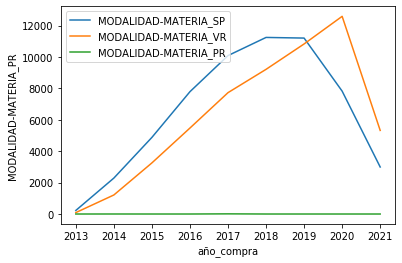

In [225]:
sns.lineplot(grupo_por_año['año_compra'],grupo_por_año['MODALIDAD-MATERIA_SP'],label='MODALIDAD-MATERIA_SP')
sns.lineplot(grupo_por_año['año_compra'],grupo_por_año['MODALIDAD-MATERIA_VR'], label='MODALIDAD-MATERIA_VR')
sns.lineplot(grupo_por_año['año_compra'],grupo_por_año['MODALIDAD-MATERIA_PR'], label='MODALIDAD-MATERIA_PR')


In [226]:
materias_5=pd.get_dummies(materias_3, columns=['MODALIDAD-MATERIA','periodo compra','año compra','CAMPUS-MATERIAS', 'CAMPUS'])
materias_5

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,semestre,CALIFICACION,PLAN,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,...,CAMPUS_GDL,CAMPUS_LEO,CAMPUS_MER,CAMPUS_PCH,CAMPUS_QRO,CAMPUS_REF,CAMPUS_SLP,CAMPUS_TLA,CAMPUS_TOL,CAMPUS_VIR
0,85-23111,23111,201648,RE,Taller de Informacion Financie,1,10,2013,201648,201925,...,0,0,0,0,0,0,0,0,0,0
1,85-23112,23112,201649,RE,Matematicas para Negocios,1,8,2013,201648,201925,...,0,0,0,0,0,0,0,0,0,0
2,85-23113,23113,201650,RE,Principios de Derecho,1,8,2013,201648,201925,...,0,0,0,0,0,0,0,0,0,0
3,85-23114,23114,201726,RW,Mercadotecnia,1,10,2013,201648,201925,...,0,0,0,0,0,0,0,0,0,0
4,85-23210,23210,201712,DD,Dinamica Empresarial,2,8,2013,201648,201925,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115553,1005537-28101,28101,202126,RE,Informacion Financiera,1,0,2017,202125,202126,...,0,0,0,1,0,0,0,0,0,0
115554,1005537-28102,28102,202126,DD,Fundamentos de administracion,1,0,2017,202125,202126,...,0,0,0,1,0,0,0,0,0,0
115555,1005537-28102,28102,202126,RE,Fundamentos de administracion,1,0,2017,202125,202126,...,0,0,0,1,0,0,0,0,0,0
115556,1005537-28103,28103,202125,RE,Economia Empresarial,1,8,2017,202125,202126,...,0,0,0,1,0,0,0,0,0,0


In [227]:
grupo_por_año.columns

Index(['registros', 'materia_baja', 'materia terminada',
       'MODALIDAD-MATERIA_PR', 'MODALIDAD-MATERIA_SP', 'MODALIDAD-MATERIA_VR',
       'CAMPUS-MATERIAS_EBC en Linea 08',
       'CAMPUS-MATERIAS_Ciudad de Mexico 19', 'CAMPUS-MATERIAS_Reforma 01',
       'CAMPUS-MATERIAS_Pachuca 16', 'CAMPUS-MATERIAS_Toluca 07',
       'CAMPUS-MATERIAS_Tlalnepantla 05', 'CAMPUS-MATERIAS_Queretaro 11',
       'CAMPUS-MATERIAS_Leon 14', 'CAMPUS-MATERIAS_VIR',
       'CAMPUS-MATERIAS_San Luis Potosi 15', 'CAMPUS-MATERIAS_Merida 17',
       'CAMPUS-MATERIAS_Guadalajara 18', 'CAMPUS-MATERIAS_Aguascalientes 20',
       'CAMPUS_CMX', 'CAMPUS_QRO', 'CAMPUS_PCH', 'CAMPUS_TOL', 'CAMPUS_TLA',
       'CAMPUS_LEO', 'CAMPUS_SLP', 'CAMPUS_MER', 'CAMPUS_GDL', 'CAMPUS_REF',
       'CAMPUS_AGS', 'CAMPUS_VIR', 'CAMPUS_CHI', 'año_compra'],
      dtype='object')

# regresión lineal y polinomial cantidad de materias registradas

In [228]:
from sklearn.linear_model import LinearRegression as LinReg

In [229]:
from sklearn.preprocessing import PolynomialFeatures

In [230]:
from sklearn.pipeline import make_pipeline

In [231]:
y=grupo_por_año[['registros']][:-1]
x=grupo_por_año[['año_compra']][:-1]

In [232]:
linreg=LinReg()

In [233]:
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
#prediccion
prediccion_2021=int(linreg.predict([[2021]]))
prediccion_2021

28402

In [235]:
polyreg=make_pipeline(PolynomialFeatures(3),LinReg())

In [236]:
polyreg.fit(x,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [237]:
pred_poly_2021=int(polyreg.predict([[2021]]))
pred_poly_2021

15316

In [238]:
#predicción por campus MATERIAS
predicciones=[]
for i in lista_campus:
    indice='CAMPUS-MATERIAS_'+i
    y=grupo_por_año[[indice]][:-1]
    x=grupo_por_año[['año_compra']][:-1]
    polyreg=make_pipeline(PolynomialFeatures(3),LinReg())
    polyreg.fit(x,y)
    prediccion_2021=int(polyreg.predict([[2021]]))
    if prediccion_2021<=0:
        predicciones.append([i,0])
    else:
        predicciones.append([i,prediccion_2021])
    
    
    

In [239]:
prediccion_por_campus_materias=pd.DataFrame(data=predicciones,columns=['campus','materias'])
prediccion_por_campus_materias

,campus,materias
0,EBC en Linea 08,12924
1,Ciudad de Mexico 19,0
2,Reforma 01,2216
3,Pachuca 16,43
4,Toluca 07,73
5,Tlalnepantla 05,0
6,Queretaro 11,242
7,Leon 14,0
8,VIR,309
9,San Luis Potosi 15,145


In [240]:
predicciones_m=[]
for i in lista_campus_matricula:
    indice='CAMPUS_'+i
    y=grupo_por_año[[indice]][:-1]
    x=grupo_por_año[['año_compra']][:-1]
    polyreg=make_pipeline(PolynomialFeatures(3),LinReg())
    polyreg.fit(x,y)
    prediccion_2021=int(polyreg.predict([[2021]]))
    if prediccion_2021<=0:
        predicciones_m.append([i,0])
    else:
        predicciones_m.append([i,prediccion_2021])
    
    
    

In [241]:
prediccion_por_campus_matriculas=pd.DataFrame(data=predicciones_m,columns=['campus','materias'])
prediccion_por_campus_matriculas

,campus,materias
0,CMX,4973
1,QRO,1440
2,PCH,716
3,TOL,1013
4,TLA,832
5,LEO,957
6,SLP,603
7,MER,891
8,GDL,1823
9,REF,906


# grupos de materias

In [242]:
grupo_materias=materias_5.groupby(['codigo_materias']).agg({'id':'count','materia_baja':'sum','materia terminada':'sum',
                                           'MODALIDAD-MATERIA_PR':'sum', 'MODALIDAD-MATERIA_SP':'sum',
       'MODALIDAD-MATERIA_VR':'sum','año compra_2013':'sum',
       'año compra_2014':'sum', 'año compra_2015':'sum', 'año compra_2016':'sum',
       'año compra_2017':'sum', 'año compra_2018':'sum', 'año compra_2019':'sum',
       'año compra_2020':'sum', 'año compra_2021':'sum',})

In [243]:
grupo_materias.rename(columns={'id':'registros'}, inplace=True)

In [244]:
grupo_materias['codigo_materias']=grupo_materias.index

In [245]:
grupo_materias.reset_index(drop=True)

,registros,materia_baja,materia terminada,MODALIDAD-MATERIA_PR,MODALIDAD-MATERIA_SP,MODALIDAD-MATERIA_VR,año compra_2013,año compra_2014,año compra_2015,año compra_2016,año compra_2017,año compra_2018,año compra_2019,año compra_2020,año compra_2021,codigo_materias
0,2496,5,2434,0,1478.0,1018.0,0,0.0,0.0,0.0,0.0,658.0,856.0,729.0,253.0,101
1,2317,3,2285,0,996.0,1321.0,0,0.0,0.0,0.0,0.0,618.0,754.0,676.0,269.0,102
2,2015,14,1958,0,1284.0,731.0,0,0.0,0.0,0.0,0.0,482.0,749.0,576.0,208.0,103
3,2320,10,2276,0,1250.0,1070.0,0,0.0,0.0,0.0,0.0,540.0,838.0,674.0,268.0,104
4,1918,7,1832,0,1325.0,593.0,0,0.0,0.0,0.0,0.0,490.0,614.0,626.0,188.0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,358,0,344,0,206.0,145.0,0,0.0,0.0,18.0,51.0,96.0,107.0,67.0,19.0,868
312,348,0,348,0,154.0,177.0,0,0.0,0.0,29.0,57.0,107.0,82.0,67.0,6.0,869
313,324,0,313,0,140.0,177.0,0,0.0,0.0,21.0,56.0,87.0,79.0,61.0,20.0,870
314,352,2,337,0,186.0,148.0,0,0.0,0.0,17.0,51.0,117.0,99.0,49.0,19.0,871


In [246]:
grupo_materias.columns

Index(['registros', 'materia_baja', 'materia terminada',
       'MODALIDAD-MATERIA_PR', 'MODALIDAD-MATERIA_SP', 'MODALIDAD-MATERIA_VR',
       'año compra_2013', 'año compra_2014', 'año compra_2015',
       'año compra_2016', 'año compra_2017', 'año compra_2018',
       'año compra_2019', 'año compra_2020', 'año compra_2021',
       'codigo_materias'],
      dtype='object')

In [247]:
grupo_materias_modelo=grupo_materias[['codigo_materias','registros', 'materia_baja', 'materia terminada',
       'MODALIDAD-MATERIA_PR', 'MODALIDAD-MATERIA_SP', 'MODALIDAD-MATERIA_VR',
       'año compra_2013', 'año compra_2014', 'año compra_2015',
       'año compra_2016', 'año compra_2017', 'año compra_2018',
       'año compra_2019', 'año compra_2020','año compra_2021' ]]

In [248]:
grupo_materias_modelo

,codigo_materias,registros,materia_baja,materia terminada,MODALIDAD-MATERIA_PR,MODALIDAD-MATERIA_SP,MODALIDAD-MATERIA_VR,año compra_2013,año compra_2014,año compra_2015,año compra_2016,año compra_2017,año compra_2018,año compra_2019,año compra_2020,año compra_2021
codigo_materias,,,,,,,,,,,,,,,,
101,101,2496,5,2434,0,1478.0,1018.0,0,0.0,0.0,0.0,0.0,658.0,856.0,729.0,253.0
102,102,2317,3,2285,0,996.0,1321.0,0,0.0,0.0,0.0,0.0,618.0,754.0,676.0,269.0
103,103,2015,14,1958,0,1284.0,731.0,0,0.0,0.0,0.0,0.0,482.0,749.0,576.0,208.0
104,104,2320,10,2276,0,1250.0,1070.0,0,0.0,0.0,0.0,0.0,540.0,838.0,674.0,268.0
105,105,1918,7,1832,0,1325.0,593.0,0,0.0,0.0,0.0,0.0,490.0,614.0,626.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,358,0,344,0,206.0,145.0,0,0.0,0.0,18.0,51.0,96.0,107.0,67.0,19.0
869,869,348,0,348,0,154.0,177.0,0,0.0,0.0,29.0,57.0,107.0,82.0,67.0,6.0
870,870,324,0,313,0,140.0,177.0,0,0.0,0.0,21.0,56.0,87.0,79.0,61.0,20.0


In [249]:
registros_2020=materias_3[materias_3['año compra']==2020]
registros_2020

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,materia_baja,materia terminada,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias
233,225-23742,23742,202026,RW,Admin de Riesgos Financieros,SP,7,8,Ciudad de Mexico 19,2013,...,0,1,19,2020,26,2015,26,2020,26,742
242,225-23840,23840,202025,RW,Valores en los Negocios,VR,8,8,EBC en Linea 08,2013,...,0,1,8,2020,25,2015,26,2020,26,840
247,225-23844,23844,202025,RW,Genera de Valor en Serv Conta,SP,8,9,Ciudad de Mexico 19,2013,...,0,1,19,2020,25,2015,26,2020,26,844
262,299-23330,23330,202025,RW,Estructura y Analisis del Merc,VR,3,5,EBC en Linea 08,2013,...,0,1,8,2020,25,2013,48,2020,25,330
266,299-23335,23335,202012,RE,Gestion de Conflictos Organiza,VR,3,9,EBC en Linea 08,2013,...,0,1,8,2020,12,2013,48,2020,25,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114446,1003881-28105,28105,202050,RE,Matematicas para Negocios,SP,1,10,Aguascalientes 20,2017,...,0,1,20,2020,50,2020,50,2020,50,105
114455,1003901-28102,28102,202050,RE,Fundamentos de administracion,VR,1,8,EBC en Linea 08,2017,...,0,1,8,2020,50,2020,50,2021,25,102
114456,1003901-28104,28104,202050,RE,Mercadotecnia Integral,VR,1,8,EBC en Linea 08,2017,...,0,1,8,2020,50,2020,50,2021,25,104
114459,1003902-28101,28101,202050,RE,Informacion Financiera,SP,1,5,Aguascalientes 20,2017,...,0,1,20,2020,50,2020,50,2021,25,101


In [250]:
registros_2020=materias_3[materias_3['año compra']==2020]
registros_2020

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,materia_baja,materia terminada,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias
233,225-23742,23742,202026,RW,Admin de Riesgos Financieros,SP,7,8,Ciudad de Mexico 19,2013,...,0,1,19,2020,26,2015,26,2020,26,742
242,225-23840,23840,202025,RW,Valores en los Negocios,VR,8,8,EBC en Linea 08,2013,...,0,1,8,2020,25,2015,26,2020,26,840
247,225-23844,23844,202025,RW,Genera de Valor en Serv Conta,SP,8,9,Ciudad de Mexico 19,2013,...,0,1,19,2020,25,2015,26,2020,26,844
262,299-23330,23330,202025,RW,Estructura y Analisis del Merc,VR,3,5,EBC en Linea 08,2013,...,0,1,8,2020,25,2013,48,2020,25,330
266,299-23335,23335,202012,RE,Gestion de Conflictos Organiza,VR,3,9,EBC en Linea 08,2013,...,0,1,8,2020,12,2013,48,2020,25,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114446,1003881-28105,28105,202050,RE,Matematicas para Negocios,SP,1,10,Aguascalientes 20,2017,...,0,1,20,2020,50,2020,50,2020,50,105
114455,1003901-28102,28102,202050,RE,Fundamentos de administracion,VR,1,8,EBC en Linea 08,2017,...,0,1,8,2020,50,2020,50,2021,25,102
114456,1003901-28104,28104,202050,RE,Mercadotecnia Integral,VR,1,8,EBC en Linea 08,2017,...,0,1,8,2020,50,2020,50,2021,25,104
114459,1003902-28101,28101,202050,RE,Informacion Financiera,SP,1,5,Aguascalientes 20,2017,...,0,1,20,2020,50,2020,50,2021,25,101


In [251]:
materias_2020=pd.crosstab(registros_2020['CURSO'], registros_2020['PERIODO-COMPRA'], margins=True)

In [252]:
materias_2020

PERIODO-COMPRA,202012,202025,202026,202027,202048,202049,202050,All
CURSO,,,,,,,,
23110,4,1,1,1,1,2,1,11
23111,7,10,0,3,4,4,2,30
23112,5,7,3,5,3,6,3,32
23113,1,2,3,3,2,3,1,15
23114,2,3,2,2,6,0,2,17
...,...,...,...,...,...,...,...,...
28827,0,0,0,0,0,13,14,27
28828,0,0,0,0,0,39,0,39
28829,0,29,0,0,19,0,13,61


In [253]:
total_2020=materias_2020['All']['All']
total_2020

20750

In [254]:
materias_prob=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)

In [255]:
for i in list(materias_2020.columns):
    k=materias_2020[i]/total_2020
    materias_prob[i]=k

In [256]:
materias_prob


PERIODO-COMPRA,202012,202025,202026,202027,202048,202049,202050,All
CURSO,,,,,,,,
23110,0.000193,0.000048,0.000048,0.000048,0.000048,0.000096,0.000048,0.000530
23111,0.000337,0.000482,0.000000,0.000145,0.000193,0.000193,0.000096,0.001446
23112,0.000241,0.000337,0.000145,0.000241,0.000145,0.000289,0.000145,0.001542
23113,0.000048,0.000096,0.000145,0.000145,0.000096,0.000145,0.000048,0.000723
23114,0.000096,0.000145,0.000096,0.000096,0.000289,0.000000,0.000096,0.000819
...,...,...,...,...,...,...,...,...
28827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000627,0.000675,0.001301
28828,0.000000,0.000000,0.000000,0.000000,0.000000,0.001880,0.000000,0.001880
28829,0.000000,0.001398,0.000000,0.000000,0.000916,0.000000,0.000627,0.002940


In [257]:
materias_2021_pred=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)

In [258]:
periodos_2021=['202112','202125','202126','202127','202148','202149','202150']

In [259]:
for i in (list(materias_2020.columns)):
    k=round(materias_prob[i]*pred_poly_2021)
    materias_2021_pred[i]=k

In [260]:
materias_2021_pred.rename(columns={'202012':'202112','202025':'202125','202026':'202126','202027':'202127',
                                  '202048':'202148','202049':'202149','202050':'202150'}, inplace=True)

In [261]:
materias_2021_pred

PERIODO-COMPRA,202112,202125,202126,202127,202148,202149,202150,All
CURSO,,,,,,,,
23110,3.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
23111,5.0,7.0,0.0,2.0,3.0,3.0,1.0,22.0
23112,4.0,5.0,2.0,4.0,2.0,4.0,2.0,24.0
23113,1.0,1.0,2.0,2.0,1.0,2.0,1.0,11.0
23114,1.0,2.0,1.0,1.0,4.0,0.0,1.0,13.0
...,...,...,...,...,...,...,...,...
28827,0.0,0.0,0.0,0.0,0.0,10.0,10.0,20.0
28828,0.0,0.0,0.0,0.0,0.0,29.0,0.0,29.0
28829,0.0,21.0,0.0,0.0,14.0,0.0,10.0,45.0


In [262]:
materia_semestre=registros_2020.groupby(['CURSO']).agg({'semestre':'max', 'PLAN':'min'})

In [263]:
semestres=list(materia_semestre['semestre'].values)
semestres.append(0)

In [264]:
planes=list(materia_semestre['PLAN'].values)
planes.append(0)

In [265]:
materias_2021_pred['semestre']=semestres

In [266]:
materias_2021_pred['plan']=planes

In [267]:
materias_2021_pred

PERIODO-COMPRA,202112,202125,202126,202127,202148,202149,202150,All,semestre,plan
CURSO,,,,,,,,,,
23110,3.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,1,2013
23111,5.0,7.0,0.0,2.0,3.0,3.0,1.0,22.0,1,2013
23112,4.0,5.0,2.0,4.0,2.0,4.0,2.0,24.0,1,2013
23113,1.0,1.0,2.0,2.0,1.0,2.0,1.0,11.0,1,2013
23114,1.0,2.0,1.0,1.0,4.0,0.0,1.0,13.0,1,2013
...,...,...,...,...,...,...,...,...,...,...
28827,0.0,0.0,0.0,0.0,0.0,10.0,10.0,20.0,8,2017
28828,0.0,0.0,0.0,0.0,0.0,29.0,0.0,29.0,8,2017
28829,0.0,21.0,0.0,0.0,14.0,0.0,10.0,45.0,8,2017


In [268]:
#EXPORTO
materias_2021_pred.to_csv('out\prediccion_codigo_materia_todos_los_campus.csv',sep=',')

In [269]:
#funcion corrige periodo
def periodo(x):
    return x.replace('2020','2021')

In [270]:
#for por campus materias
lista_df_campus=[]
for i in lista_campus:
    df=materias_3[materias_3['CAMPUS-MATERIAS']==i]

    registros_2020=df[df['año compra']==2020]
    try:
        materias_2020=pd.crosstab(registros_2020['CURSO'], registros_2020['PERIODO-COMPRA'], margins=True)
    
        total_2020=materias_2020['All']['All']
    
        materias_prob=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)
    
        for j in list(materias_2020.columns):
            k=materias_2020[j]/total_2020
            materias_prob[j]=k
        
        #columnas
        columnas=[]
        for j in list(materias_2020.columns):
            k=periodo(j)
            columnas.append(k)

        materias_2021_pred=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)    
      
    
    
        for j in list(materias_2020.columns):
            k=round(materias_prob[j]*prediccion_por_campus_materias[prediccion_por_campus_materias['campus']==i]['materias'].values)
            materias_2021_pred[j]=k
            
        
        diccionario=dict(zip(materias_2020.columns, columnas))
        
        materias_2021_pred.rename(columns=diccionario, inplace=True)
    
        materia_semestre=registros_2020.groupby(['CURSO']).agg({'semestre':'max', 'PLAN':'min'})
    
        semestres=list(materia_semestre['semestre'].values)
        semestres.append(0)
    
        planes=list(materia_semestre['PLAN'].values)
        planes.append(0)
        materias_2021_pred['semestre']=semestres
        materias_2021_pred['plan']=planes
    
        lista_df_campus.append(materias_2021_pred)
        
    except:
        lista_df_campus.append(pd.DataFrame())

In [271]:
#exporto
for i in range(len(lista_campus)):
    nombre='prediccion_CAMPUS_MATERIA'+str(lista_campus[i])
    lista_df_campus[i].to_csv('out\CAMPUS_MATERIAS\\'+nombre+'.csv',sep=',')

In [272]:
materias_3['CAMPUS'].value_counts()

CMX    46570
QRO    13081
PCH    11231
TOL    10919
TLA    10627
LEO     7671
SLP     4871
MER     3581
GDL     3098
REF     2349
AGS     1347
VIR      207
CHI        6
Name: CAMPUS, dtype: int64

In [273]:
lista_campus_matricula

['CMX',
 'QRO',
 'PCH',
 'TOL',
 'TLA',
 'LEO',
 'SLP',
 'MER',
 'GDL',
 'REF',
 'AGS',
 'VIR',
 'CHI']

In [274]:
#for por campus matRICULA
lista_df_campus_m_año_anterior=[]
lista_df_campus_m_pronostico=[]
for i in lista_campus_matricula:
    df=materias_3[materias_3['CAMPUS']==i]

    registros_2020=df[df['año compra']==año_anterior]
    try:
        materias_2020=pd.crosstab(registros_2020['CURSO'], registros_2020['PERIODO-COMPRA'], margins=True)
        
    
        total_2020=materias_2020['All']['All']
        
    
    
        materias_prob=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)
    
        for j in list(materias_2020.columns):
            k=materias_2020[j]/total_2020
            materias_prob[j]=k
        
        
        #columnas
        columnas=[]
        for j in list(materias_2020.columns):
            k=periodo(j)
            columnas.append(k)

        materias_2021_pred=pd.DataFrame(index=materias_2020.index, columns=materias_2020.columns)
        
    
        for j in list(materias_2020.columns):
            k=round(materias_prob[j]*prediccion_por_campus_matriculas[prediccion_por_campus_matriculas['campus']==i]['materias'].values)
            materias_2021_pred[j]=k
          
        
        diccionario=dict(zip(materias_2020.columns, columnas))
        
        materias_2021_pred.rename(columns=diccionario, inplace=True)
    
        materia_semestre=registros_2020.groupby(['CURSO']).agg({'semestre':'max', 'PLAN':'min'})
    
        semestres=list(materia_semestre['semestre'].values)
        semestres.append(0)
    
        planes=list(materia_semestre['PLAN'].values)
        planes.append(0)
        materias_2021_pred['semestre']=semestres
        materias_2021_pred['plan']=planes
    
        lista_df_campus_m_pronostico.append(materias_2021_pred)
        lista_df_campus_m_año_anterior.append(materias_2020)
        
    except:
        lista_df_campus_m_pronostico.append(pd.DataFrame())
        lista_df_campus_m_año_anterior.append(pd.DataFrame())

In [275]:
#exporto
for i in range(len(lista_campus_matricula)):
    nombre_anterior=str(año_anterior)+'_campus_matricula_'+str(lista_campus_matricula[i])
    nombre_p='prediccion_CAMPUS_matricula_'+str(lista_campus_matricula[i])
    lista_df_campus_m_pronostico[i].to_csv('out\CAMPUS_MATRICULA\\'+nombre_p+'.csv',sep=',')
    lista_df_campus_m_año_anterior[i].to_csv('out\CAMPUS_MATRICULA\\'+nombre_anterior+'.csv',sep=',')

# cluster inscripciones

In [276]:
materias_modelo=materias_3[['semestre', 'materia inscrita','CALIFICACION','materia terminada',
       'codigo_campus', 'año compra', 'periodo compra', 'PLAN']]

In [277]:
materias_modelo['materia_virtual']=np.where(materias_3['MODALIDAD-MATERIA']=='VR',1,0)

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
materias_modelo.dtypes

semestre             int64
materia inscrita     int32
CALIFICACION         int64
materia terminada    int32
codigo_campus        int64
año compra           int64
periodo compra       int64
PLAN                 int64
materia_virtual      int32
dtype: object

In [279]:
materias_modelo.corr()

,semestre,materia inscrita,CALIFICACION,materia terminada,codigo_campus,año compra,periodo compra,PLAN,materia_virtual
semestre,1.000000,0.028167,0.110163,-0.051653,0.000168,0.224158,0.000912,-0.206624,0.149961
materia inscrita,0.028167,1.000000,0.023843,-0.004540,0.013185,0.063889,0.004105,0.041714,0.003104
CALIFICACION,0.110163,0.023843,1.000000,0.648462,0.042568,-0.097613,0.048802,-0.066716,-0.076244
materia terminada,-0.051653,-0.004540,0.648462,1.000000,0.002468,-0.248386,0.074654,-0.163119,-0.064119
codigo_campus,0.000168,0.013185,0.042568,0.002468,1.000000,0.259755,-0.029503,0.175282,-0.408752
año compra,0.224158,0.063889,-0.097613,-0.248386,0.259755,1.000000,-0.183428,0.621220,0.153615
periodo compra,0.000912,0.004105,0.048802,0.074654,-0.029503,-0.183428,1.000000,-0.027356,-0.000538
PLAN,-0.206624,0.041714,-0.066716,-0.163119,0.175282,0.621220,-0.027356,1.000000,0.028773
materia_virtual,0.149961,0.003104,-0.076244,-0.064119,-0.408752,0.153615,-0.000538,0.028773,1.000000


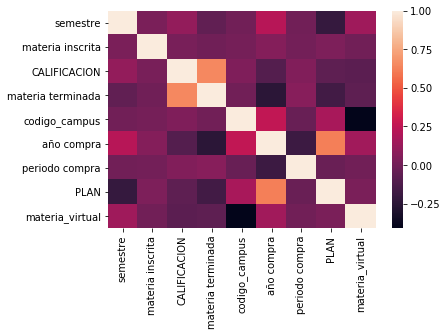

In [280]:
sns.heatmap(materias_modelo.corr())

In [281]:
Y_materias=materias_modelo['materia terminada']
X_materias=materias_modelo.drop(['materia terminada'],axis=1)

In [282]:
%%time
kmaterias=KMeans(n_clusters=3)
kmaterias.fit(X_materias)

y_pred_m=kmaterias.predict(X_materias)

Wall time: 1.63 s


In [283]:
#%%time
#print(silhouette_score(X_materias,y_pred_m))

In [284]:
materias_final['cluster']=y_pred_m

In [285]:
materias_final['cluster'].value_counts()

2    50385
1    48102
0    17071
Name: cluster, dtype: int64

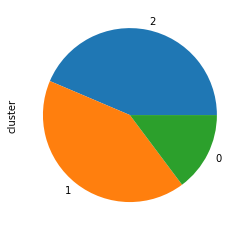

In [286]:
materias_final['cluster'].value_counts().plot(kind='pie')

In [287]:
maximo_m=materias_final['cluster'].value_counts().index[0]
medio_m=materias_final['cluster'].value_counts().index[1]
minimo_m=materias_final['cluster'].value_counts().index[2]

In [288]:
materias_final['grupo']=np.where(materias_final['cluster']==maximo_m,'inscripcion_reciente',materias_final['cluster'])
materias_final['grupo']=np.where(materias_final['cluster']==medio_m,'inscripcion_historica',materias_final['grupo'])
materias_final['grupo']=np.where(materias_final['cluster']==minimo_m,'inscripcion_casi_graduado',materias_final['grupo'])

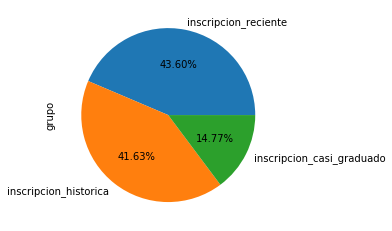

In [289]:
materias_final['grupo'].value_counts().plot(kind='pie', autopct='%1.2f%%')

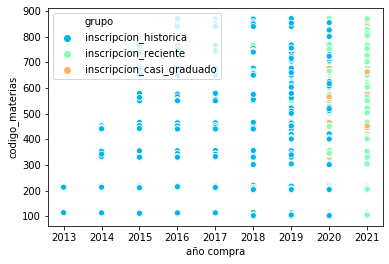

In [290]:
sns.scatterplot(materias_final['año compra'],materias_final['codigo_materias'], hue=materias_final['grupo'], palette='rainbow')

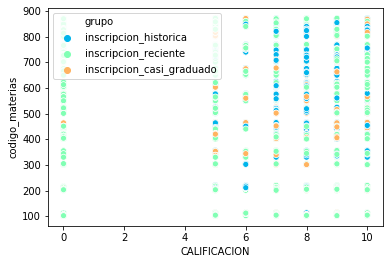

In [291]:
sns.scatterplot(materias_final['CALIFICACION'],materias_final['codigo_materias'], hue=materias_final['grupo'], palette='rainbow')

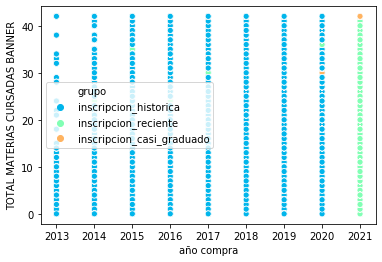

In [292]:
sns.scatterplot(materias_final['año compra'],materias_final['TOTAL MATERIAS CURSADAS BANNER'], hue=materias_final['grupo'], palette='rainbow')

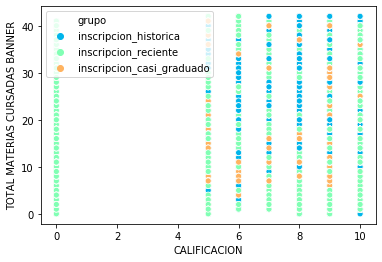

In [293]:
sns.scatterplot(materias_final['CALIFICACION'],materias_final['TOTAL MATERIAS CURSADAS BANNER'], hue=materias_final['grupo'], palette='rainbow')

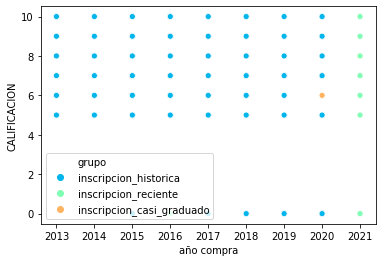

In [294]:
sns.scatterplot(materias_final['año compra'],materias_final['CALIFICACION'], hue=materias_final['grupo'], palette='rainbow')

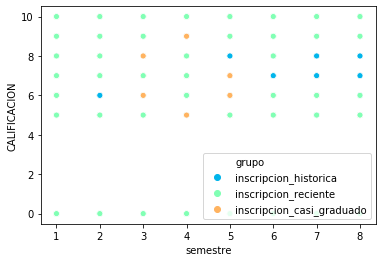

In [295]:
sns.scatterplot(materias_final['semestre'],materias_final['CALIFICACION'], hue=materias_final['grupo'], palette='rainbow')

In [296]:
registros_historicos_con_calif=materias_final[(materias_final['grupo']=='inscripcion_historica') & (materias_final['materia terminada']==1)&(materias_final['año compra']<=2020)]
registros_historicos_con_calif

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias,cluster,grupo
0,85-23111,23111,201648,RE,Taller de Informacion Financie,SP,1,10,Reforma 01,2013,...,1,2016,48,2016,48,2019,25,111,1,inscripcion_historica
1,85-23112,23112,201649,RE,Matematicas para Negocios,SP,1,8,Reforma 01,2013,...,1,2016,49,2016,48,2019,25,112,1,inscripcion_historica
2,85-23113,23113,201650,RE,Principios de Derecho,VR,1,8,EBC en Linea 08,2013,...,8,2016,50,2016,48,2019,25,113,1,inscripcion_historica
6,85-23211,23211,201650,RE,Taller de Matematicas Finan,SP,2,7,Reforma 01,2013,...,1,2016,50,2016,48,2019,25,211,1,inscripcion_historica
13,85-23335,23335,201748,RE,Gestion de Conflictos Organiza,SP,3,10,Ciudad de Mexico 19,2013,...,19,2017,48,2016,48,2019,25,335,1,inscripcion_historica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114446,1003881-28105,28105,202050,RE,Matematicas para Negocios,SP,1,10,Aguascalientes 20,2017,...,20,2020,50,2020,50,2020,50,105,1,inscripcion_historica
114455,1003901-28102,28102,202050,RE,Fundamentos de administracion,VR,1,8,EBC en Linea 08,2017,...,8,2020,50,2020,50,2021,25,102,1,inscripcion_historica
114456,1003901-28104,28104,202050,RE,Mercadotecnia Integral,VR,1,8,EBC en Linea 08,2017,...,8,2020,50,2020,50,2021,25,104,1,inscripcion_historica
114459,1003902-28101,28101,202050,RE,Informacion Financiera,SP,1,5,Aguascalientes 20,2017,...,20,2020,50,2020,50,2021,25,101,1,inscripcion_historica


In [297]:
materias_historicas_con=registros_historicos_con_calif.groupby('CURSO').agg({'id':'count','CALIFICACION':'mean','PERIODO-COMPRA':'min'}).sort_values('id',ascending=False)

In [298]:
materias_historicas_con['CURSO']=materias_historicas_con.index

In [299]:
materias_historicas_con.reset_index(drop=True, inplace=True)

In [300]:
materias_historicas_con.rename(columns={'id':'registros terminados','CALIFICACION':'promedio','PERIODO-COMPRA':'primer compra'}, inplace=True)

In [301]:
materias_historicas_con_calificacion=pd.merge(materias_historicas_con,materias_final,on='CURSO', how='inner')[['registros terminados','promedio',
                                                                           'primer compra','CURSO','MATERIAS DEL CURSO']].drop_duplicates()

In [302]:
materias_historicas_con_calificacion

,registros terminados,promedio,primer compra,CURSO,MATERIAS DEL CURSO
0,1426,7.997195,201349,23114,Mercadotecnia
3086,1352,7.786243,201349,23110,Fundamentos de Administracion
6104,1316,7.237842,201350,23112,Matematicas para Negocios
8928,1241,7.520548,201349,23111,Taller de Informacion Financie
11718,1178,8.011036,201350,23113,Principios de Derecho
...,...,...,...,...,...
115466,3,8.666667,201549,23571,Macroeconomia Abierta
115477,3,7.666667,201649,23864,Sem Integrador de Economia
115487,3,9.000000,201648,23863,Desarrollo Economico
115497,3,8.333333,201948,23763,Lab de modelos Econometricos


In [303]:
#exporto
materias_historicas_con_calificacion.to_csv('out\materias_historicas_con_calificación.csv', sep=',')

In [304]:
registro_desertado_actual=materias_final[(materias_final['grupo']=='inscripcion_reciente')&(materias_final['materia terminada']==0)]
registro_desertado_actual

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias,cluster,grupo
363,1913-28602,28602,202126,RE,Admi de Carteras de Inversion,VR,6,0,VIR,2017,...,8,2021,26,2013,26,2021,26,602,2,inscripcion_reciente
367,1913-28703,28703,202126,RE,Riesgos Financieros,VR,7,0,VIR,2017,...,8,2021,26,2013,26,2021,26,703,2,inscripcion_reciente
670,4748-23566,23566,202126,RE,Tratados Comer Internacio II,VR,5,0,VIR,2013,...,8,2021,26,2019,25,2021,26,566,2,inscripcion_reciente
682,4748-23860,23860,202126,RE,Direccion de Plan de Exporta,SP,8,0,Ciudad de Mexico 19,2013,...,19,2021,26,2019,25,2021,26,860,2,inscripcion_reciente
1081,7429-23442,23442,202126,RW,Estructura Contable,SP,4,0,Ciudad de Mexico 19,2013,...,19,2021,26,2003,12,2021,26,442,2,inscripcion_reciente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115551,1005520-28305,28305,202126,RE,Estadistica para Negocios,SP,3,0,Toluca 07,2017,...,7,2021,26,2021,25,2021,26,305,2,inscripcion_reciente
115552,1005537-28101,28101,202126,DD,Informacion Financiera,VR,1,0,VIR,2017,...,8,2021,26,2021,25,2021,26,101,2,inscripcion_reciente
115553,1005537-28101,28101,202126,RE,Informacion Financiera,VR,1,0,VIR,2017,...,8,2021,26,2021,25,2021,26,101,2,inscripcion_reciente
115554,1005537-28102,28102,202126,DD,Fundamentos de administracion,VR,1,0,VIR,2017,...,8,2021,26,2021,25,2021,26,102,2,inscripcion_reciente


In [305]:
materias_desertadas_actual=registro_desertado_actual.groupby('CURSO').agg({'id':'count','CALIFICACION':'mean','PERIODO-COMPRA':'max'}).sort_values('id',ascending=False)

In [306]:
materias_desertadas_actual['CURSO']=materias_desertadas_actual.index

In [307]:
materias_desertadas_actual.reset_index(drop=True, inplace=True)

In [308]:
materias_desertadas_actual.rename(columns={'id':'registros_desertados_recientemiente','CALIFICACION':'promedio','PERIODO-COMPRA':'ultima compra'}, inplace=True)

In [309]:
materias_desertadas_actual_2=pd.merge(materias_desertadas_actual,materias_final,on='CURSO', how='inner')[['registros_desertados_recientemiente','promedio',
                                                                           'ultima compra','CURSO','MATERIAS DEL CURSO']].drop_duplicates()

In [310]:
materias_desertadas_actual_2

,registros_desertados_recientemiente,promedio,ultima compra,CURSO,MATERIAS DEL CURSO
0,101,0,202126,28202,Bases Contables
1535,94,0,202126,28205,Gestion de la Informacion
3228,93,0,202126,28303,Costos y Presupuestos Basicos
4176,89,0,202126,28204,Negocios Globales
5909,87,0,202126,28401,Intraemprendimiento
...,...,...,...,...,...
69402,1,0,202126,23343,Mercadotecnia Internacional
69702,1,0,202126,23216,Comportamiento del Consumidor
69926,1,0,202125,28624,Econometria Financiera
70036,1,0,202126,23211,Taller de Matematicas Finan


In [311]:
#exporto
materias_desertadas_actual_2.to_csv('out\materias_sin_calificacion_recientes.csv', sep=',')

In [312]:
registro_terminado_actual=materias_final[(materias_final['materia terminada']==1)&(materias_final['año compra']>=2020)]
registro_terminado_actual

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias,cluster,grupo
233,225-23742,23742,202026,RW,Admin de Riesgos Financieros,SP,7,8,Ciudad de Mexico 19,2013,...,19,2020,26,2015,26,2020,26,742,2,inscripcion_reciente
242,225-23840,23840,202025,RW,Valores en los Negocios,VR,8,8,EBC en Linea 08,2013,...,8,2020,25,2015,26,2020,26,840,2,inscripcion_reciente
247,225-23844,23844,202025,RW,Genera de Valor en Serv Conta,SP,8,9,Ciudad de Mexico 19,2013,...,19,2020,25,2015,26,2020,26,844,2,inscripcion_reciente
262,299-23330,23330,202025,RW,Estructura y Analisis del Merc,VR,3,5,EBC en Linea 08,2013,...,8,2020,25,2013,48,2020,25,330,2,inscripcion_reciente
266,299-23335,23335,202012,RE,Gestion de Conflictos Organiza,VR,3,9,EBC en Linea 08,2013,...,8,2020,12,2013,48,2020,25,335,0,inscripcion_casi_graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115547,1005511-28203,28203,202125,RE,Principios de Derecho,VR,2,5,EBC en Linea 08,2017,...,8,2021,25,2021,25,2021,26,203,2,inscripcion_reciente
115549,1005520-28203,28203,202125,RE,Principios de Derecho,SP,2,10,Pachuca 16,2017,...,16,2021,25,2021,25,2021,26,203,2,inscripcion_reciente
115550,1005520-28205,28205,202125,RE,Gestion de la Informacion,SP,2,9,Pachuca 16,2017,...,16,2021,25,2021,25,2021,26,205,2,inscripcion_reciente
115556,1005537-28103,28103,202125,RE,Economia Empresarial,SP,1,8,Ciudad de Mexico 19,2017,...,19,2021,25,2021,25,2021,26,103,2,inscripcion_reciente


In [313]:
materias_terminadas_actual=registro_terminado_actual.groupby('CURSO').agg({'id':'count','CALIFICACION':'mean','PERIODO-COMPRA':'max'}).sort_values('id',ascending=False)

In [314]:
materias_terminadas_actual['CURSO']=materias_terminadas_actual.index

In [315]:
materias_terminadas_actual.reset_index(drop=True, inplace=True)

In [316]:
materias_terminadas_actual.rename(columns={'id':'registros_terminados_recientemiente','CALIFICACION':'promedio','PERIODO-COMPRA':'ultima compra'}, inplace=True)

In [317]:
materias_terminadas_actual_2=pd.merge(materias_terminadas_actual,materias_final,on='CURSO', how='inner')[['registros_terminados_recientemiente','promedio',
                                                                           'ultima compra','CURSO','MATERIAS DEL CURSO','PLAN']].drop_duplicates().reset_index(drop=True)

In [318]:
materias_terminadas_actual_2.head(20)

,registros_terminados_recientemiente,promedio,ultima compra,CURSO,MATERIAS DEL CURSO,PLAN
0,922,7.890456,202125,28101,Informacion Financiera,2017
1,915,8.342077,202125,28102,Fundamentos de administracion,2017
2,900,8.236667,202125,28104,Mercadotecnia Integral,2017
3,820,8.846341,202125,28204,Negocios Globales,2017
4,807,8.724907,202126,28205,Gestion de la Informacion,2017
5,765,8.837908,202125,28301,Modelos de Negocio,2017
6,751,8.303595,202125,28304,Derecho Laboral,2017
7,733,8.407913,202125,28203,Principios de Derecho,2017
8,730,7.839726,202125,28103,Economia Empresarial,2017
9,729,7.695473,202125,28105,Matematicas para Negocios,2017


In [319]:
top_20=materias_terminadas_actual_2.head(20)['CURSO']

In [320]:
lista_materias=list(materias_terminadas_actual_2['CURSO'])

In [321]:
lista_materias_2013=list(materias_terminadas_actual_2[materias_terminadas_actual_2['PLAN']==2013]['CURSO'])

In [322]:
lista_materias_2017=list(materias_terminadas_actual_2[materias_terminadas_actual_2['PLAN']==2017]['CURSO'])

# Prediccion materias

In [323]:
#prueba una materia
uno=materias_final[materias_final['CURSO']=='28101']
uno

,id,CURSO,PERIODO-COMPRA,CODIGO ESTATUS MATERIA,MATERIAS DEL CURSO,MODALIDAD-MATERIA,semestre,CALIFICACION,CAMPUS-MATERIAS,PLAN,...,codigo_campus,año compra,periodo compra,año inicial,periodo inicial,año final,periodo final,codigo_materias,cluster,grupo
339,1749-28101,28101,201825,RE,Informacion Financiera,VR,1,5,EBC en Linea 08,2017,...,8,2018,25,2018,12,2018,25,101,2,inscripcion_reciente
624,3559-28101,28101,201827,RE,Informacion Financiera,SP,1,10,Guadalajara 18,2017,...,18,2018,27,2009,48,2020,12,101,2,inscripcion_reciente
1230,8608-28101,28101,201827,RE,Informacion Financiera,SP,1,7,Ciudad de Mexico 19,2017,...,19,2018,27,2010,49,2020,50,101,2,inscripcion_reciente
1307,9296-28101,28101,201926,RE,Informacion Financiera,SP,1,8,Ciudad de Mexico 19,2017,...,19,2019,26,2019,12,2021,26,101,2,inscripcion_reciente
1376,9964-28101,28101,201926,RE,Informacion Financiera,SP,1,5,Ciudad de Mexico 19,2017,...,19,2019,26,2018,49,2019,26,101,2,inscripcion_reciente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115530,1005487-28101,28101,202126,RE,Informacion Financiera,SP,1,0,Pachuca 16,2017,...,16,2021,26,2021,25,2021,26,101,2,inscripcion_reciente
115534,1005489-28101,28101,202125,RE,Informacion Financiera,SP,1,5,Merida 17,2017,...,17,2021,25,2021,25,2021,25,101,2,inscripcion_reciente
115544,1005511-28101,28101,202125,RE,Informacion Financiera,SP,1,8,Queretaro 11,2017,...,11,2021,25,2021,25,2021,26,101,2,inscripcion_reciente
115552,1005537-28101,28101,202126,DD,Informacion Financiera,VR,1,0,VIR,2017,...,8,2021,26,2021,25,2021,26,101,2,inscripcion_reciente


In [324]:
uno_plan=list(uno['PLAN'].value_counts().index)[0]

In [325]:
año_uno=uno.groupby('año compra').agg({'id':'count'})
año_uno

,id
año compra,
2018,658
2019,856
2020,729
2021,253


In [326]:
año_uno['año']=año_uno.index

In [327]:
año_uno_x=año_uno[['año']][:-1]
año_uno_y=año_uno[['id']][:-1]

In [328]:
modelo_uno=make_pipeline(PolynomialFeatures(3),LinReg())

In [329]:
modelo_uno.fit(año_uno_x, año_uno_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [330]:
pred_uno=int(modelo_uno.predict([[2021]]))
pred_uno

276

In [331]:
Uno_año=pd.pivot_table(uno, columns= ['año compra','periodo compra'], index=['CAMPUS','PROGRAMA'], values='id', aggfunc='count').fillna(0)

In [332]:
Uno_año[2020]

periodo compra     12    25   26   27    48   49    50
CAMPUS PROGRAMA                                       
AGS    LEADMI     0.0   0.0  2.0  1.0   1.0  2.0   1.0
       LECONI     0.0   0.0  4.0  1.0   0.0  2.0   2.0
       LECONT     0.0   0.0  0.0  0.0   1.0  0.0   0.0
       LEFIBA     0.0   0.0  3.0  0.0   0.0  1.0   3.0
       LEMERC     0.0   0.0  0.0  0.0   0.0  1.0   0.0
CMX    LEADMI     4.0  16.0  3.0  3.0   6.0  3.0   2.0
       LECONI     1.0  15.0  2.0  4.0   4.0  4.0   7.0
       LECONT     5.0  21.0  3.0  3.0  13.0  4.0   6.0
       LEFIBA    17.0  37.0  5.0  6.0  30.0  5.0  12.0
       LEMERC     4.0  17.0  2.0  3.0   8.0  0.0   1.0
GDL    LEADMI     1.0   2.0  3.0  0.0   2.0  4.0   1.0
       LECONI     0.0   3.0  0.0  0.0   0.0  2.0   1.0
       LECONT     0.0   0.0  2.0  0.0   2.0  1.0   1.0
       LEFIBA     3.0   4.0  2.0  4.0   2.0  2.0   1.0
       LEMERC     2.0   1.0  0.0  2.0   0.0  0.0   0.0
LEO    LEADMI     4.0   2.0  3.0  2.0   0.0  0.0   1.0
       LECONI     1.0   1.0  0.0  0.0   0.0  0.0   1.0
       LECONT     0.0   0.0  1.0  1.0   2.0  1.0   4.0
       LEFIBA     2.0   2.0  5.0  2.0   2.0  0.0   1.0
       LEMERC     0.0   0.0  2.0  0.0   0.0  0.0   0.0
MER    LEADMI     4.0   1.0  2.0  0.0   1.0  0.0   0.0
       LECONI     4.0   0.0  1.0  2.0   1.0  1.0   1.0
       LECONT     8.0   2.0  1.0  0.0   2.0  0.0   0.0
       LEFIBA     3.0   1.0  0.0  1.0   1.0  0.0   3.0
       LEMERC     4.0   0.0  0.0  0.0   3.0  0.0   2.0
PCH    LEADMI     0.0   8.0  1.0  2.0   0.0  3.0   1.0
       LECONI     3.0   9.0  2.0  2.0   1.0  0.0   4.0
       LECONT     2.0   6.0  4.0  4.0   0.0  2.0   0.0
       LEFIBA     1.0   8.0  2.0  0.0   2.0  4.0   1.0
       LEMERC     1.0   3.0  1.0  0.0   0.0  1.0   0.0
QRO    LEADMI     0.0   5.0  0.0  0.0   0.0  0.0   0.0
       LECONI     0.0   7.0  0.0  0.0   2.0  0.0   0.0
       LECONT     0.0   5.0  1.0  1.0   3.0  0.0   0.0
       LEFIBA     2.0   9.0  1.0  4.0   6.0  1.0   1.0
       LEMERC     0.0   3.0  0.0  0.0   2.0  0.0   1.0
SLP    LEADMI     0.0   3.0  1.0  0.0   4.0  1.0   2.0
       LECONI     0.0   2.0  0.0  3.0   1.0  0.0   0.0
       LECONT     0.0   6.0  1.0  3.0   2.0  1.0   1.0
       LEFIBA     1.0   4.0  2.0  1.0   3.0  0.0   2.0
       LEMERC     0.0   1.0  0.0  1.0   2.0  0.0   0.0
TLA    LEADMI     0.0   8.0  2.0  1.0   0.0  2.0   1.0
       LECONI     0.0   1.0  1.0  0.0   3.0  0.0   0.0
       LECONT     0.0   2.0  3.0  1.0   4.0  0.0   0.0
       LEFIBA     2.0   6.0  0.0  2.0   3.0  1.0   4.0
       LEMERC     2.0   3.0  0.0  1.0   1.0  2.0   3.0
TOL    LEADMI     1.0   1.0  0.0  1.0   0.0  2.0   2.0
       LECONI     1.0   1.0  2.0  2.0   0.0  2.0   1.0
       LECONT     0.0   1.0  0.0  3.0   1.0  0.0   0.0
       LEFIBA     4.0   2.0  2.0  3.0   1.0  5.0   5.0
       LEMERC     1.0   1.0  1.0  4.0   0.0  2.0   0.0

In [333]:
uno_prob=pd.DataFrame(index=Uno_año[2020].index,columns=Uno_año[2020].columns)

In [334]:
#valor total
uno_lista=[]
for i in Uno_año[2020].columns:
    x=Uno_año[2020][i].sum()
    uno_lista.append(x)

In [335]:
uno_total=sum(uno_lista)
uno_total

729.0

In [336]:
len(Uno_año[2020])

50

In [337]:
for i in Uno_año[2020].columns:
    indice=i
    lista_auxiliar_uno=[]
    for j in range(len(Uno_año[2020])):
        x=float(Uno_año[2020][indice][j]/uno_total)
        lista_auxiliar_uno.append(x)
    uno_prob[indice]=lista_auxiliar_uno

In [338]:
uno_prob

periodo compra         12        25        26        27        48        49  \
CAMPUS PROGRAMA                                                               
AGS    LEADMI    0.000000  0.000000  0.002743  0.001372  0.001372  0.002743   
       LECONI    0.000000  0.000000  0.005487  0.001372  0.000000  0.002743   
       LECONT    0.000000  0.000000  0.000000  0.000000  0.001372  0.000000   
       LEFIBA    0.000000  0.000000  0.004115  0.000000  0.000000  0.001372   
       LEMERC    0.000000  0.000000  0.000000  0.000000  0.000000  0.001372   
CMX    LEADMI    0.005487  0.021948  0.004115  0.004115  0.008230  0.004115   
       LECONI    0.001372  0.020576  0.002743  0.005487  0.005487  0.005487   
       LECONT    0.006859  0.028807  0.004115  0.004115  0.017833  0.005487   
       LEFIBA    0.023320  0.050754  0.006859  0.008230  0.041152  0.006859   
       LEMERC    0.005487  0.023320  0.002743  0.004115  0.010974  0.000000   
GDL    LEADMI    0.001372  0.002743  0.004115  0.000000  0.002743  0.005487   
       LECONI    0.000000  0.004115  0.000000  0.000000  0.000000  0.002743   
       LECONT    0.000000  0.000000  0.002743  0.000000  0.002743  0.001372   
       LEFIBA    0.004115  0.005487  0.002743  0.005487  0.002743  0.002743   
       LEMERC    0.002743  0.001372  0.000000  0.002743  0.000000  0.000000   
LEO    LEADMI    0.005487  0.002743  0.004115  0.002743  0.000000  0.000000   
       LECONI    0.001372  0.001372  0.000000  0.000000  0.000000  0.000000   
       LECONT    0.000000  0.000000  0.001372  0.001372  0.002743  0.001372   
       LEFIBA    0.002743  0.002743  0.006859  0.002743  0.002743  0.000000   
       LEMERC    0.000000  0.000000  0.002743  0.000000  0.000000  0.000000   
MER    LEADMI    0.005487  0.001372  0.002743  0.000000  0.001372  0.000000   
       LECONI    0.005487  0.000000  0.001372  0.002743  0.001372  0.001372   
       LECONT    0.010974  0.002743  0.001372  0.000000  0.002743  0.000000   
       LEFIBA    0.004115  0.001372  0.000000  0.001372  0.001372  0.000000   
       LEMERC    0.005487  0.000000  0.000000  0.000000  0.004115  0.000000   
PCH    LEADMI    0.000000  0.010974  0.001372  0.002743  0.000000  0.004115   
       LECONI    0.004115  0.012346  0.002743  0.002743  0.001372  0.000000   
       LECONT    0.002743  0.008230  0.005487  0.005487  0.000000  0.002743   
       LEFIBA    0.001372  0.010974  0.002743  0.000000  0.002743  0.005487   
       LEMERC    0.001372  0.004115  0.001372  0.000000  0.000000  0.001372   
QRO    LEADMI    0.000000  0.006859  0.000000  0.000000  0.000000  0.000000   
       LECONI    0.000000  0.009602  0.000000  0.000000  0.002743  0.000000   
       LECONT    0.000000  0.006859  0.001372  0.001372  0.004115  0.000000   
       LEFIBA    0.002743  0.012346  0.001372  0.005487  0.008230  0.001372   
       LEMERC    0.000000  0.004115  0.000000  0.000000  0.002743  0.000000   
SLP    LEADMI    0.000000  0.004115  0.001372  0.000000  0.005487  0.001372   
       LECONI    0.000000  0.002743  0.000000  0.004115  0.001372  0.000000   
       LECONT    0.000000  0.008230  0.001372  0.004115  0.002743  0.001372   
       LEFIBA    0.001372  0.005487  0.002743  0.001372  0.004115  0.000000   
       LEMERC    0.000000  0.001372  0.000000  0.001372  0.002743  0.000000   
TLA    LEADMI    0.000000  0.010974  0.002743  0.001372  0.000000  0.002743   
       LECONI    0.000000  0.001372  0.001372  0.000000  0.004115  0.000000   
       LECONT    0.000000  0.002743  0.004115  0.001372  0.005487  0.000000   
       LEFIBA    0.002743  0.008230  0.000000  0.002743  0.004115  0.001372   
       LEMERC    0.002743  0.004115  0.000000  0.001372  0.001372  0.002743   
TOL    LEADMI    0.001372  0.001372  0.000000  0.001372  0.000000  0.002743   
       LECONI    0.001372  0.001372  0.002743  0.002743  0.000000  0.002743   
       LECONT    0.000000  0.001372  0.000000  0.004115  0.001372  0.000000   
       LEFIBA    0.005487  0.002743  0.002743  0.0

In [339]:
uno_pred=pd.DataFrame(index=Uno_año[2020].index,columns=Uno_año[2020].columns)

In [340]:
for i in list(Uno_año[2020].columns):
    k=round(uno_prob[i]*pred_uno)
    uno_pred[i]=k

In [341]:
uno_pred

periodo compra    12    25   26   27    48   49   50
CAMPUS PROGRAMA                                     
AGS    LEADMI    0.0   0.0  1.0  0.0   0.0  1.0  0.0
       LECONI    0.0   0.0  2.0  0.0   0.0  1.0  1.0
       LECONT    0.0   0.0  0.0  0.0   0.0  0.0  0.0
       LEFIBA    0.0   0.0  1.0  0.0   0.0  0.0  1.0
       LEMERC    0.0   0.0  0.0  0.0   0.0  0.0  0.0
CMX    LEADMI    2.0   6.0  1.0  1.0   2.0  1.0  1.0
       LECONI    0.0   6.0  1.0  2.0   2.0  2.0  3.0
       LECONT    2.0   8.0  1.0  1.0   5.0  2.0  2.0
       LEFIBA    6.0  14.0  2.0  2.0  11.0  2.0  5.0
       LEMERC    2.0   6.0  1.0  1.0   3.0  0.0  0.0
GDL    LEADMI    0.0   1.0  1.0  0.0   1.0  2.0  0.0
       LECONI    0.0   1.0  0.0  0.0   0.0  1.0  0.0
       LECONT    0.0   0.0  1.0  0.0   1.0  0.0  0.0
       LEFIBA    1.0   2.0  1.0  2.0   1.0  1.0  0.0
       LEMERC    1.0   0.0  0.0  1.0   0.0  0.0  0.0
LEO    LEADMI    2.0   1.0  1.0  1.0   0.0  0.0  0.0
       LECONI    0.0   0.0  0.0  0.0   0.0  0.0  0.0
       LECONT    0.0   0.0  0.0  0.0   1.0  0.0  2.0
       LEFIBA    1.0   1.0  2.0  1.0   1.0  0.0  0.0
       LEMERC    0.0   0.0  1.0  0.0   0.0  0.0  0.0
MER    LEADMI    2.0   0.0  1.0  0.0   0.0  0.0  0.0
       LECONI    2.0   0.0  0.0  1.0   0.0  0.0  0.0
       LECONT    3.0   1.0  0.0  0.0   1.0  0.0  0.0
       LEFIBA    1.0   0.0  0.0  0.0   0.0  0.0  1.0
       LEMERC    2.0   0.0  0.0  0.0   1.0  0.0  1.0
PCH    LEADMI    0.0   3.0  0.0  1.0   0.0  1.0  0.0
       LECONI    1.0   3.0  1.0  1.0   0.0  0.0  2.0
       LECONT    1.0   2.0  2.0  2.0   0.0  1.0  0.0
       LEFIBA    0.0   3.0  1.0  0.0   1.0  2.0  0.0
       LEMERC    0.0   1.0  0.0  0.0   0.0  0.0  0.0
QRO    LEADMI    0.0   2.0  0.0  0.0   0.0  0.0  0.0
       LECONI    0.0   3.0  0.0  0.0   1.0  0.0  0.0
       LECONT    0.0   2.0  0.0  0.0   1.0  0.0  0.0
       LEFIBA    1.0   3.0  0.0  2.0   2.0  0.0  0.0
       LEMERC    0.0   1.0  0.0  0.0   1.0  0.0  0.0
SLP    LEADMI    0.0   1.0  0.0  0.0   2.0  0.0  1.0
       LECONI    0.0   1.0  0.0  1.0   0.0  0.0  0.0
       LECONT    0.0   2.0  0.0  1.0   1.0  0.0  0.0
       LEFIBA    0.0   2.0  1.0  0.0   1.0  0.0  1.0
       LEMERC    0.0   0.0  0.0  0.0   1.0  0.0  0.0
TLA    LEADMI    0.0   3.0  1.0  0.0   0.0  1.0  0.0
       LECONI    0.0   0.0  0.0  0.0   1.0  0.0  0.0
       LECONT    0.0   1.0  1.0  0.0   2.0  0.0  0.0
       LEFIBA    1.0   2.0  0.0  1.0   1.0  0.0  2.0
       LEMERC    1.0   1.0  0.0  0.0   0.0  1.0  1.0
TOL    LEADMI    0.0   0.0  0.0  0.0   0.0  1.0  1.0
       LECONI    0.0   0.0  1.0  1.0   0.0  1.0  0.0
       LECONT    0.0   0.0  0.0  1.0   0.0  0.0  0.0
       LEFIBA    2.0   1.0  1.0  1.0   0.0  2.0  2.0
       LEMERC    0.0   0.0  0.0  2.0   0.0  1.0  0.0

In [342]:
idx = pd.MultiIndex.from_product([['curso'],['curso']],names=['CAMPUS', 'PROGRAMA'])

In [343]:
nueva_fila=pd.DataFrame([['28101']*len(uno_pred.columns)],index=idx, columns=list(uno_pred.columns))

In [344]:
nueva_fila

,,12,25,26,27,48,49,50
CAMPUS,PROGRAMA,,,,,,,
curso,curso,28101,28101,28101,28101,28101,28101,28101


In [345]:
nueva_fila.append(uno_pred)

12     25     26     27     48     49     50
CAMPUS PROGRAMA                                                 
curso  curso     28101  28101  28101  28101  28101  28101  28101
AGS    LEADMI      0.0    0.0    1.0    0.0    0.0    1.0    0.0
       LECONI      0.0    0.0    2.0    0.0    0.0    1.0    1.0
       LECONT      0.0    0.0    0.0    0.0    0.0    0.0    0.0
       LEFIBA      0.0    0.0    1.0    0.0    0.0    0.0    1.0
       LEMERC      0.0    0.0    0.0    0.0    0.0    0.0    0.0
CMX    LEADMI      2.0    6.0    1.0    1.0    2.0    1.0    1.0
       LECONI      0.0    6.0    1.0    2.0    2.0    2.0    3.0
       LECONT      2.0    8.0    1.0    1.0    5.0    2.0    2.0
       LEFIBA      6.0   14.0    2.0    2.0   11.0    2.0    5.0
       LEMERC      2.0    6.0    1.0    1.0    3.0    0.0    0.0
GDL    LEADMI      0.0    1.0    1.0    0.0    1.0    2.0    0.0
       LECONI      0.0    1.0    0.0    0.0    0.0    1.0    0.0
       LECONT      0.0    0.0    1.0    0.0    1.0    0.0    0.0
       LEFIBA      1.0    2.0    1.0    2.0    1.0    1.0    0.0
       LEMERC      1.0    0.0    0.0    1.0    0.0    0.0    0.0
LEO    LEADMI      2.0    1.0    1.0    1.0    0.0    0.0    0.0
       LECONI      0.0    0.0    0.0    0.0    0.0    0.0    0.0
       LECONT      0.0    0.0    0.0    0.0    1.0    0.0    2.0
       LEFIBA      1.0    1.0    2.0    1.0    1.0    0.0    0.0
       LEMERC      0.0    0.0    1.0    0.0    0.0    0.0    0.0
MER    LEADMI      2.0    0.0    1.0    0.0    0.0    0.0    0.0
       LECONI      2.0    0.0    0.0    1.0    0.0    0.0    0.0
       LECONT      3.0    1.0    0.0    0.0    1.0    0.0    0.0
       LEFIBA      1.0    0.0    0.0    0.0    0.0    0.0    1.0
       LEMERC      2.0    0.0    0.0    0.0    1.0    0.0    1.0
PCH    LEADMI      0.0    3.0    0.0    1.0    0.0    1.0    0.0
       LECONI      1.0    3.0    1.0    1.0    0.0    0.0    2.0
       LECONT      1.0    2.0    2.0    2.0    0.0    1.0    0.0
       LEFIBA      0.0    3.0    1.0    0.0    1.0    2.0    0.0
       LEMERC      0.0    1.0    0.0    0.0    0.0    0.0    0.0
QRO    LEADMI      0.0    2.0    0.0    0.0    0.0    0.0    0.0
       LECONI      0.0    3.0    0.0    0.0    1.0    0.0    0.0
       LECONT      0.0    2.0    0.0    0.0    1.0    0.0    0.0
       LEFIBA      1.0    3.0    0.0    2.0    2.0    0.0    0.0
       LEMERC      0.0    1.0    0.0    0.0    1.0    0.0    0.0
SLP    LEADMI      0.0    1.0    0.0    0.0    2.0    0.0    1.0
       LECONI      0.0    1.0    0.0    1.0    0.0    0.0    0.0
       LECONT      0.0    2.0    0.0    1.0    1.0    0.0    0.0
       LEFIBA      0.0    2.0    1.0    0.0    1.0    0.0    1.0
       LEMERC      0.0    0.0    0.0    0.0    1.0    0.0    0.0
TLA    LEADMI      0.0    3.0    1.0    0.0    0.0    1.0    0.0
       LECONI      0.0    0.0    0.0    0.0    1.0    0.0    0.0
       LECONT      0.0    1.0    1.0    0.0    2.0    0.0    0.0
       LEFIBA      1.0    2.0    0.0    1.0    1.0    0.0    2.0
       LEMERC      1.0    1.0    0.0    0.0    0.0    1.0    1.0
TOL    LEADMI      0.0    0.0    0.0    0.0    0.0    1.0    1.0
       LECONI      0.0    0.0    1.0    1.0    0.0    1.0    0.0
       LECONT      0.0    0.0    0.0    1.0    0.0    0.0    0.0
       LEFIBA      2.0    1.0    1.0    1.0    0.0    2.0    2.0
       LEMERC      0.0    0.0    0.0    2.0    0.0    1.0    0.0

In [346]:
uno_pred.sum().sum()

268.0

In [347]:
#for grande 
lista_pred=[]
for k in lista_materias:
    uno=materias_final[materias_final['CURSO']==k]
    año_uno=uno.groupby('año compra').agg({'id':'count'})
    año_uno['año']=año_uno.index
    
    uno_plan=list(uno['PLAN'].value_counts().index)[0]
    
    try:
        año_uno_x=año_uno[['año']][:-1]
        año_uno_y=año_uno[['id']][:-1]
        modelo_uno=make_pipeline(PolynomialFeatures(3),LinReg())
        modelo_uno.fit(año_uno_x, año_uno_y)
        prediccion=int(modelo_uno.predict([[2021]]))
    
        if prediccion>=0:
            pred_uno=prediccion
        else:
            pred_uno=0
    
    except:
        pred_uno=0
    
    Uno_año=pd.pivot_table(uno, columns= ['año compra','periodo compra'], index=['CAMPUS','PROGRAMA'], values='id', aggfunc='count').fillna(0)
    uno_prob=pd.DataFrame(index=Uno_año[2020].index,columns=Uno_año[2020].columns)
    
    uno_lista=[]
    for i in Uno_año[2020].columns:
        x=Uno_año[2020][i].sum()
        uno_lista.append(x)
        
        
    uno_total=sum(uno_lista)
    
    for i in Uno_año[2020].columns:
        indice=i
        lista_auxiliar_uno=[]
        for j in range(len(Uno_año[2020])):
            x=float(Uno_año[2020][indice][j]/uno_total)
            lista_auxiliar_uno.append(x)
        uno_prob[indice]=lista_auxiliar_uno
    
    uno_pred=pd.DataFrame(index=Uno_año[2020].index,columns=Uno_año[2020].columns)
    
    for i in list(Uno_año[2020].columns):
        valor=round(uno_prob[i]*pred_uno)
        uno_pred[i]=valor
        
    #AGREGo fila con nombre de curso
    idx = pd.MultiIndex.from_product([['curso'],['curso']],names=['CAMPUS', 'PROGRAMA'])
    nueva_fila=pd.DataFrame([[k]*len(uno_pred.columns)],index=idx, columns=uno_pred.columns)
    
    uno_pred_2=nueva_fila.append(uno_pred)
    uno_pred_2['PLAN']=uno_plan
    
    
    lista_pred.append(uno_pred_2)

In [348]:
prediccion_materias=pd.concat(lista_pred)

In [349]:
prediccion_materias.to_csv('out\CURSO\prediccion_materias.csv', sep=',')

# cartera

In [350]:
cartera=pd.read_csv(r"CE-EBC\CE_Cartera_vencida.txt", delimiter="\t", encoding='latin-1' )
cartera

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DIVISION_NRC,CAMPUS,MODALIDAD,PROGRAMA,PLAN,PIDM,MATRICULA,AÑO,DIVISION,FECHA VIGENTE,...,SALDO,DIAS DE 0 A 30,DIAS DE 31 A 60,DIAS DE 61 A 90,DIAS DE 91 A 120,MAS DE 121 DIAS,POR VENCER,TOTAL VENCIDO,Terminacion Periodo,Periodo Vigente
0,LE,LEO,VR,LEFIBA,201700,1000006,M00999923,2020,LE,2020/02/25,...,-1965.0,NaN,NaN,NaN,NaN,-1965.0,NaN,-1965.0,25,202126
1,LE,LEO,VR,LEFIBA,201700,1000006,M00999923,2020,LE,2020/03/23,...,-25000.0,NaN,NaN,NaN,NaN,-25000.0,NaN,-25000.0,25,202126
2,LE,LEO,VR,LEFIBA,201700,1000006,M00999923,2020,LE,2020/03/23,...,8763.0,NaN,NaN,NaN,NaN,8763.0,NaN,8763.0,25,202126
3,LE,LEO,VR,LEFIBA,201700,1000006,M00999923,2020,LE,2020/03/23,...,13290.0,NaN,NaN,NaN,NaN,13290.0,NaN,13290.0,25,202126
4,LE,LEO,VR,LEFIBA,201700,1000006,M00999923,2020,LE,2020/03/24,...,3930.0,NaN,NaN,NaN,NaN,3930.0,NaN,3930.0,25,202126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561789,LE,TOL,VR,LECONI,201700,999997,M00999914,2021,LE,2021/04/01,...,5414.0,NaN,5414.0,NaN,NaN,NaN,NaN,5414.0,25,202126
561790,LE,TOL,VR,LECONI,201700,999997,M00999914,2021,LE,2021/02/22,...,-10828.0,NaN,NaN,-10828.0,NaN,NaN,NaN,-10828.0,25,202126
561791,LE,TOL,VR,LECONI,201700,999997,M00999914,2021,LE,2021/03/01,...,5414.0,NaN,NaN,5414.0,NaN,NaN,NaN,5414.0,25,202126
561792,LE,TOL,VR,LECONI,201700,999997,M00999914,2021,LE,2021/04/05,...,162.0,NaN,162.0,NaN,NaN,NaN,NaN,162.0,25,202126


In [351]:
cartera.columns

Index(['DIVISION_NRC', 'CAMPUS', 'MODALIDAD', 'PROGRAMA', 'PLAN', 'PIDM',
       'MATRICULA', 'AÑO', 'DIVISION', 'FECHA VIGENTE', 'FECHA_ENTRADA',
       'Alumnos Sin Materias', 'SMRPRLE_PROGRAM', 'RANGO ATRASO',
       'DIAS ATRASO', 'TIPO DE ALUMNO', 'CONVENIO ECONÓMICO',
       'CONVENIO ESQUEMA', 'PERIODO BANNER', 'CAMPUS NRC', 'NOMBRE',
       'ESTATUS DEL ALUMNO', 'Fecha', 'NOMBRE CAMPUS',
       'DESCRIPCIÓN DEL PERÍODO', 'ESTATUS DEL CONVENIO', 'CORREO', 'TELEFONO',
       'GENERACION', 'VALORES DE CONTRATO NETO', 'NETO DE INSCRIPCION',
       'EXENCIONES NETO', 'SALDO', 'DIAS DE 0 A 30', 'DIAS DE 31 A 60',
       'DIAS DE 61 A 90', 'DIAS DE 91 A 120', 'MAS DE 121 DIAS', 'POR VENCER',
       'TOTAL VENCIDO', 'Terminacion Periodo', 'Periodo Vigente'],
      dtype='object')

In [352]:
cartera[['DIAS ATRASO', 'TIPO DE ALUMNO', 'CONVENIO ECONÓMICO',
       'CONVENIO ESQUEMA', 'PERIODO BANNER', 'CAMPUS NRC', 'NOMBRE',
       'ESTATUS DEL ALUMNO', 'Fecha', 'NOMBRE CAMPUS',
       'DESCRIPCIÓN DEL PERÍODO', 'ESTATUS DEL CONVENIO', 'CORREO', 'TELEFONO',
       'GENERACION', 'VALORES DE CONTRATO NETO', 'NETO DE INSCRIPCION',
       'EXENCIONES NETO']]

,DIAS ATRASO,TIPO DE ALUMNO,CONVENIO ECONÓMICO,CONVENIO ESQUEMA,PERIODO BANNER,CAMPUS NRC,NOMBRE,ESTATUS DEL ALUMNO,Fecha,NOMBRE CAMPUS,DESCRIPCIÓN DEL PERÍODO,ESTATUS DEL CONVENIO,CORREO,TELEFONO,GENERACION,VALORES DE CONTRATO NETO,NETO DE INSCRIPCION,EXENCIONES NETO
0,437,Nuevo Ingreso,NaN,NaN,202025,VIR,CANO*GONZALEZ JOAQUIN ISAI,INSCRITO,2021/05/07,Leon 14,202025 P-2 C.E. Plan 2013-2017,NaN,ji.cano@ebc.edu.mx,4777277815,202025,0.0,-1965.0,-1965.0
1,410,Nuevo Ingreso,NaN,NaN,202025,VIR,CANO*GONZALEZ JOAQUIN ISAI,INSCRITO,2021/05/07,Leon 14,202025 P-2 C.E. Plan 2013-2017,NaN,ji.cano@ebc.edu.mx,4777277815,202025,0.0,0.0,0.0
2,410,Reingreso,NaN,NaN,202025,VIR,CANO*GONZALEZ JOAQUIN ISAI,INSCRITO,2021/05/07,Leon 14,202025 P-2 C.E. Plan 2013-2017,NaN,ji.cano@ebc.edu.mx,4777277815,202025,0.0,0.0,0.0
3,410,Reingreso,NaN,NaN,202025,VIR,CANO*GONZALEZ JOAQUIN ISAI,INSCRITO,2021/05/07,Leon 14,202025 P-2 C.E. Plan 2013-2017,NaN,ji.cano@ebc.edu.mx,4777277815,202025,0.0,0.0,0.0
4,409,Nuevo Ingreso,NaN,NaN,202025,VIR,CANO*GONZALEZ JOAQUIN ISAI,INSCRITO,2021/05/07,Leon 14,202025 P-2 C.E. Plan 2013-2017,NaN,ji.cano@ebc.edu.mx,4777277815,202025,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561789,36,Reingreso,SI,NaN,202125,VIR,FLORES*GONZALEZ ISAAC,INSCRITO,2021/05/07,Toluca 07,202125 P-2 C.E. Plan 2013-2017,No se ha calificado,i.flores014@ebc.edu.mx,722639656,202025,0.0,0.0,0.0
561790,74,Reingreso,SI,NaN,202125,VIR,FLORES*GONZALEZ ISAAC,INSCRITO,2021/05/07,Toluca 07,202125 P-2 C.E. Plan 2013-2017,No se ha calificado,i.flores014@ebc.edu.mx,722639656,202025,0.0,0.0,0.0
561791,67,Reingreso,SI,NaN,202125,VIR,FLORES*GONZALEZ ISAAC,INSCRITO,2021/05/07,Toluca 07,202125 P-2 C.E. Plan 2013-2017,No se ha calificado,i.flores014@ebc.edu.mx,722639656,202025,0.0,0.0,0.0
561792,32,Reingreso,SI,NaN,202125,VIR,FLORES*GONZALEZ ISAAC,INSCRITO,2021/05/07,Toluca 07,202125 P-2 C.E. Plan 2013-2017,No se ha calificado,i.flores014@ebc.edu.mx,722639656,202025,0.0,162.0,0.0


In [353]:
cartera.columns

Index(['DIVISION_NRC', 'CAMPUS', 'MODALIDAD', 'PROGRAMA', 'PLAN', 'PIDM',
       'MATRICULA', 'AÑO', 'DIVISION', 'FECHA VIGENTE', 'FECHA_ENTRADA',
       'Alumnos Sin Materias', 'SMRPRLE_PROGRAM', 'RANGO ATRASO',
       'DIAS ATRASO', 'TIPO DE ALUMNO', 'CONVENIO ECONÓMICO',
       'CONVENIO ESQUEMA', 'PERIODO BANNER', 'CAMPUS NRC', 'NOMBRE',
       'ESTATUS DEL ALUMNO', 'Fecha', 'NOMBRE CAMPUS',
       'DESCRIPCIÓN DEL PERÍODO', 'ESTATUS DEL CONVENIO', 'CORREO', 'TELEFONO',
       'GENERACION', 'VALORES DE CONTRATO NETO', 'NETO DE INSCRIPCION',
       'EXENCIONES NETO', 'SALDO', 'DIAS DE 0 A 30', 'DIAS DE 31 A 60',
       'DIAS DE 61 A 90', 'DIAS DE 91 A 120', 'MAS DE 121 DIAS', 'POR VENCER',
       'TOTAL VENCIDO', 'Terminacion Periodo', 'Periodo Vigente'],
      dtype='object')

In [354]:
cartera['EXENCIONES NETO'].value_counts()

 0.00       538407
-2395.00      1348
-2255.00      1110
-2515.00      1086
-1304.00      1030
             ...  
-1366.50         1
-1759.34         1
-3149.00         1
-1174.68         1
-1770.67         1
Name: EXENCIONES NETO, Length: 1707, dtype: int64

In [355]:
cartera['TOTAL VENCIDO'].value_counts()

 0.00        12999
 4790.00      8069
 5030.00      6631
 5216.00      6209
 4510.00      6123
             ...  
-11.66           1
 615.00          1
-28670.70        1
-11219.00        1
-9216.00         1
Name: TOTAL VENCIDO, Length: 26666, dtype: int64

In [356]:
cartera_2=cartera.drop_duplicates(subset=['MATRICULA'], keep='last').reset_index(drop=True).fillna(0)

In [357]:
cartera_2['tiene_beca']=np.where(cartera_2['TOTAL VENCIDO']<-1,1,0)

In [358]:
cartera_2['tiene_beca'].value_counts()

0    9241
1    1223
Name: tiene_beca, dtype: int64

In [359]:
cartera_2.columns

Index(['DIVISION_NRC', 'CAMPUS', 'MODALIDAD', 'PROGRAMA', 'PLAN', 'PIDM',
       'MATRICULA', 'AÑO', 'DIVISION', 'FECHA VIGENTE', 'FECHA_ENTRADA',
       'Alumnos Sin Materias', 'SMRPRLE_PROGRAM', 'RANGO ATRASO',
       'DIAS ATRASO', 'TIPO DE ALUMNO', 'CONVENIO ECONÓMICO',
       'CONVENIO ESQUEMA', 'PERIODO BANNER', 'CAMPUS NRC', 'NOMBRE',
       'ESTATUS DEL ALUMNO', 'Fecha', 'NOMBRE CAMPUS',
       'DESCRIPCIÓN DEL PERÍODO', 'ESTATUS DEL CONVENIO', 'CORREO', 'TELEFONO',
       'GENERACION', 'VALORES DE CONTRATO NETO', 'NETO DE INSCRIPCION',
       'EXENCIONES NETO', 'SALDO', 'DIAS DE 0 A 30', 'DIAS DE 31 A 60',
       'DIAS DE 61 A 90', 'DIAS DE 91 A 120', 'MAS DE 121 DIAS', 'POR VENCER',
       'TOTAL VENCIDO', 'Terminacion Periodo', 'Periodo Vigente',
       'tiene_beca'],
      dtype='object')

In [360]:
cartera_2[['TIPO DE ALUMNO']].value_counts()

TIPO DE ALUMNO
Reingreso         9167
Nuevo Ingreso     1264
No Declarado        19
Prospecto            9
Aspirante            3
Sospechoso           2
dtype: int64

In [361]:
cartera_2['convenio_economico']= np.where(cartera_2['CONVENIO ECONÓMICO']=='SI',1,0)

In [362]:
cartera_2['nuevo_ingreso']=np.where(cartera_2['TIPO DE ALUMNO']=='Nuevo Ingreso',1,0)

In [363]:
cartera_2['deuda_30_dias']=np.where(cartera_2['DIAS DE 0 A 30']!=0,1,0)
cartera_2['deuda_60_dias']=np.where(cartera_2['DIAS DE 31 A 60']!=0,1,0)
cartera_2['deuda_90_dias']=np.where(cartera_2['DIAS DE 61 A 90']!=0,1,0)
cartera_2['deuda_120_dias']=np.where(cartera_2['DIAS DE 91 A 120']!=0,1,0)
cartera_2['deuda_121_dias']=np.where(cartera_2['MAS DE 121 DIAS']!=0,1,0)


In [364]:
cartera_2['nivel_deuda']= np.where(cartera_2['deuda_30_dias']==1,'30 días','sin_deuda')
cartera_2['nivel_deuda']= np.where(cartera_2['deuda_60_dias']==1,'60 días',cartera_2['nivel_deuda'])
cartera_2['nivel_deuda']= np.where(cartera_2['deuda_90_dias']==1,'90 días',cartera_2['nivel_deuda'])
cartera_2['nivel_deuda']= np.where(cartera_2['deuda_120_dias']==1,'120 días',cartera_2['nivel_deuda'])
cartera_2['nivel_deuda']= np.where(cartera_2['deuda_121_dias']==1,'mas de 121 días',cartera_2['nivel_deuda'])

In [365]:
cartera_3=cartera_2[(cartera_2['TIPO DE ALUMNO']=='Reingreso')|(cartera_2['TIPO DE ALUMNO']=='Nuevo Ingreso')]

In [366]:
cartera_3.columns

Index(['DIVISION_NRC', 'CAMPUS', 'MODALIDAD', 'PROGRAMA', 'PLAN', 'PIDM',
       'MATRICULA', 'AÑO', 'DIVISION', 'FECHA VIGENTE', 'FECHA_ENTRADA',
       'Alumnos Sin Materias', 'SMRPRLE_PROGRAM', 'RANGO ATRASO',
       'DIAS ATRASO', 'TIPO DE ALUMNO', 'CONVENIO ECONÓMICO',
       'CONVENIO ESQUEMA', 'PERIODO BANNER', 'CAMPUS NRC', 'NOMBRE',
       'ESTATUS DEL ALUMNO', 'Fecha', 'NOMBRE CAMPUS',
       'DESCRIPCIÓN DEL PERÍODO', 'ESTATUS DEL CONVENIO', 'CORREO', 'TELEFONO',
       'GENERACION', 'VALORES DE CONTRATO NETO', 'NETO DE INSCRIPCION',
       'EXENCIONES NETO', 'SALDO', 'DIAS DE 0 A 30', 'DIAS DE 31 A 60',
       'DIAS DE 61 A 90', 'DIAS DE 91 A 120', 'MAS DE 121 DIAS', 'POR VENCER',
       'TOTAL VENCIDO', 'Terminacion Periodo', 'Periodo Vigente', 'tiene_beca',
       'convenio_economico', 'nuevo_ingreso', 'deuda_30_dias', 'deuda_60_dias',
       'deuda_90_dias', 'deuda_120_dias', 'deuda_121_dias', 'nivel_deuda'],
      dtype='object')

In [367]:
tabla_c=pd.merge(tabla_5,cartera_2[['MATRICULA','TOTAL VENCIDO', 'tiene_beca','nivel_deuda',
                                   'convenio_economico', 'nuevo_ingreso', 'deuda_30_dias', 'deuda_60_dias',
       'deuda_90_dias', 'deuda_120_dias', 'deuda_121_dias']], on='MATRICULA', how="inner")
tabla_c

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,...,TOTAL VENCIDO,tiene_beca,nivel_deuda,convenio_economico,nuevo_ingreso,deuda_30_dias,deuda_60_dias,deuda_90_dias,deuda_120_dias,deuda_121_dias
0,6.750000,3,8,AL911691,131379,EL,201025,201925,201925,JOSE ROBERTO LIMON*GARCIA,...,5029.99,0,mas de 121 días,0,0,0,0,0,0,1
1,10.000000,2,2,M00000036,290,EL,201025,201848,201912,MONICA MEDINA*GOMEZ,...,-5020.00,1,mas de 121 días,0,0,0,0,0,0,1
2,8.066667,4,15,M00000040,299,EL,201348,202025,202025,BELEN MOYSEN*HUERTA,...,10432.00,0,mas de 121 días,1,0,0,0,0,0,1
3,9.121951,8,41,M00000137,85,EL,201648,201925,201925,BLANCA ESTELA AYALA*DELGADO,...,5030.00,0,mas de 121 días,0,0,0,0,0,0,1
4,9.523810,8,42,M00000139,87,EL,201527,201812,201849,MARIO JESUS FLORES*GARCIA,...,0.00,0,sin_deuda,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,3.333333,2,3,M01005421,1005504,EL,202125,202126,202126,ADILENE MARISOL VALDEZ*BACA,...,5674.00,0,30 días,0,0,1,0,0,0,0
5981,5.000000,2,2,M01005422,1005505,EL,202125,202125,202125,SEUNGHYUN KIM*LEE,...,10828.00,0,90 días,0,1,0,0,1,0,0
5982,3.250000,2,4,M01005428,1005511,EL,202125,202126,202126,JESUS ISRAEL LOZANO*ARELLANO,...,5154.00,0,30 días,0,1,1,0,0,0,0
5983,4.750000,3,4,M01005437,1005520,EL,202125,202126,202126,AMAIRANI PAMELA MERINO*RIOS,...,5154.00,0,30 días,0,1,1,0,0,0,0


In [368]:
tabla_modelo_c=tabla_c[['Estatus Alumno_ACTIVO','promedio', 'ultimo semestre', 'TOTAL MATERIAS CURSADAS BANNER', 'materias pagadas',
                 'terminó último periodo', 'año inicial','año final','periodo final','codigo_estatus','tiene_beca',
                   'convenio_economico', 'deuda_30_dias', 'deuda_60_dias','deuda_90_dias', 'deuda_120_dias', 'deuda_121_dias','nuevo_ingreso']]

In [369]:
tabla_modelo_c

,Estatus Alumno_ACTIVO,promedio,ultimo semestre,TOTAL MATERIAS CURSADAS BANNER,materias pagadas,terminó último periodo,año inicial,año final,periodo final,codigo_estatus,tiene_beca,convenio_economico,deuda_30_dias,deuda_60_dias,deuda_90_dias,deuda_120_dias,deuda_121_dias,nuevo_ingreso
0,0,6.750000,3,5,8,1,2010,2019,25,0,0,0,0,0,0,0,1,0
1,0,10.000000,2,5,2,0,2010,2018,48,0,1,0,0,0,0,0,1,0
2,0,8.066667,4,11,15,1,2013,2020,25,0,0,1,0,0,0,0,1,0
3,0,9.121951,8,42,41,1,2016,2019,25,0,0,0,0,0,0,0,1,0
4,0,9.523810,8,42,42,0,2015,2018,12,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,1,3.333333,2,0,3,1,2021,2021,26,1,0,0,1,0,0,0,0,0
5981,0,5.000000,2,0,2,1,2021,2021,25,2,0,0,0,0,1,0,0,1
5982,1,3.250000,2,1,4,1,2021,2021,26,1,0,0,1,0,0,0,0,1
5983,1,4.750000,3,2,4,1,2021,2021,26,1,0,0,1,0,0,0,0,1


In [370]:
y_cartera=tabla_modelo_c['Estatus Alumno_ACTIVO']
x_cartera=tabla_modelo_c.drop(['Estatus Alumno_ACTIVO'], axis=1)

In [371]:
%%time
kmeans_c=KMeans(n_clusters=5)
kmeans_c.fit(x_cartera)

y_pred_cartera=kmeans_c.predict(x_cartera)

print(silhouette_score(x_cartera,y_pred_cartera))

0.5034773088827978
Wall time: 3.87 s


In [372]:
tabla_c['cluster']=y_pred_cartera
tabla_modelo_c['cluster']=y_pred_cartera

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [373]:
pd.crosstab(tabla_c['estatus_alumno'],tabla_c['cluster'], margins=True)

cluster,0,1,2,3,4,All
estatus_alumno,,,,,,
ACTIVO,357,449,0,0,512,1318
INACTIVO,118,246,100,114,146,724
PASIVO,521,1416,1163,516,327,3943
All,996,2111,1263,630,985,5985


In [374]:
pd.crosstab(tabla_c['tiene_beca'],tabla_c['cluster'], margins=True)

cluster,0,1,2,3,4,All
tiene_beca,,,,,,
0,904,1910,1096,547,931,5388
1,92,201,167,83,54,597
All,996,2111,1263,630,985,5985


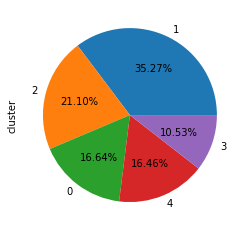

In [375]:
tabla_c['cluster'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [376]:
lista_c=list(tabla_c['cluster'].value_counts().index)
lista_c

[1, 2, 0, 4, 3]

In [377]:
tabla_c['nombre_cluster']=np.where(tabla_c['cluster']==lista_c[4],'desertor_casi_graduado',0)
tabla_c['nombre_cluster']=np.where(tabla_c['cluster']==lista_c[1],'desertor',tabla_c['nombre_cluster'])
tabla_c['nombre_cluster']=np.where(tabla_c['cluster']==lista_c[0],'riesgo_desertar',tabla_c['nombre_cluster'])
tabla_c['nombre_cluster']=np.where(tabla_c['cluster']==lista_c[3],'constante',tabla_c['nombre_cluster'])
tabla_c['nombre_cluster']=np.where(tabla_c['cluster']==lista_c[2],'casi_graduado',tabla_c['nombre_cluster'])

In [378]:
pd.crosstab(tabla_c['estatus_alumno'],tabla_c['nombre_cluster'], margins=True)

nombre_cluster,casi_graduado,constante,desertor,desertor_casi_graduado,riesgo_desertar,All
estatus_alumno,,,,,,
ACTIVO,357,512,0,0,449,1318
INACTIVO,118,146,100,114,246,724
PASIVO,521,327,1163,516,1416,3943
All,996,985,1263,630,2111,5985


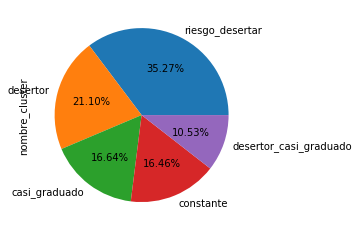

In [379]:
tabla_c['nombre_cluster'].value_counts().plot(kind='pie',autopct='%1.2f%%')

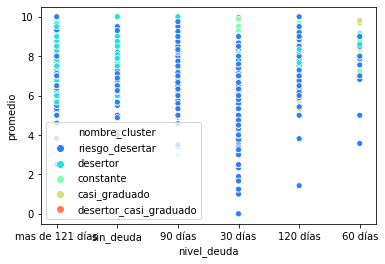

In [380]:
sns.scatterplot(tabla_c['nivel_deuda'],tabla_c['promedio'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

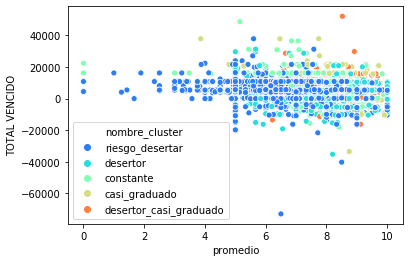

In [381]:
sns.scatterplot(tabla_c['promedio'],tabla_c['TOTAL VENCIDO'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

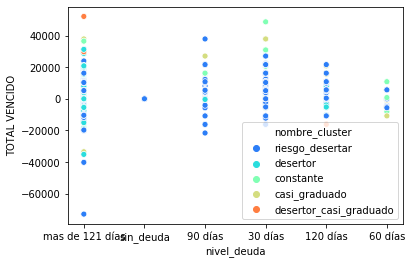

In [382]:
sns.scatterplot(tabla_c['nivel_deuda'],tabla_c['TOTAL VENCIDO'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

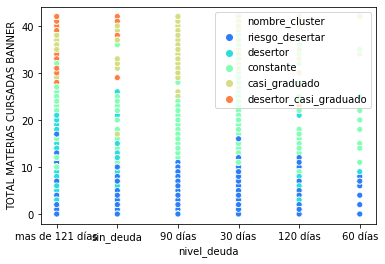

In [383]:
sns.scatterplot(tabla_c['nivel_deuda'],tabla_c['TOTAL MATERIAS CURSADAS BANNER'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

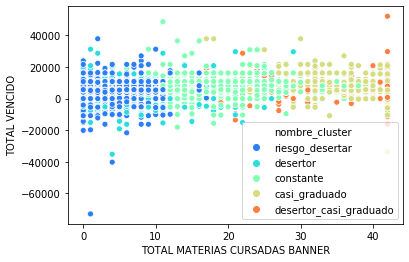

In [384]:
sns.scatterplot(tabla_c['TOTAL MATERIAS CURSADAS BANNER'],tabla_c['TOTAL VENCIDO'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

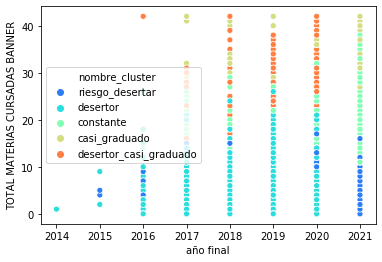

In [385]:
sns.scatterplot(tabla_c['año final'],tabla_c['TOTAL MATERIAS CURSADAS BANNER'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

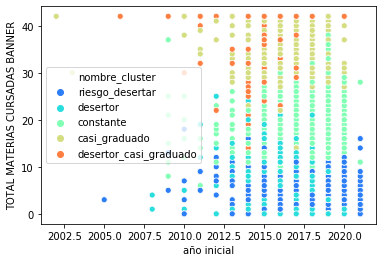

In [386]:
sns.scatterplot(tabla_c['año inicial'],tabla_c['TOTAL MATERIAS CURSADAS BANNER'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

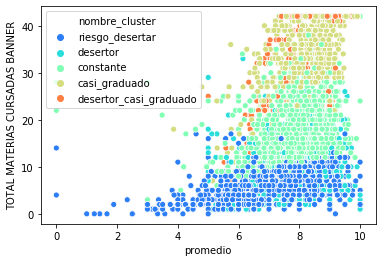

In [387]:
sns.scatterplot(tabla_c['promedio'],tabla_c['TOTAL MATERIAS CURSADAS BANNER'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

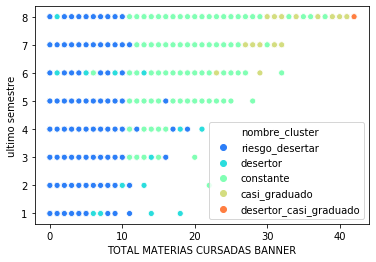

In [388]:
sns.scatterplot(tabla_c['TOTAL MATERIAS CURSADAS BANNER'],tabla_c['ultimo semestre'] ,hue=tabla_c['nombre_cluster'], palette='rainbow')

In [389]:
tabla_c.columns

Index(['promedio', 'ultimo semestre', 'materias pagadas', 'MATRICULA', 'PIDM',
       'ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO', 'NOMBRE ALUMNO',
       'TOTAL MATERIAS CURSADAS BANNER', 'CAMPUS', 'PROGRAMA',
       'codigo_estatus', 'estatus_alumno', 'Estatus Alumno_ACTIVO',
       'Estatus Alumno_INACTIVO', 'Estatus Alumno_PASIVO',
       'terminó último periodo', 'año inicial', 'periodo inicial', 'año final',
       'periodo final', 'cluster_2', 'grupo', 'TOTAL VENCIDO', 'tiene_beca',
       'nivel_deuda', 'convenio_economico', 'nuevo_ingreso', 'deuda_30_dias',
       'deuda_60_dias', 'deuda_90_dias', 'deuda_120_dias', 'deuda_121_dias',
       'cluster', 'nombre_cluster'],
      dtype='object')

In [390]:
tabla_clus_exportar=tabla_c[['promedio', 'ultimo semestre', 'materias pagadas', 'MATRICULA', 'PIDM',
       'ESTATUS-INSCRIPCION-ALUMNO', 'PERIODO-INICIO-CURRICULA',
       'PERIODO-ULTIMO-CURSADO', 'PERIODO-TIPOALUM-HISTORICO', 'NOMBRE ALUMNO',
       'TOTAL MATERIAS CURSADAS BANNER', 'CAMPUS', 'PROGRAMA',
       'codigo_estatus', 'estatus_alumno','TOTAL VENCIDO', 'tiene_beca',
       'nivel_deuda', 'convenio_economico', 'nuevo_ingreso','cluster','nombre_cluster',]]

In [391]:
#exporto
tabla_clus_exportar.to_csv('out\\tabla_clus_exportar.csv', sep=',')


In [392]:
tabla_clus_exportar[tabla_clus_exportar['TOTAL VENCIDO']<-30000]

,promedio,ultimo semestre,materias pagadas,MATRICULA,PIDM,ESTATUS-INSCRIPCION-ALUMNO,PERIODO-INICIO-CURRICULA,PERIODO-ULTIMO-CURSADO,PERIODO-TIPOALUM-HISTORICO,NOMBRE ALUMNO,...,PROGRAMA,codigo_estatus,estatus_alumno,TOTAL VENCIDO,tiene_beca,nivel_deuda,convenio_economico,nuevo_ingreso,cluster,nombre_cluster
638,8.75,8,40,M00279083,279152,EL,201427,201727,201727,ALVA IVONNE ARROYO*ARVIZU,...,LECONT,0,PASIVO,-33530.0,1,mas de 121 días,0,0,0,casi_graduado
2875,6.50,1,2,M00751151,751229,EL,201812,201825,201825,MAURICIO ADRIAN SERRANO*BARCENAS,...,LEFIBA,0,PASIVO,-73024.0,1,mas de 121 días,0,0,1,riesgo_desertar
3512,8.20,1,5,M00833796,833877,EL,201848,201850,201850,LUIS FERNANDO ROMERO*RAMOS,...,LECONT,0,PASIVO,-35210.0,1,mas de 121 días,0,0,2,desertor
3922,8.50,1,4,M00968179,968260,EL,201850,201912,201912,VERONICA BARRON*ESPARZA,...,LEADMI,0,PASIVO,-40240.0,1,mas de 121 días,0,0,1,riesgo_desertar


# Modelo estatus con cartera

In [393]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [394]:
x_c_train, x_c_test, y_c_train, y_c_test=tts(x_cartera,y_cartera)

In [395]:
logit_reg=LogisticRegression()

In [396]:
logit_fit=logit_reg.fit(x_c_train,y_c_train)

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [397]:
y_c_pred=logit_fit.predict(x_c_test)

In [398]:
matriz_c=pd.crosstab(y_c_test,y_c_pred, margins=True,)
matriz_c

col_0,0,1,All
Estatus Alumno_ACTIVO,,,
0,1128,14,1142
1,25,330,355
All,1153,344,1497


In [399]:
print('la probabilidad de un falso positivo es: %',(matriz_c[1][0]/matriz_c['All'][0]*100))

la probabilidad de un falso positivo es: % 1.2259194395796849


In [400]:
print('la probabilidad de un falso negativo es: %',(matriz_c[0][1]/matriz_c['All'][1]*100))

la probabilidad de un falso negativo es: % 7.042253521126761


In [401]:
tabla_c[['codigo_estatus','estatus_alumno']].value_counts()

codigo_estatus  estatus_alumno
0               PASIVO            3943
1               ACTIVO            1318
2               INACTIVO           724
dtype: int64

In [402]:
tabla_modelo2_c=tabla_c[['codigo_estatus','promedio', 'ultimo semestre', 'TOTAL MATERIAS CURSADAS BANNER', 'materias pagadas',
                 'terminó último periodo', 'año inicial','año final','periodo final','tiene_beca',
                   'convenio_economico', 'deuda_30_dias', 'deuda_60_dias','deuda_90_dias', 'deuda_120_dias', 'deuda_121_dias','nuevo_ingreso']]

In [403]:
y2_cartera=tabla_modelo2_c['codigo_estatus']
x2_cartera=tabla_modelo2_c.drop(['codigo_estatus'], axis=1)

In [404]:
from sklearn.multiclass import OneVsOneClassifier

In [405]:
x2_c_train, x2_c_test, y2_c_train, y2_c_test=tts(x2_cartera,y2_cartera)

In [406]:
modelo_multi=LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=3000,tol=0.01).fit(x2_c_train,y2_c_train)

c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\gotsa\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [407]:
y2_c_pred=modelo_multi.predict(x2_c_test)

In [408]:
matriz_2=pd.crosstab(y2_c_test,y2_c_pred, margins=True,)
matriz_2

col_0,0,1,2,All
codigo_estatus,,,,
0,996,0,6,1002
1,0,301,26,327
2,27,8,133,168
All,1023,309,165,1497


In [409]:
matriz_2['All'][0]

1002

In [410]:
print('la probabilidad de un falso pasivo es: ',(matriz_2[1][0]+matriz_2[2][0])/matriz_2['All'][0]*100, '%')

la probabilidad de un falso pasivo es:  0.5988023952095809 %


In [411]:
print('la probabilidad de un falso activo es: ',(matriz_2[0][1]+matriz_2[2][1])/matriz_2['All'][1]*100, '%')

la probabilidad de un falso activo es:  7.951070336391437 %


In [412]:
print('la probabilidad de un falso inactivo es: ',(matriz_2[0][2]+matriz_2[1][2])/matriz_2['All'][2]*100, '%')

la probabilidad de un falso inactivo es:  20.833333333333336 %


In [413]:
#guardo modelo

Pkl_Filename = "modelo_alumnos.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(modelo_multi, file)

In [414]:
#Load the Model back from file

with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.01, verbose=0,
                   warm_start=False)

In [415]:
x2_c_train

,promedio,ultimo semestre,TOTAL MATERIAS CURSADAS BANNER,materias pagadas,terminó último periodo,año inicial,año final,periodo final,tiene_beca,convenio_economico,deuda_30_dias,deuda_60_dias,deuda_90_dias,deuda_120_dias,deuda_121_dias,nuevo_ingreso
2533,5.000000,5,0,8,1,2017,2018,25,0,0,0,0,0,0,1,0
2037,5.000000,1,0,2,1,2017,2017,25,0,0,0,0,0,0,1,0
3606,8.000000,7,5,5,1,2018,2019,12,0,0,0,0,0,0,1,0
4825,8.708333,6,21,24,1,2019,2021,26,0,0,1,0,0,0,0,0
5262,7.142857,2,5,7,1,2020,2021,26,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,5.000000,1,0,2,1,2018,2018,50,0,0,0,0,0,0,1,0
4699,8.000000,1,1,1,1,2019,2019,48,0,0,0,0,0,0,1,1
2054,7.666667,8,40,51,1,2017,2021,26,0,1,1,0,0,0,0,0
3249,8.388889,6,17,18,1,2018,2021,12,0,0,0,0,0,1,0,0
